In [51]:
import SIMSIToolBox
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from copy import deepcopy
import umap
from sklearn.cluster import KMeans
import pickle as pkl
import molmass
import SIMSIToolBox.recalibration

In [52]:
#datadir = "X:/Kevin/Bruker/MALDI/imzML/092622_Brain_C12_100um/"
datadir = "X:/Kevin/Bruker/MALDI/imzML/092622_Brain_C12_50um/"
#datadir = "X:/Kevin/Bruker/MALDI/imzML/"

In [83]:
#fn = "brain_c12_nedc_neg_40um.imzML"
fn = "nedc_12x.imzML"

In [84]:
peaklist = pd.read_csv(datadir + "metaspace_annotations_" + fn.replace(".imzML",".csv"),header=2)
peaklist

,group,datasetName,datasetId,formula,adduct,chemMod,ion,mz,msm,fdr,...,moleculeNames,moleculeIds,minIntensity,maxIntensity,totalIntensity,isomers,isobars,offSample,rawOffSampleProb,isobarIons
0,NaN,nedc_12x,2022-09-27_19h59m45s,C22H32O2,M-H,NaN,C22H32O2-H-,327.232875,0.812878,0.05,...,"Docosahexaenoic acid, Neogrifolin, Grifolin, R...","HMDB0002183, HMDB0030053, HMDB0030446, HMDB003...",0,15228,150894176,5,0,False,0.004599,NaN
1,NaN,nedc_12x,2022-09-27_19h59m45s,C20H32O2,M-H,NaN,C20H32O2-H-,303.232875,0.775636,0.05,...,"ent-17-Hydroxy-16beta-kauran-19-al, Arachidoni...","HMDB0036721, HMDB0001043, HMDB0002177, HMDB000...",0,17474,188025920,12,0,False,0.001657,NaN
2,NaN,nedc_12x,2022-09-27_19h59m45s,C18H36O2,M-H,NaN,C18H36O2-H-,283.264175,0.774929,0.05,...,"Stearic acid, Ethyl hexadecanoate, 16-Methylhe...","HMDB0000827, HMDB0029811, HMDB0031066, HMDB006...",0,21819,269255392,4,0,False,0.005125,NaN
3,NaN,nedc_12x,2022-09-27_19h59m45s,C18H34O2,M-H,NaN,C18H34O2-H-,281.248525,0.721556,0.05,...,"Elaidic acid, Vaccenic acid, Oleic acid, (Z)-1...","HMDB0000573, HMDB0003231, HMDB0000207, HMDB004...",0,16980,196053376,9,0,False,0.000882,NaN
4,NaN,nedc_12x,2022-09-27_19h59m45s,C16H32O2,M-H,NaN,C16H32O2-H-,255.232875,0.688382,0.05,...,"Butyl dodecanoate, Dodecyl butyrate, Hexyl dec...","HMDB0032065, HMDB0032249, HMDB0032324, HMDB000...",0,12532,112272272,9,0,False,0.019745,NaN
5,NaN,nedc_12x,2022-09-27_19h59m45s,C2H7NO3S,M-H,NaN,C2H7NO3S-H-,124.007309,0.640475,0.05,...,Taurine,HMDB0000251,0,88472,901475584,1,0,False,0.003104,NaN
6,NaN,nedc_12x,2022-09-27_19h59m45s,C20H38O2,M-H,NaN,C20H38O2-H-,309.279826,0.634013,0.05,...,"6,8-Icosanedione, 5,7-Icosanedione, 4,6-Icosan...","HMDB0035572, HMDB0035573, HMDB0035574, HMDB000...",0,5490,17705532,9,0,False,0.000027,NaN
7,NaN,nedc_12x,2022-09-27_19h59m45s,C6H9NO5,M-H,NaN,C6H9NO5-H-,174.040717,0.501139,0.05,...,"N-Acetyl-L-aspartic acid, N-Formyl-L-glutamic ...","HMDB0000812, HMDB0003470, HMDB0039163, HMDB006...",0,35686,289552192,4,2,False,0.016453,"C7H13NS2-H-, C7H12O3S-H-"
8,NaN,nedc_12x,2022-09-27_19h59m45s,C11H16N2O8,M-H,NaN,C11H16N2O8-H-,303.083311,0.496568,0.05,...,N-Acetylaspartylglutamic acid,HMDB0001067,0,7090,8121610,1,2,False,0.000263,"C12H18O9-H-, C15H15NO6-H-"
9,NaN,nedc_12x,2022-09-27_19h59m45s,C22H36O2,M-H,NaN,C22H36O2-H-,331.264175,0.410074,0.05,...,"Adrenic acid, 1-Hydroxy-1-phenyl-3-hexadecanon...","HMDB0002226, HMDB0035676, HMDB0035677, HMDB003...",0,3808,29169680,5,1,False,0.000870,C22H35O2-H-


In [85]:
mzsCorr = list(peaklist["mz"].values)
mzsCorr.sort()

In [86]:
ppmThresh = 5
num_cores = 20
intensityCutoff = 100
convSquare = 3 #size of filter (1=1x1,3=3x3,5=5x5)
colormap = LinearSegmentedColormap.from_list("test",colors=["black", "navy","blue","cyan","yellow","orange","orangered","red","mistyrose","white"],N=256)
dm_method = "PCA" #method for dimensionality reduction ("PCA" or "TSNE") PCA has worked better for me
seg_method = "K_means" #thresholding method ("TIC_auto", "K_means", "TIC_manual")
num_components = 2 #number of compoents to use with PCA or TSNE
filt = "GB" #filtering method (GB = gaussian blur, MA = moving average)

In [87]:
if __name__ == "__main__":
    tolerance = 0.05
    step = 0.001
    dalim = 0.01
    SIMSIToolBox.recalibration.write_corrected_msi(datadir + fn,datadir + fn.replace(".imzML","_recal.imzML"),tolerance,mzsCorr,step,dalim,numCores=num_cores)


reading spectra...

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\pyimzml\ontology\ontology.py:94: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size x". Updating name to "pixel size (x)".
  % (accession, raw_name, name)


done
correcting spectra |██████████████████████████████████████████████████| 100.0% 
writing spectra...done


In [88]:
mzs = []
keys = []
for index,row in peaklist.iterrows():
    _,_,nC = SIMSIToolBox.getMzsOfIsotopologues(row["formula"],"C")
    for x in range(nC+1):
        mzs.append(row["mz"] + 1.00336 * x)
        keys.append((index,x))
print(len(mzs))

200


In [89]:
msi = SIMSIToolBox.MSIData(mzs,ppm=ppmThresh,numCores = num_cores,intensityCutoff=intensityCutoff)

In [90]:
if __name__ == "__main__":
    msi.readimzML(datadir + fn.replace(".imzML","_recal.imzML"))

extracting intensities |██████████████████████████████████████████████████| 100.0% 


forming matrix |██████████████████████████████████████████████████| 100.0% 


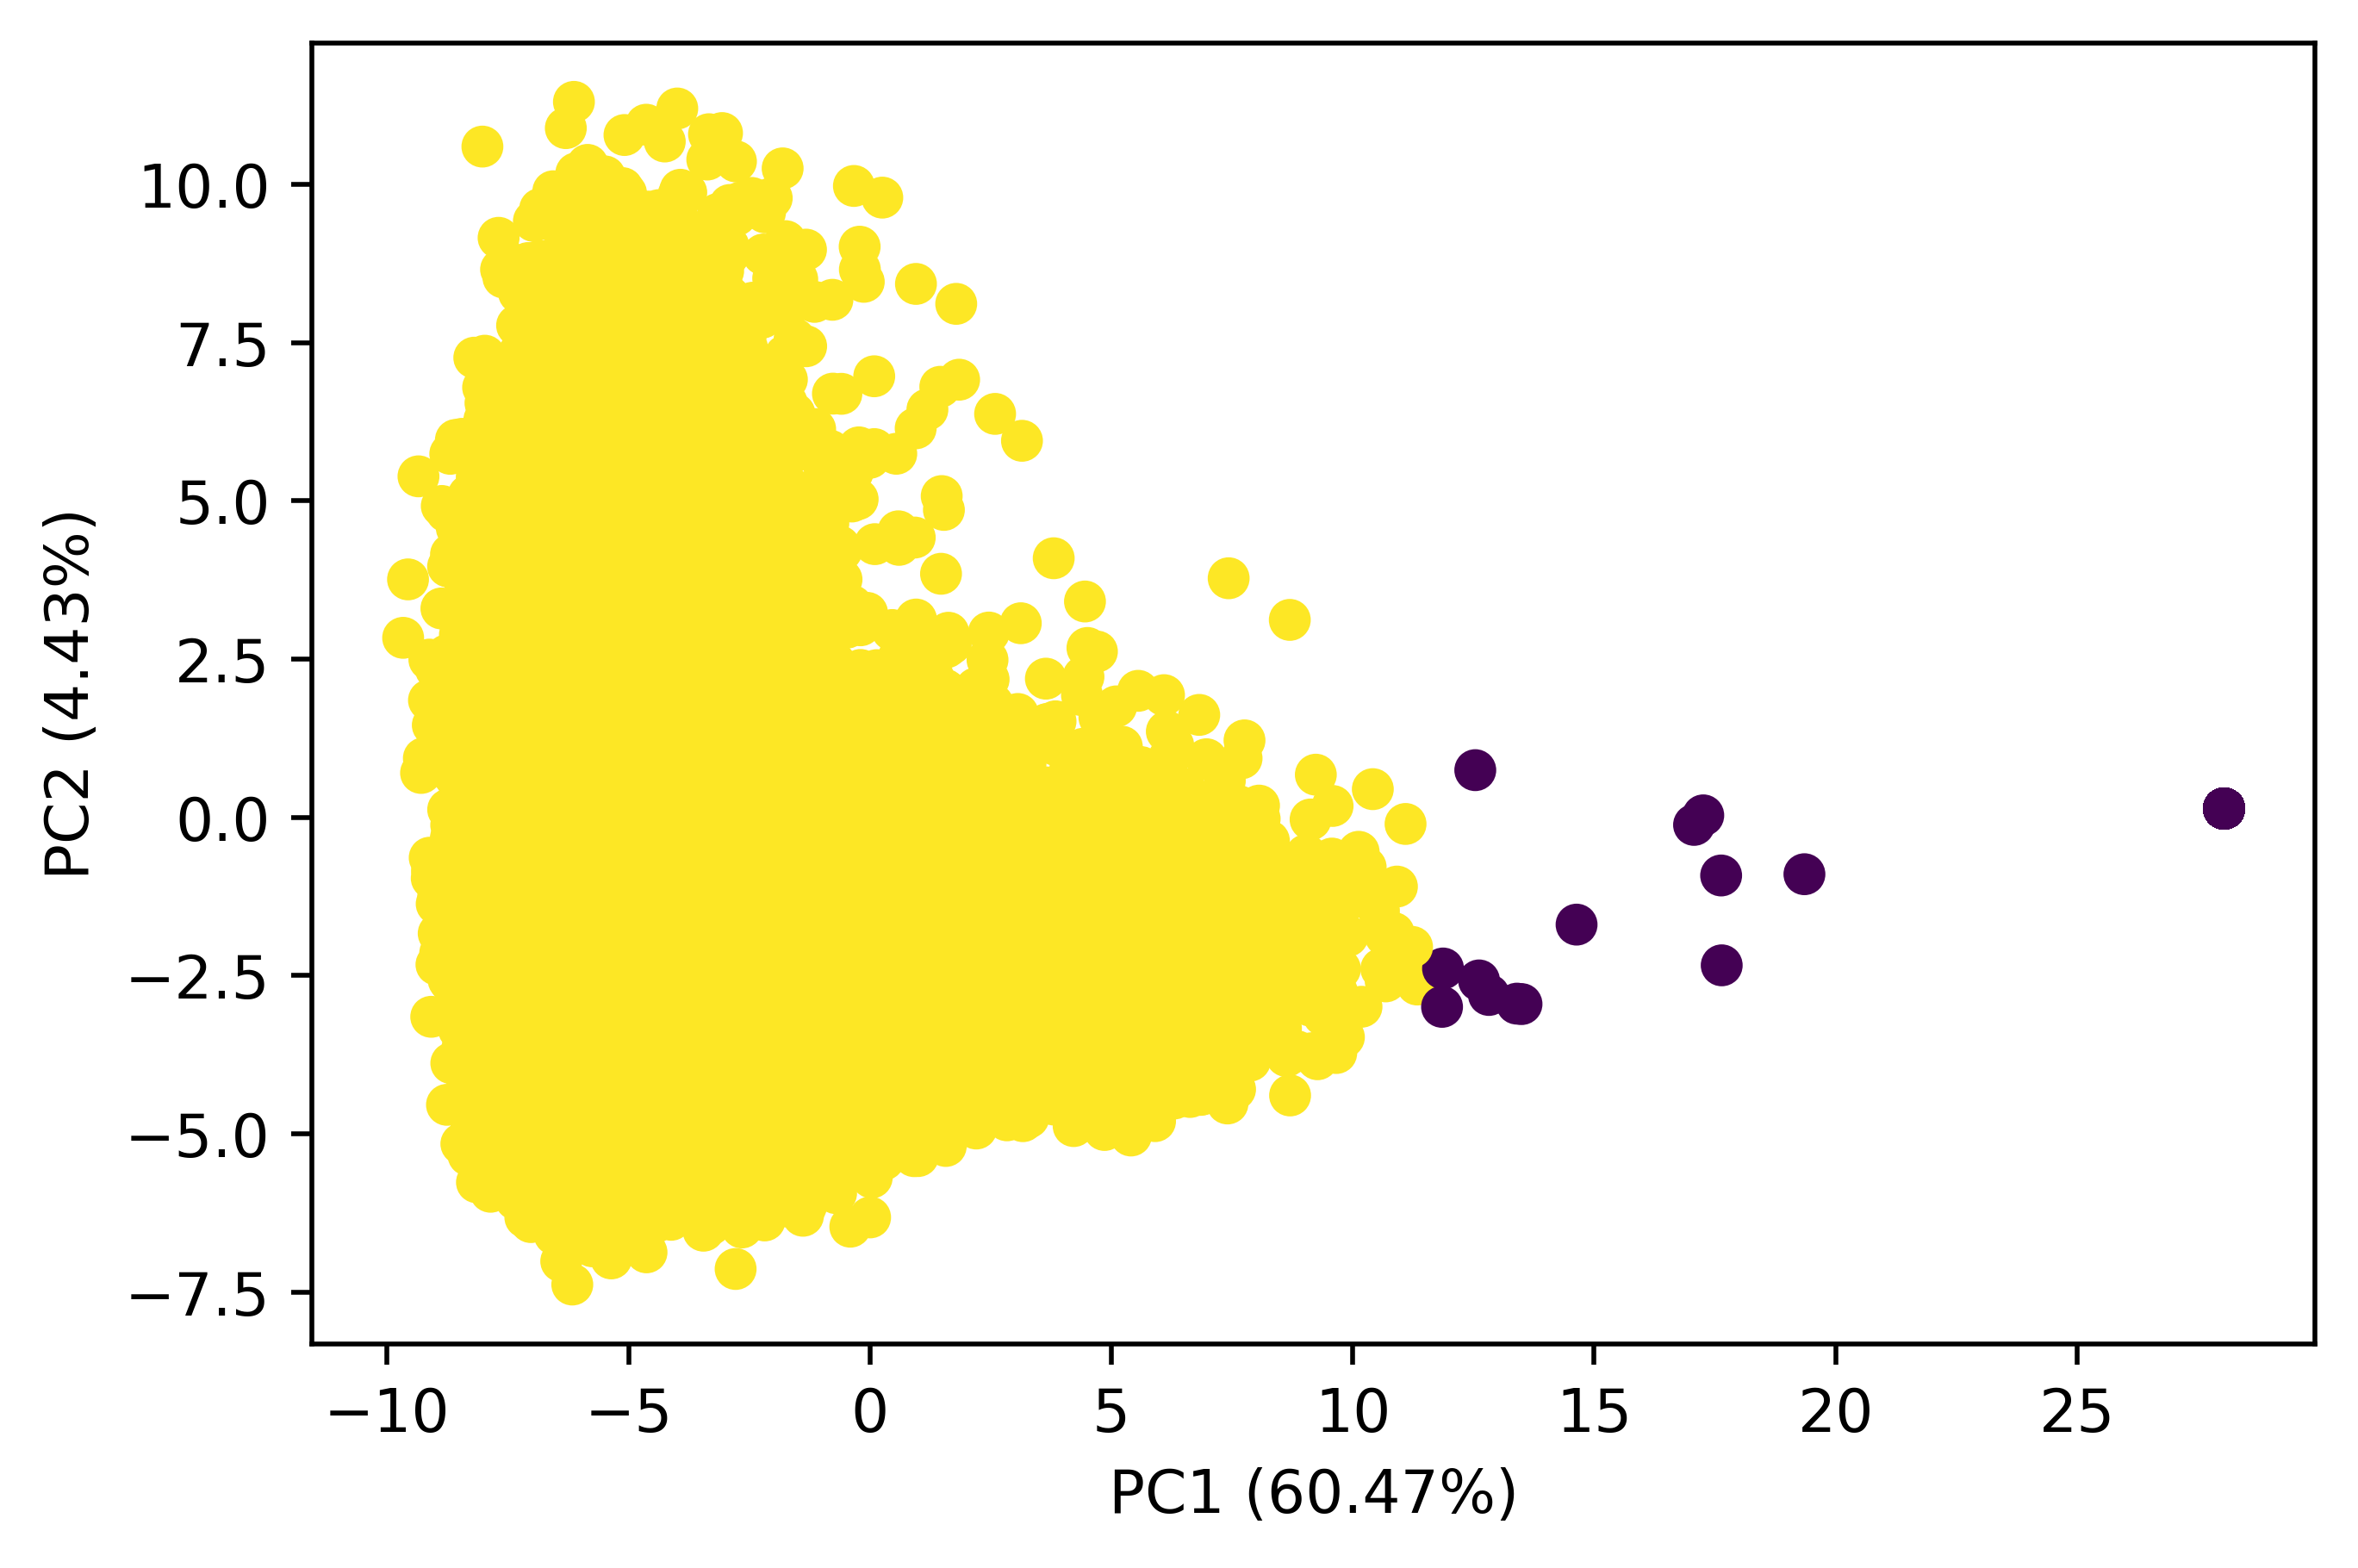

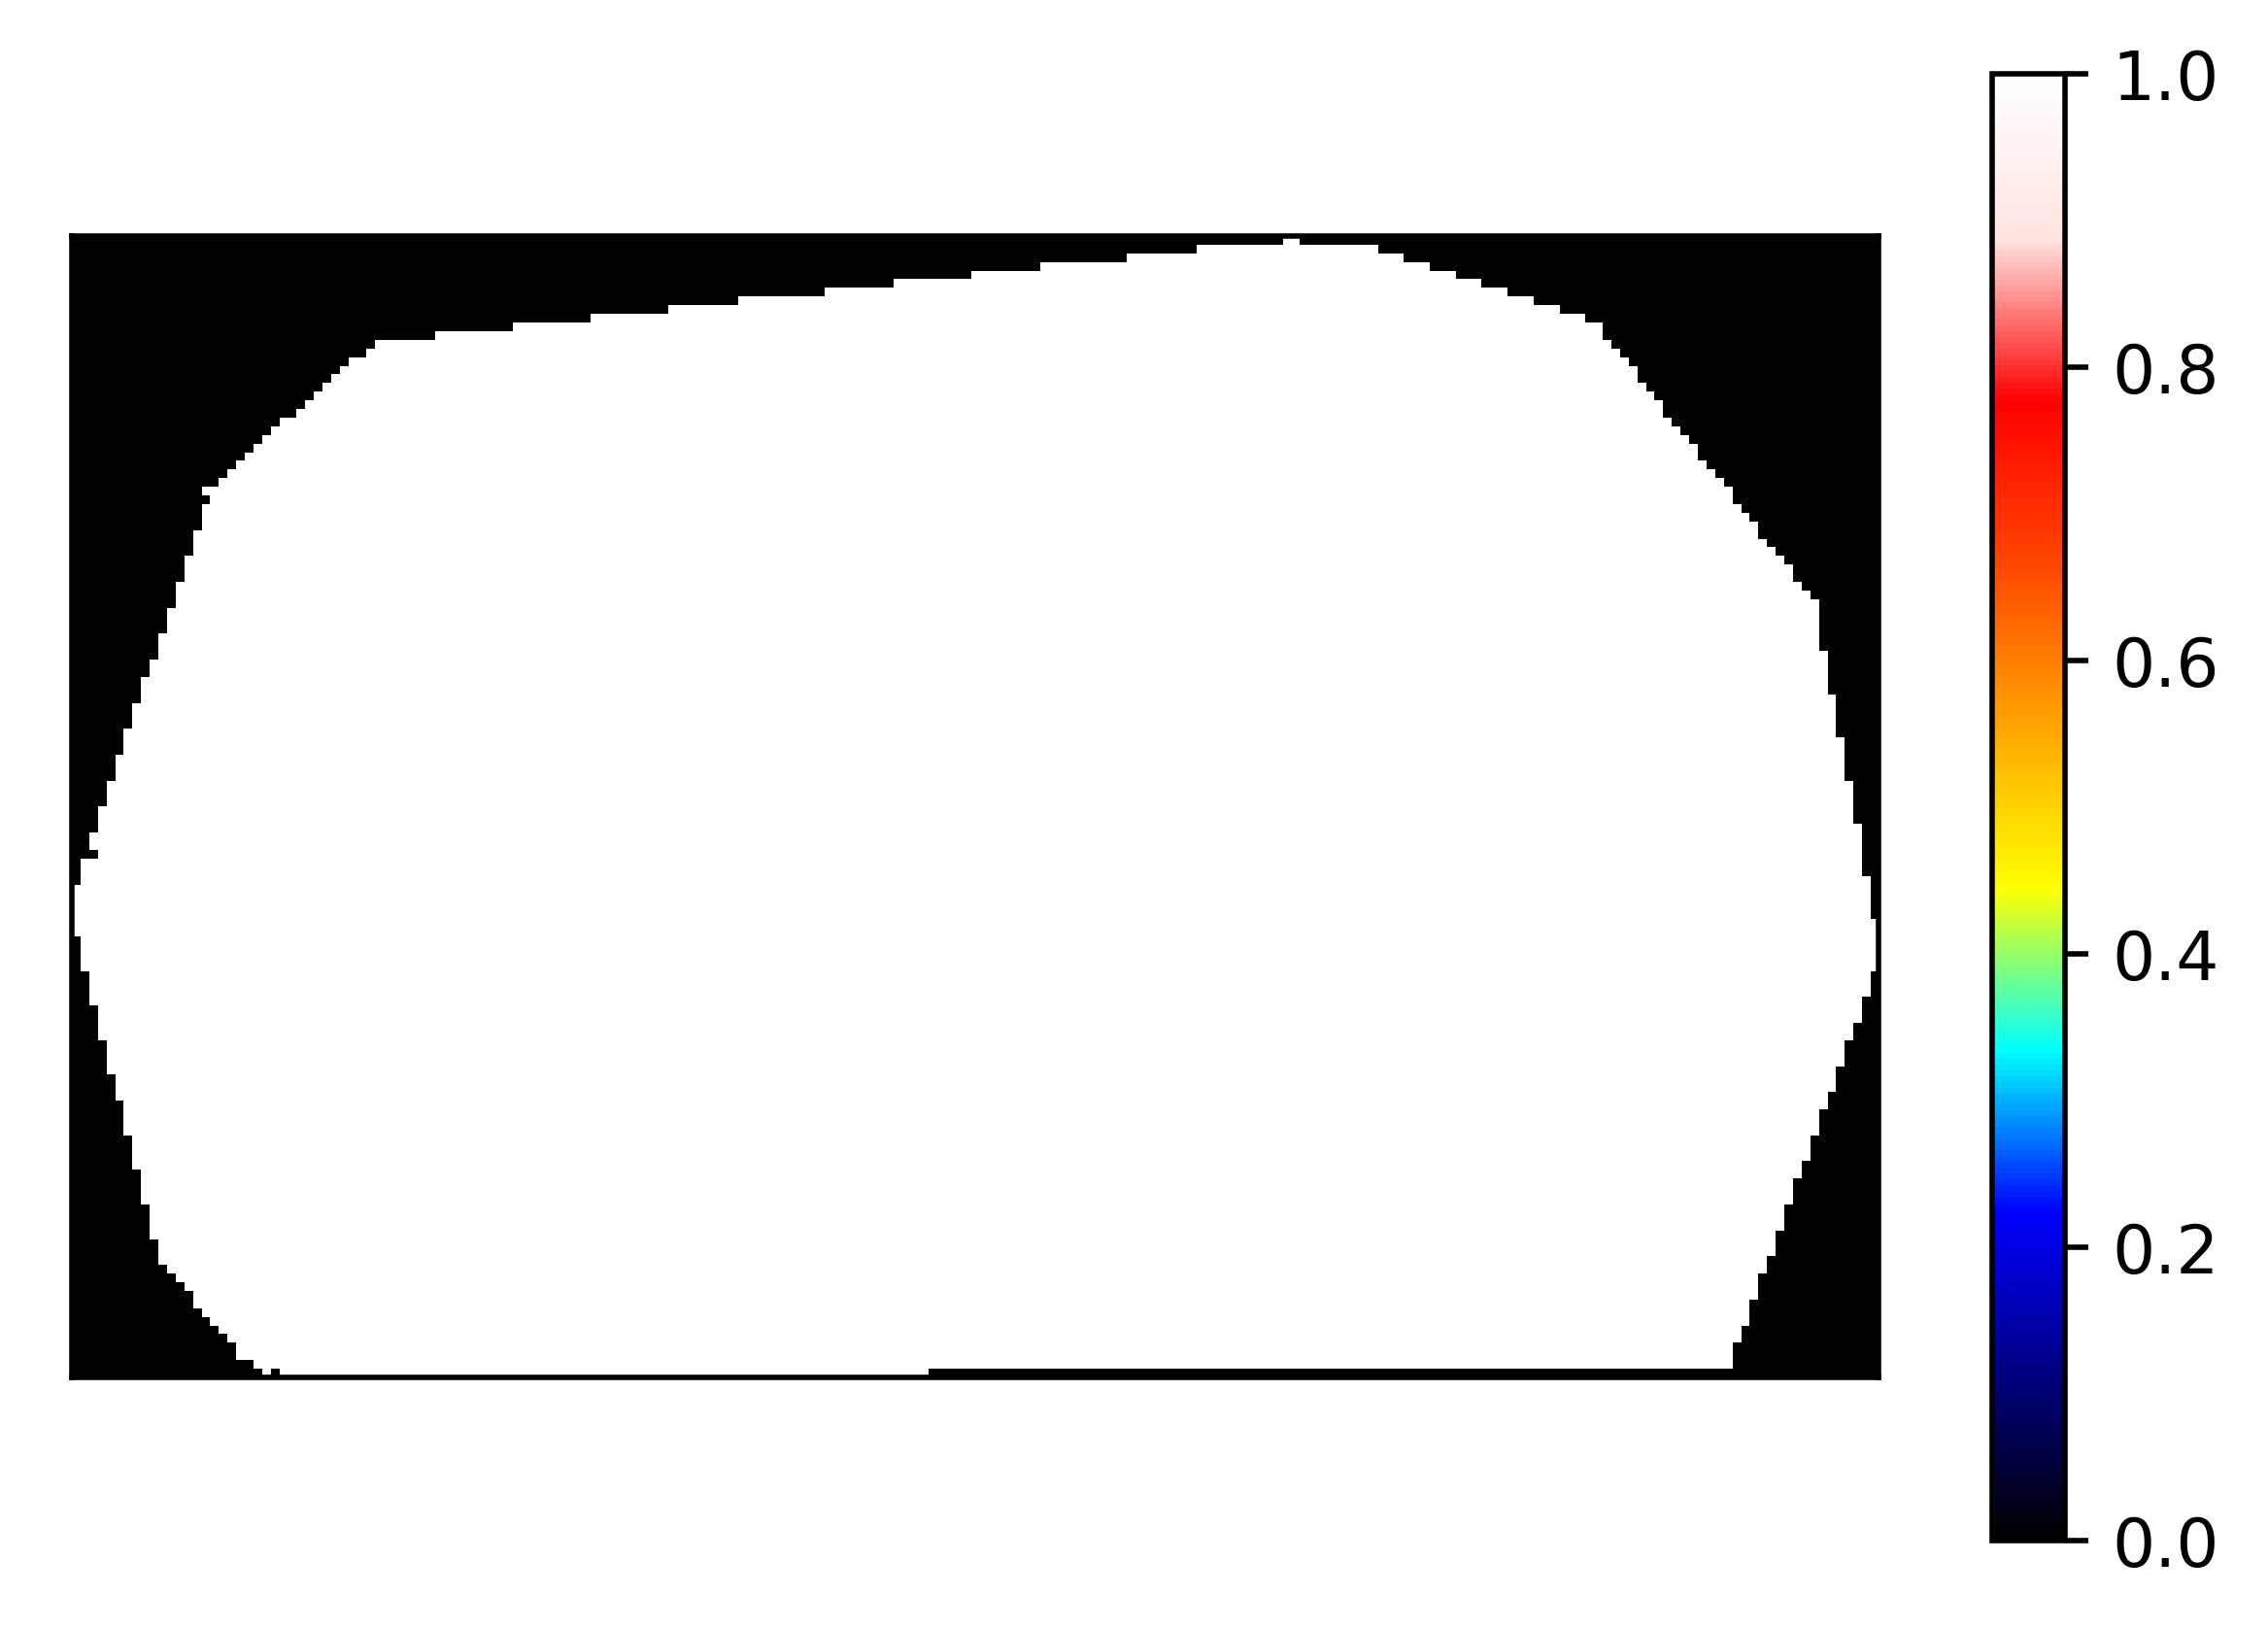

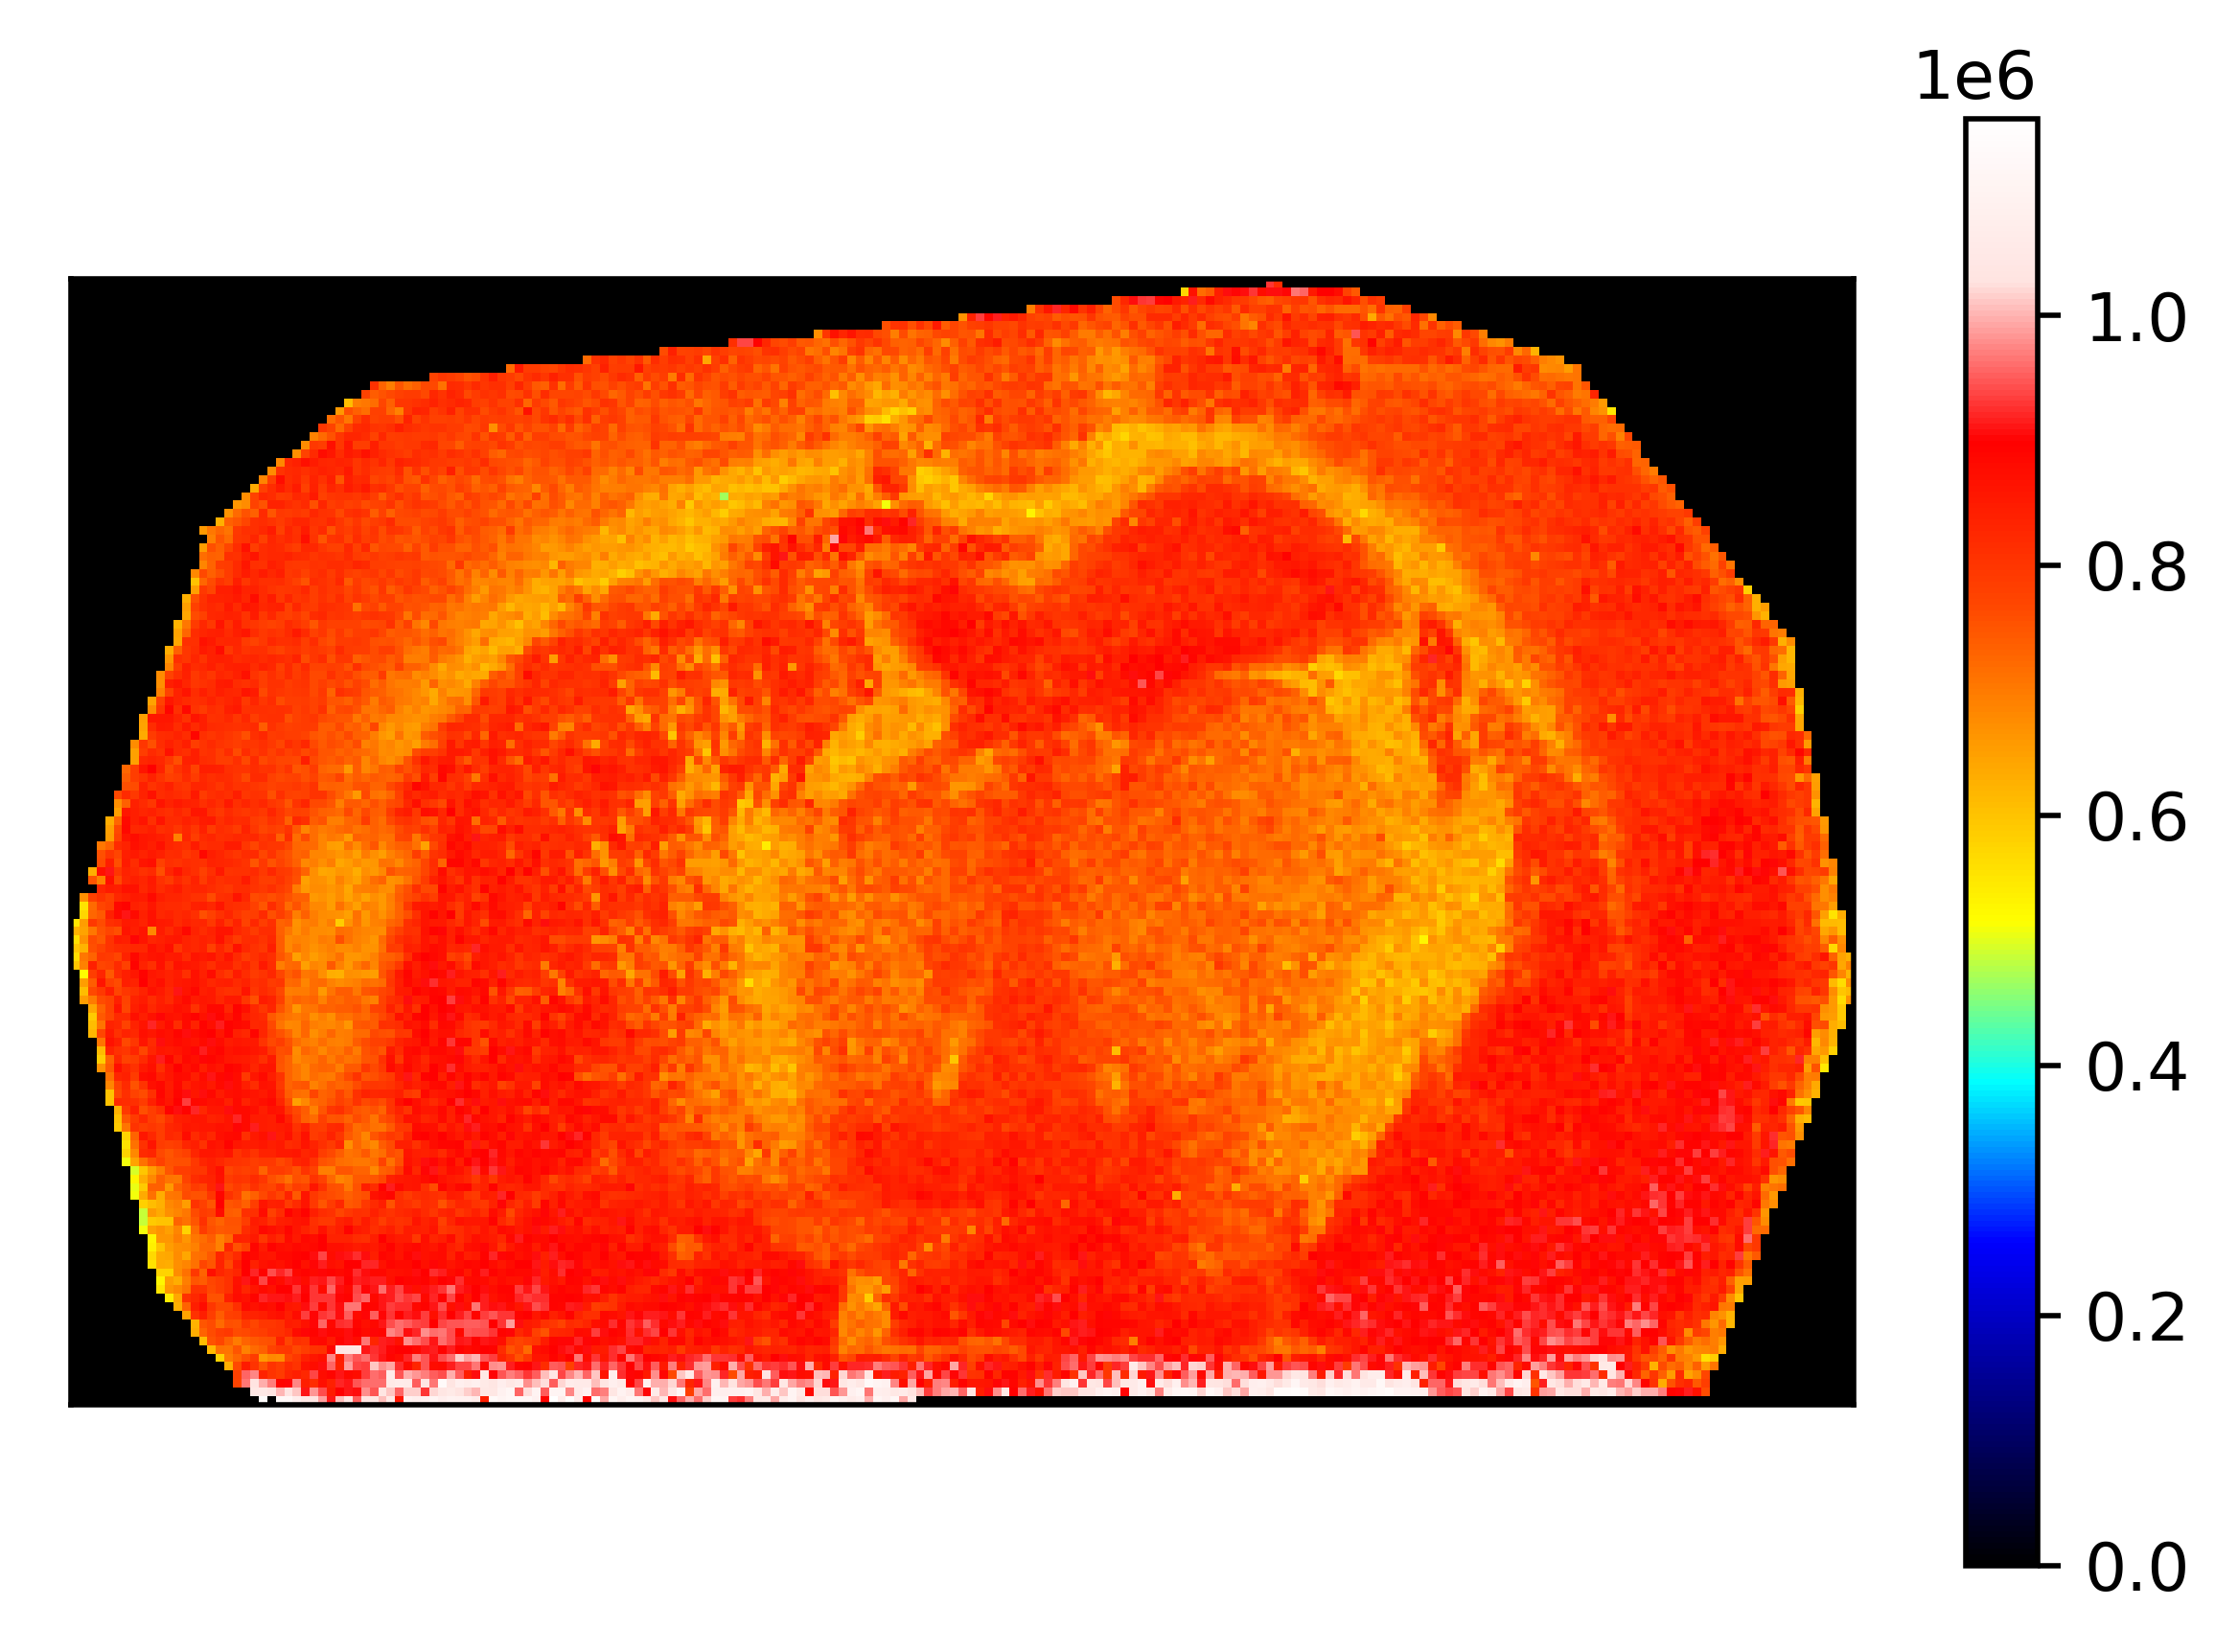

In [91]:
if __name__ == "__main__":
    msi.segmentImage(method=seg_method, num_latent=num_components, dm_method=dm_method,fill_holes = True)
    plt.figure()
    SIMSIToolBox.showImage(msi.imageBoundary, cmap=colormap)
    plt.figure()
    SIMSIToolBox.showImage(msi.tic_image, cmap=colormap)



In [92]:
if __name__ == "__main__":
    msi.smoothData(filt,convSquare)

Smoothing data |██████████████████████████████████████████████████| 100.0% 


In [93]:
msi_corrected = deepcopy(msi)

In [94]:
if __name__ == "__main__":
    inds = []
    toDrop = []
    for index,row in peaklist.iterrows():
        tmp = [x for x in range(len(keys)) if keys[x][0] == index]
        tmp.sort(key=lambda x: keys[x][1])
        inds.append(tmp)
        f = molmass.Formula(row["formula"])  # create formula object
        comp = f.composition()
        bad = False
        for row in comp:
            if row[0] not in ["H","C","N","O","S","P","Si"]:
                bad = True
                break
        if bad:
            toDrop.append(index)
    peaklist["inds"] = inds
    peaklist = peaklist.drop(toDrop,axis=0)
    msi_corrected.correctNaturalAbundance(peaklist["formula"].values,peaklist["inds"].values)

    

correcting natural abundance |██████████████████████████████████████████████████| 100.0% 


In [95]:
scores = []
for index,row in peaklist.iterrows():
    tmp = msi_corrected.data_tensor[row["inds"]]
    isoTensor = SIMSIToolBox.normalizeTensor(tmp)
    scores.append(np.mean(isoTensor[0][msi.imageBoundary > 0.5]))
peaklist["meanM0"] = scores
peaklist = peaklist.sort_values(by="meanM0",ascending=False)
peaklist.head()

,group,datasetName,datasetId,formula,adduct,chemMod,ion,mz,msm,fdr,...,minIntensity,maxIntensity,totalIntensity,isomers,isobars,offSample,rawOffSampleProb,isobarIons,inds,meanM0
5,NaN,nedc_12x,2022-09-27_19h59m45s,C2H7NO3S,M-H,NaN,C2H7NO3S-H-,124.007309,0.640475,0.05,...,0,88472,901475584,1,0,False,0.003104,NaN,"[99, 100, 101]",0.998444
7,NaN,nedc_12x,2022-09-27_19h59m45s,C6H9NO5,M-H,NaN,C6H9NO5-H-,174.040717,0.501139,0.05,...,0,35686,289552192,4,2,False,0.016453,"C7H13NS2-H-, C7H12O3S-H-","[123, 124, 125, 126, 127, 128, 129]",0.976831
2,NaN,nedc_12x,2022-09-27_19h59m45s,C18H36O2,M-H,NaN,C18H36O2-H-,283.264175,0.774929,0.05,...,0,21819,269255392,4,0,False,0.005125,NaN,"[44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 5...",0.958203
4,NaN,nedc_12x,2022-09-27_19h59m45s,C16H32O2,M-H,NaN,C16H32O2-H-,255.232875,0.688382,0.05,...,0,12532,112272272,9,0,False,0.019745,NaN,"[82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 9...",0.956708
1,NaN,nedc_12x,2022-09-27_19h59m45s,C20H32O2,M-H,NaN,C20H32O2-H-,303.232875,0.775636,0.05,...,0,17474,188025920,12,0,False,0.001657,NaN,"[23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 3...",0.899722


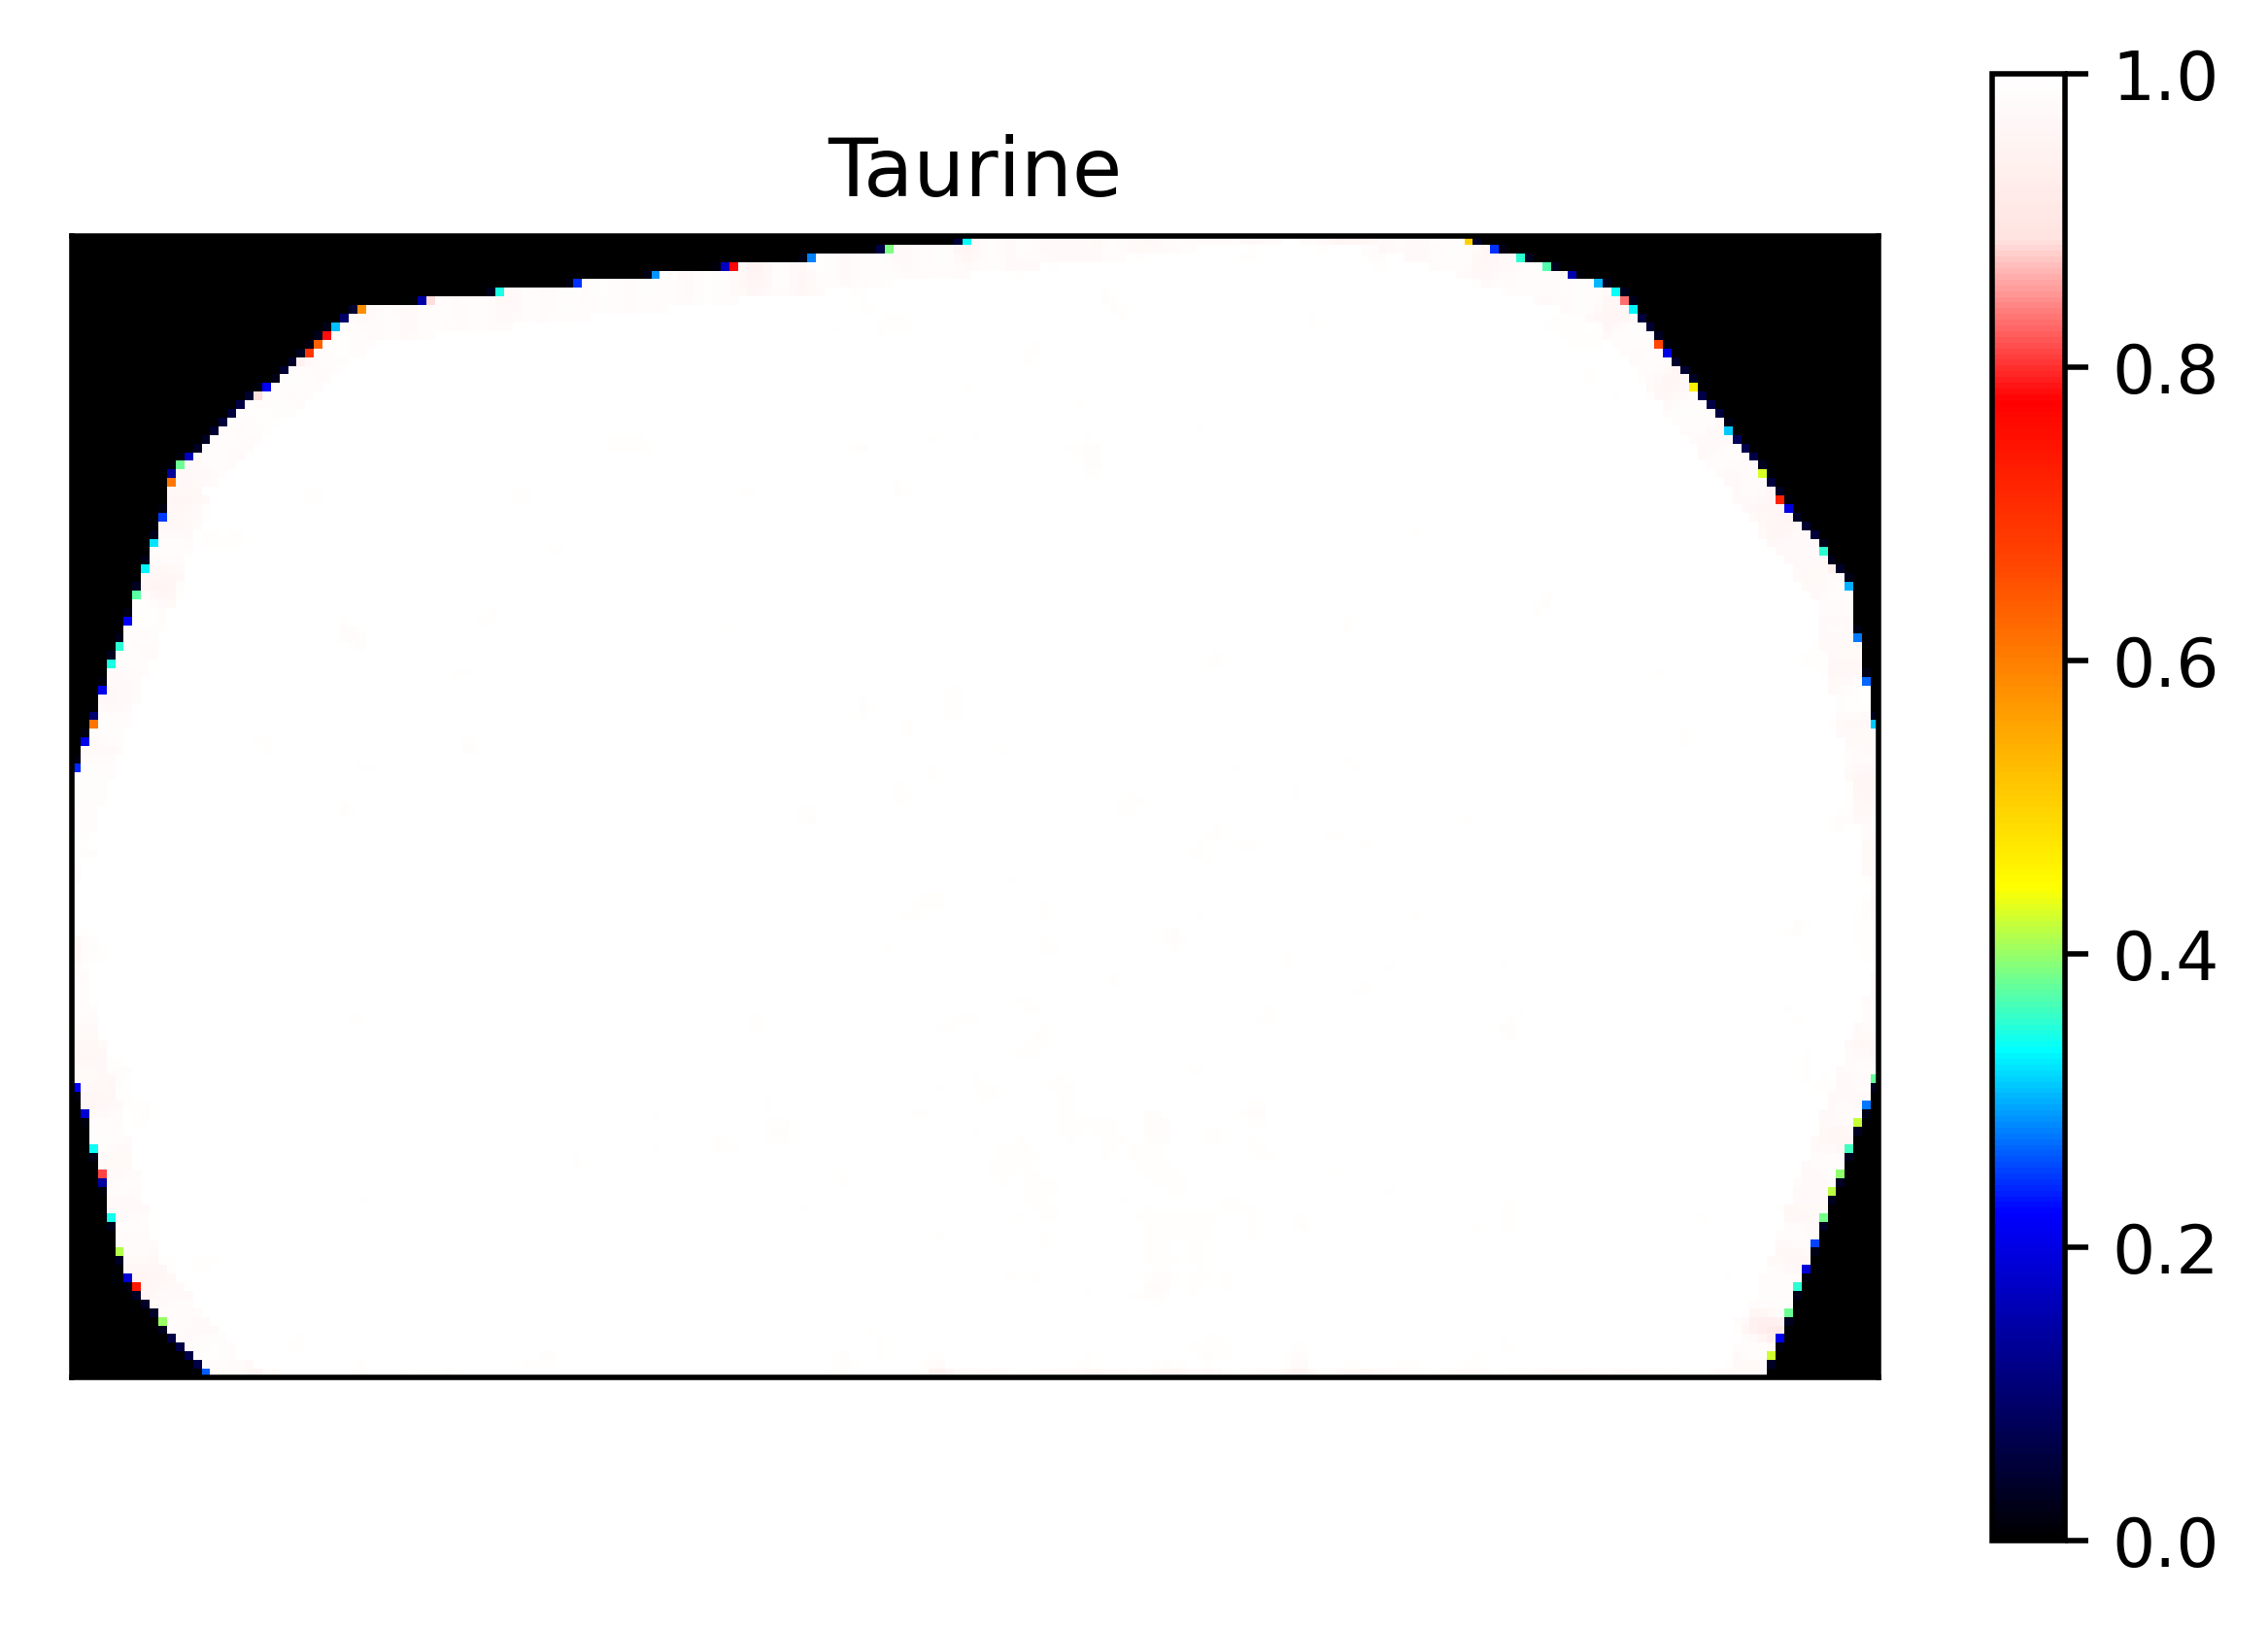

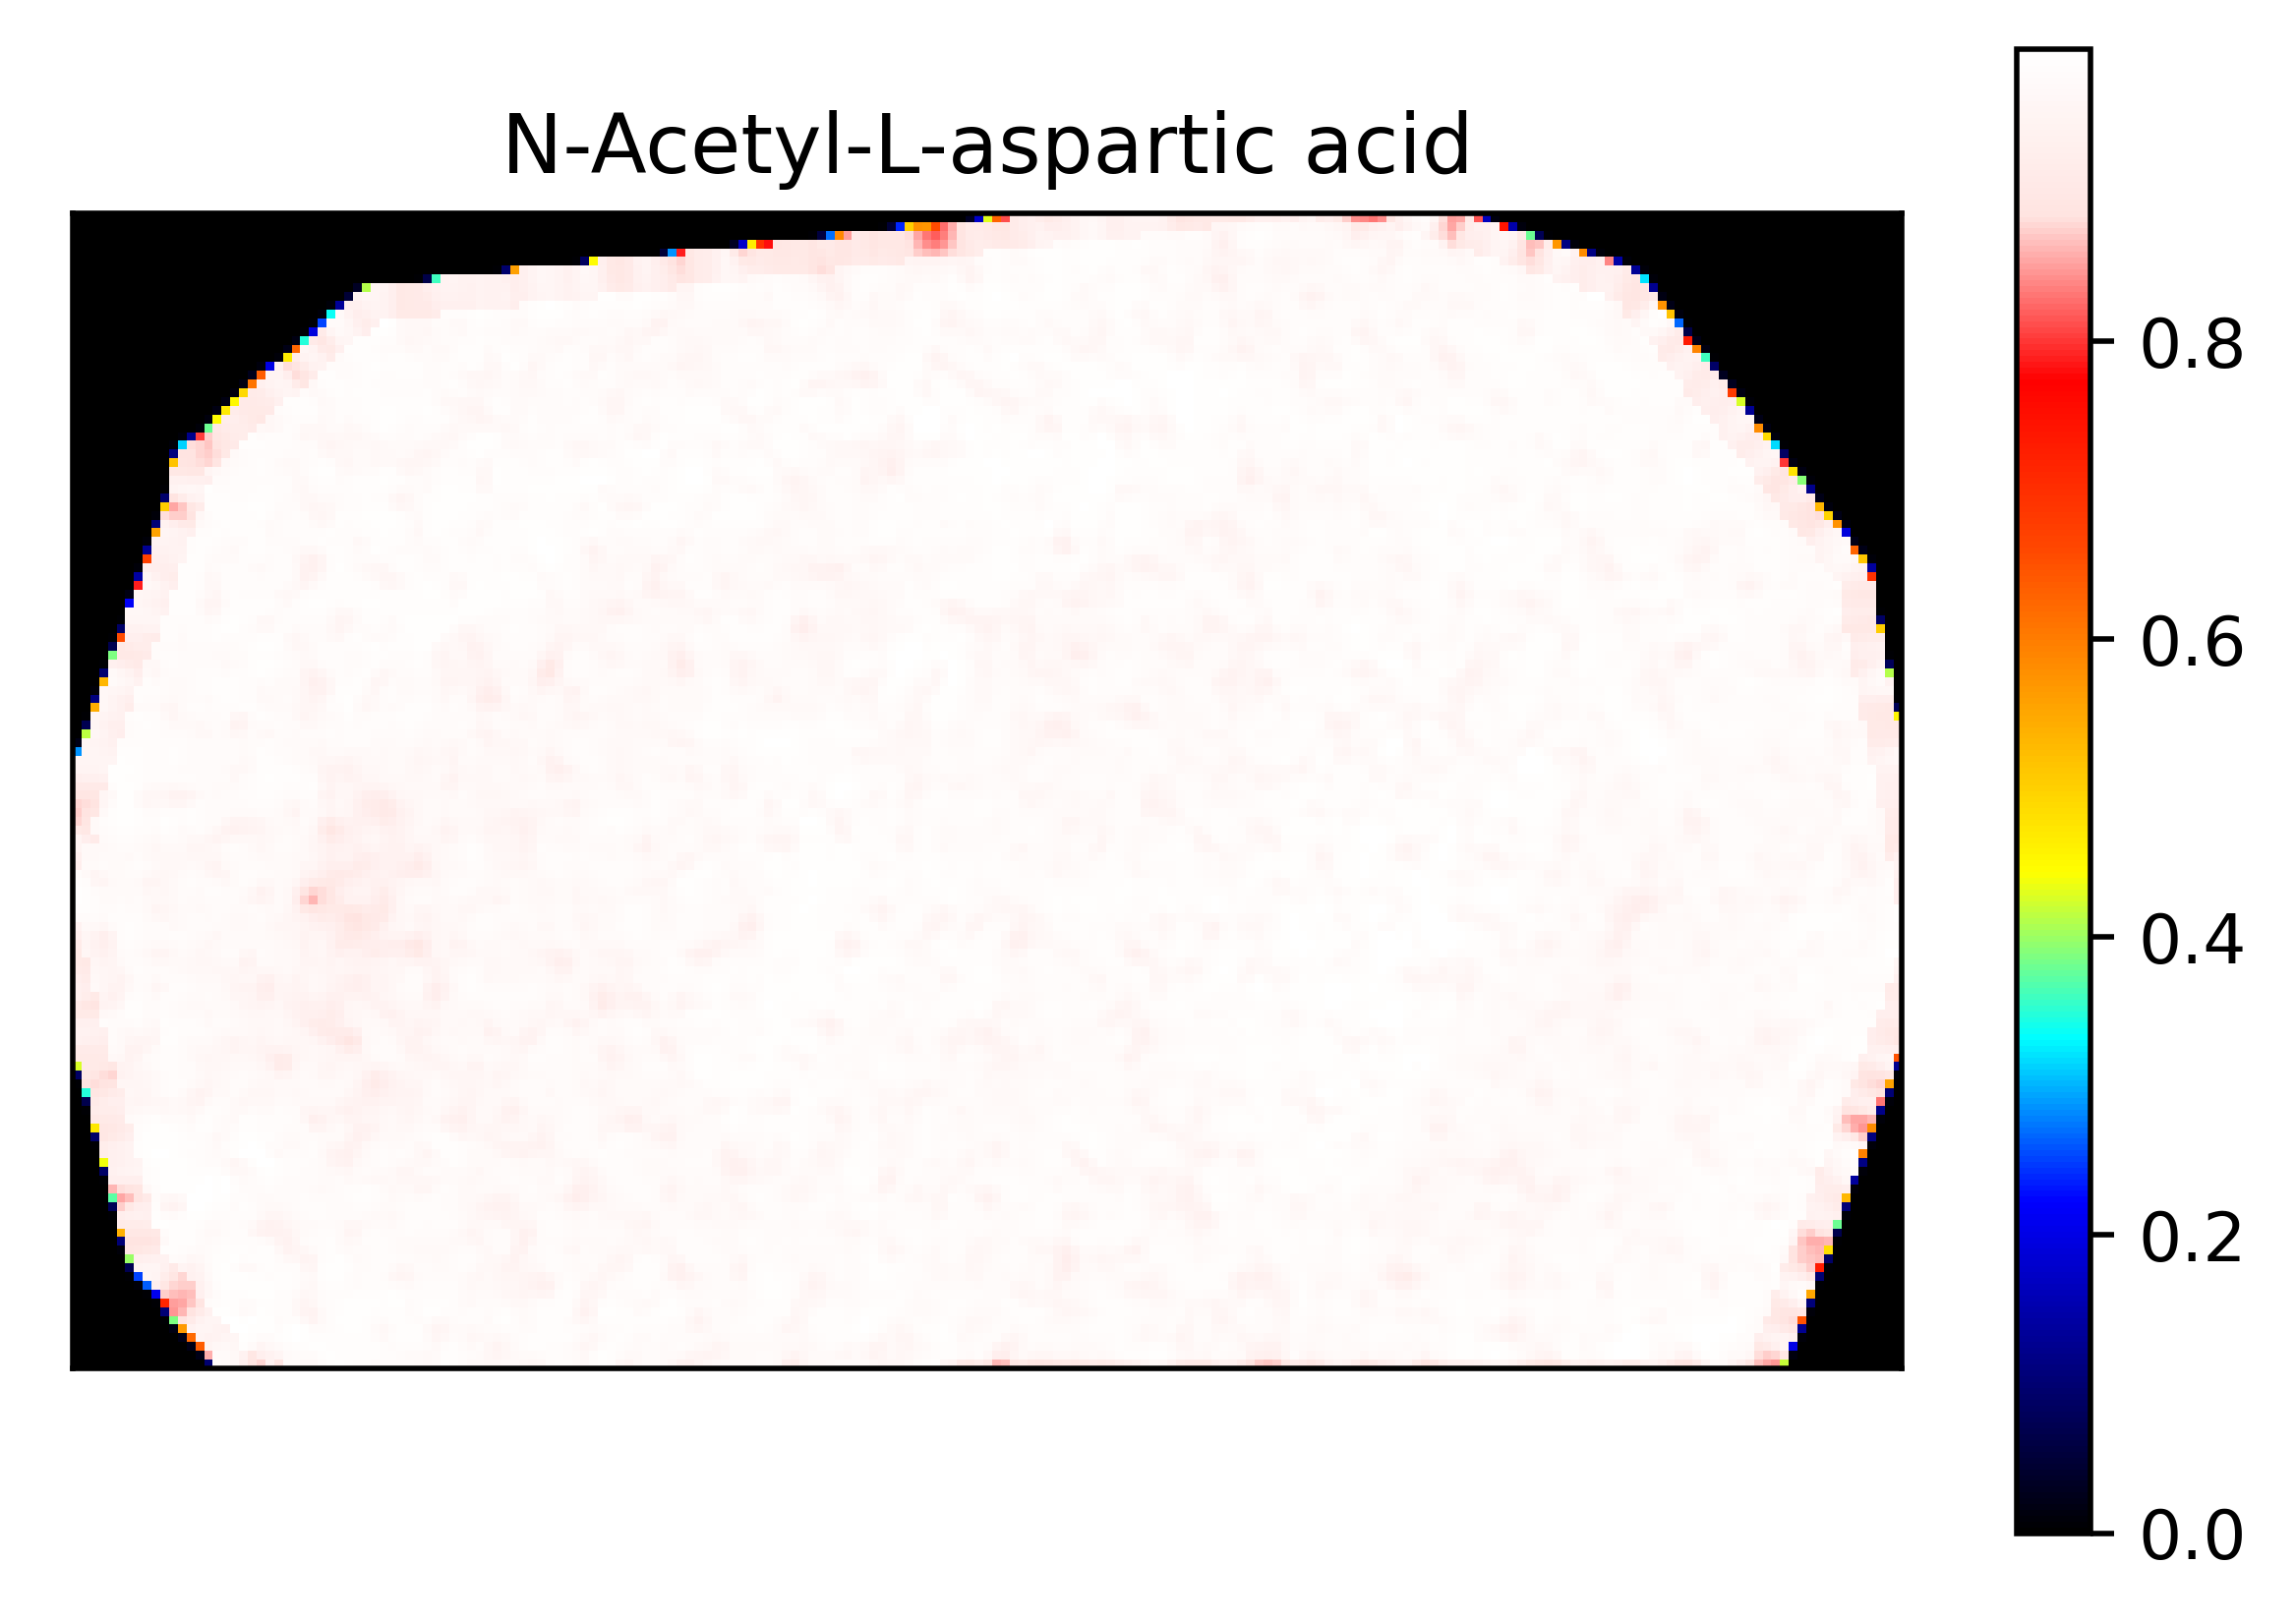

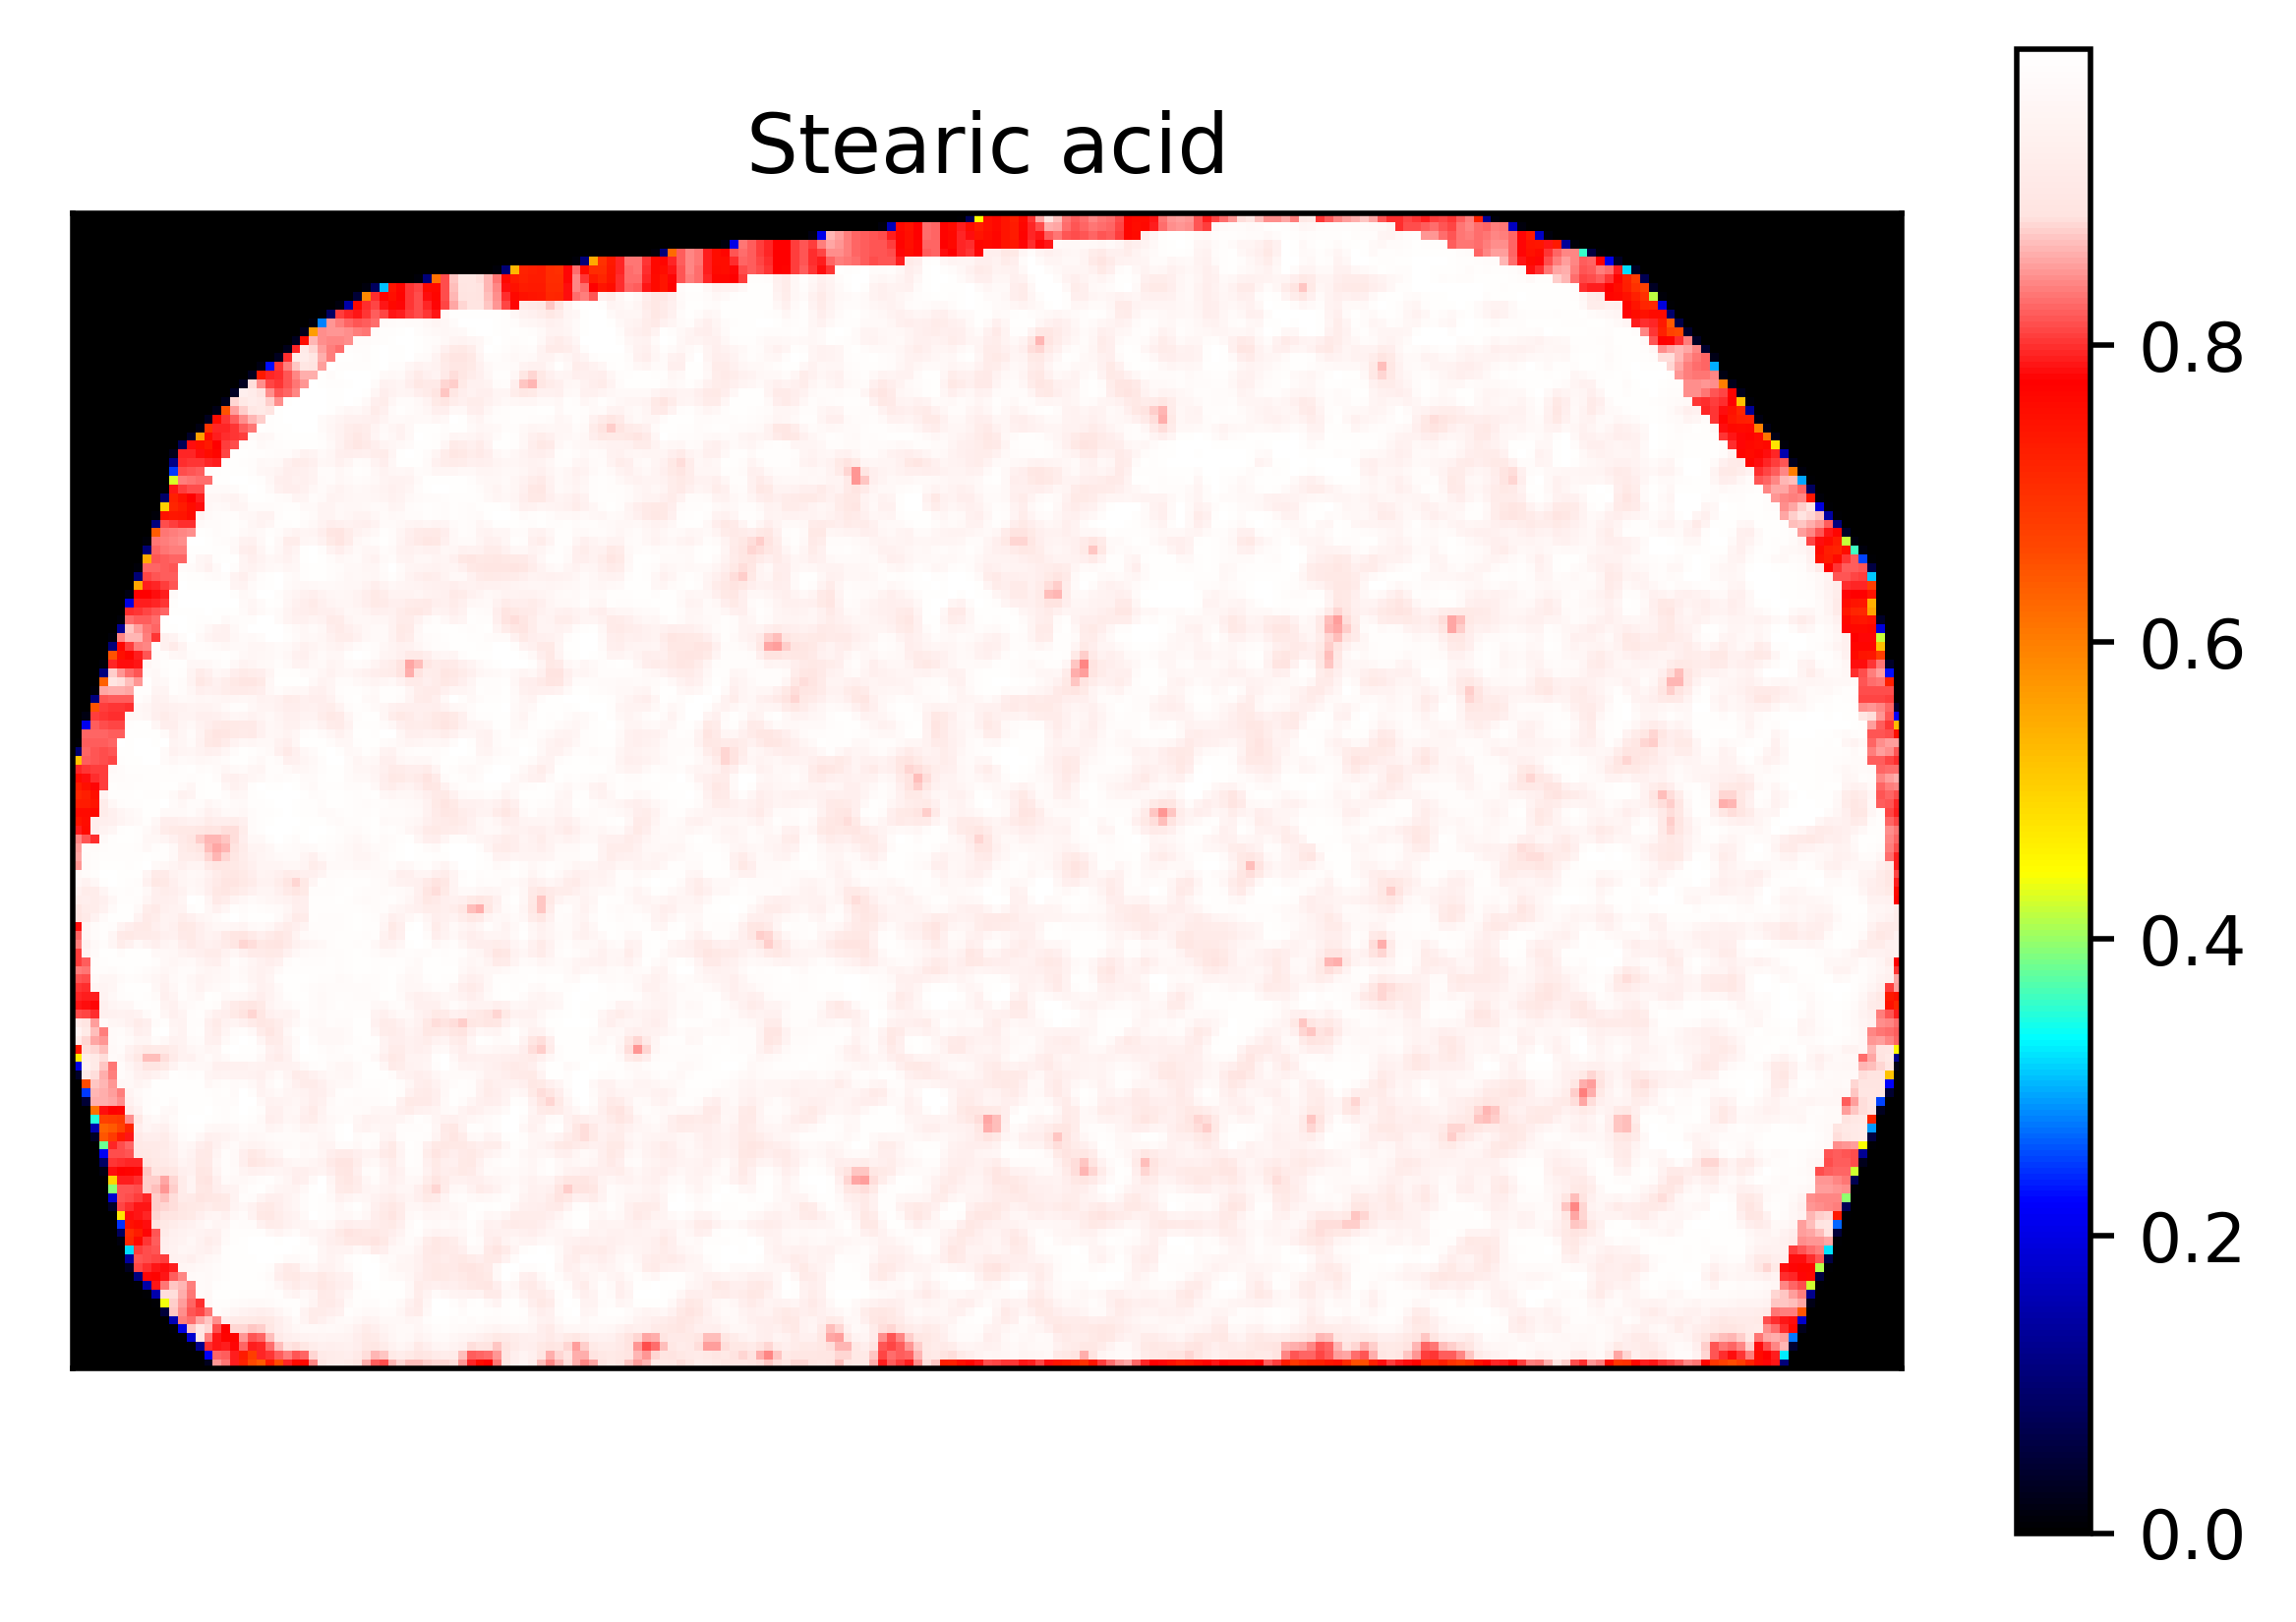

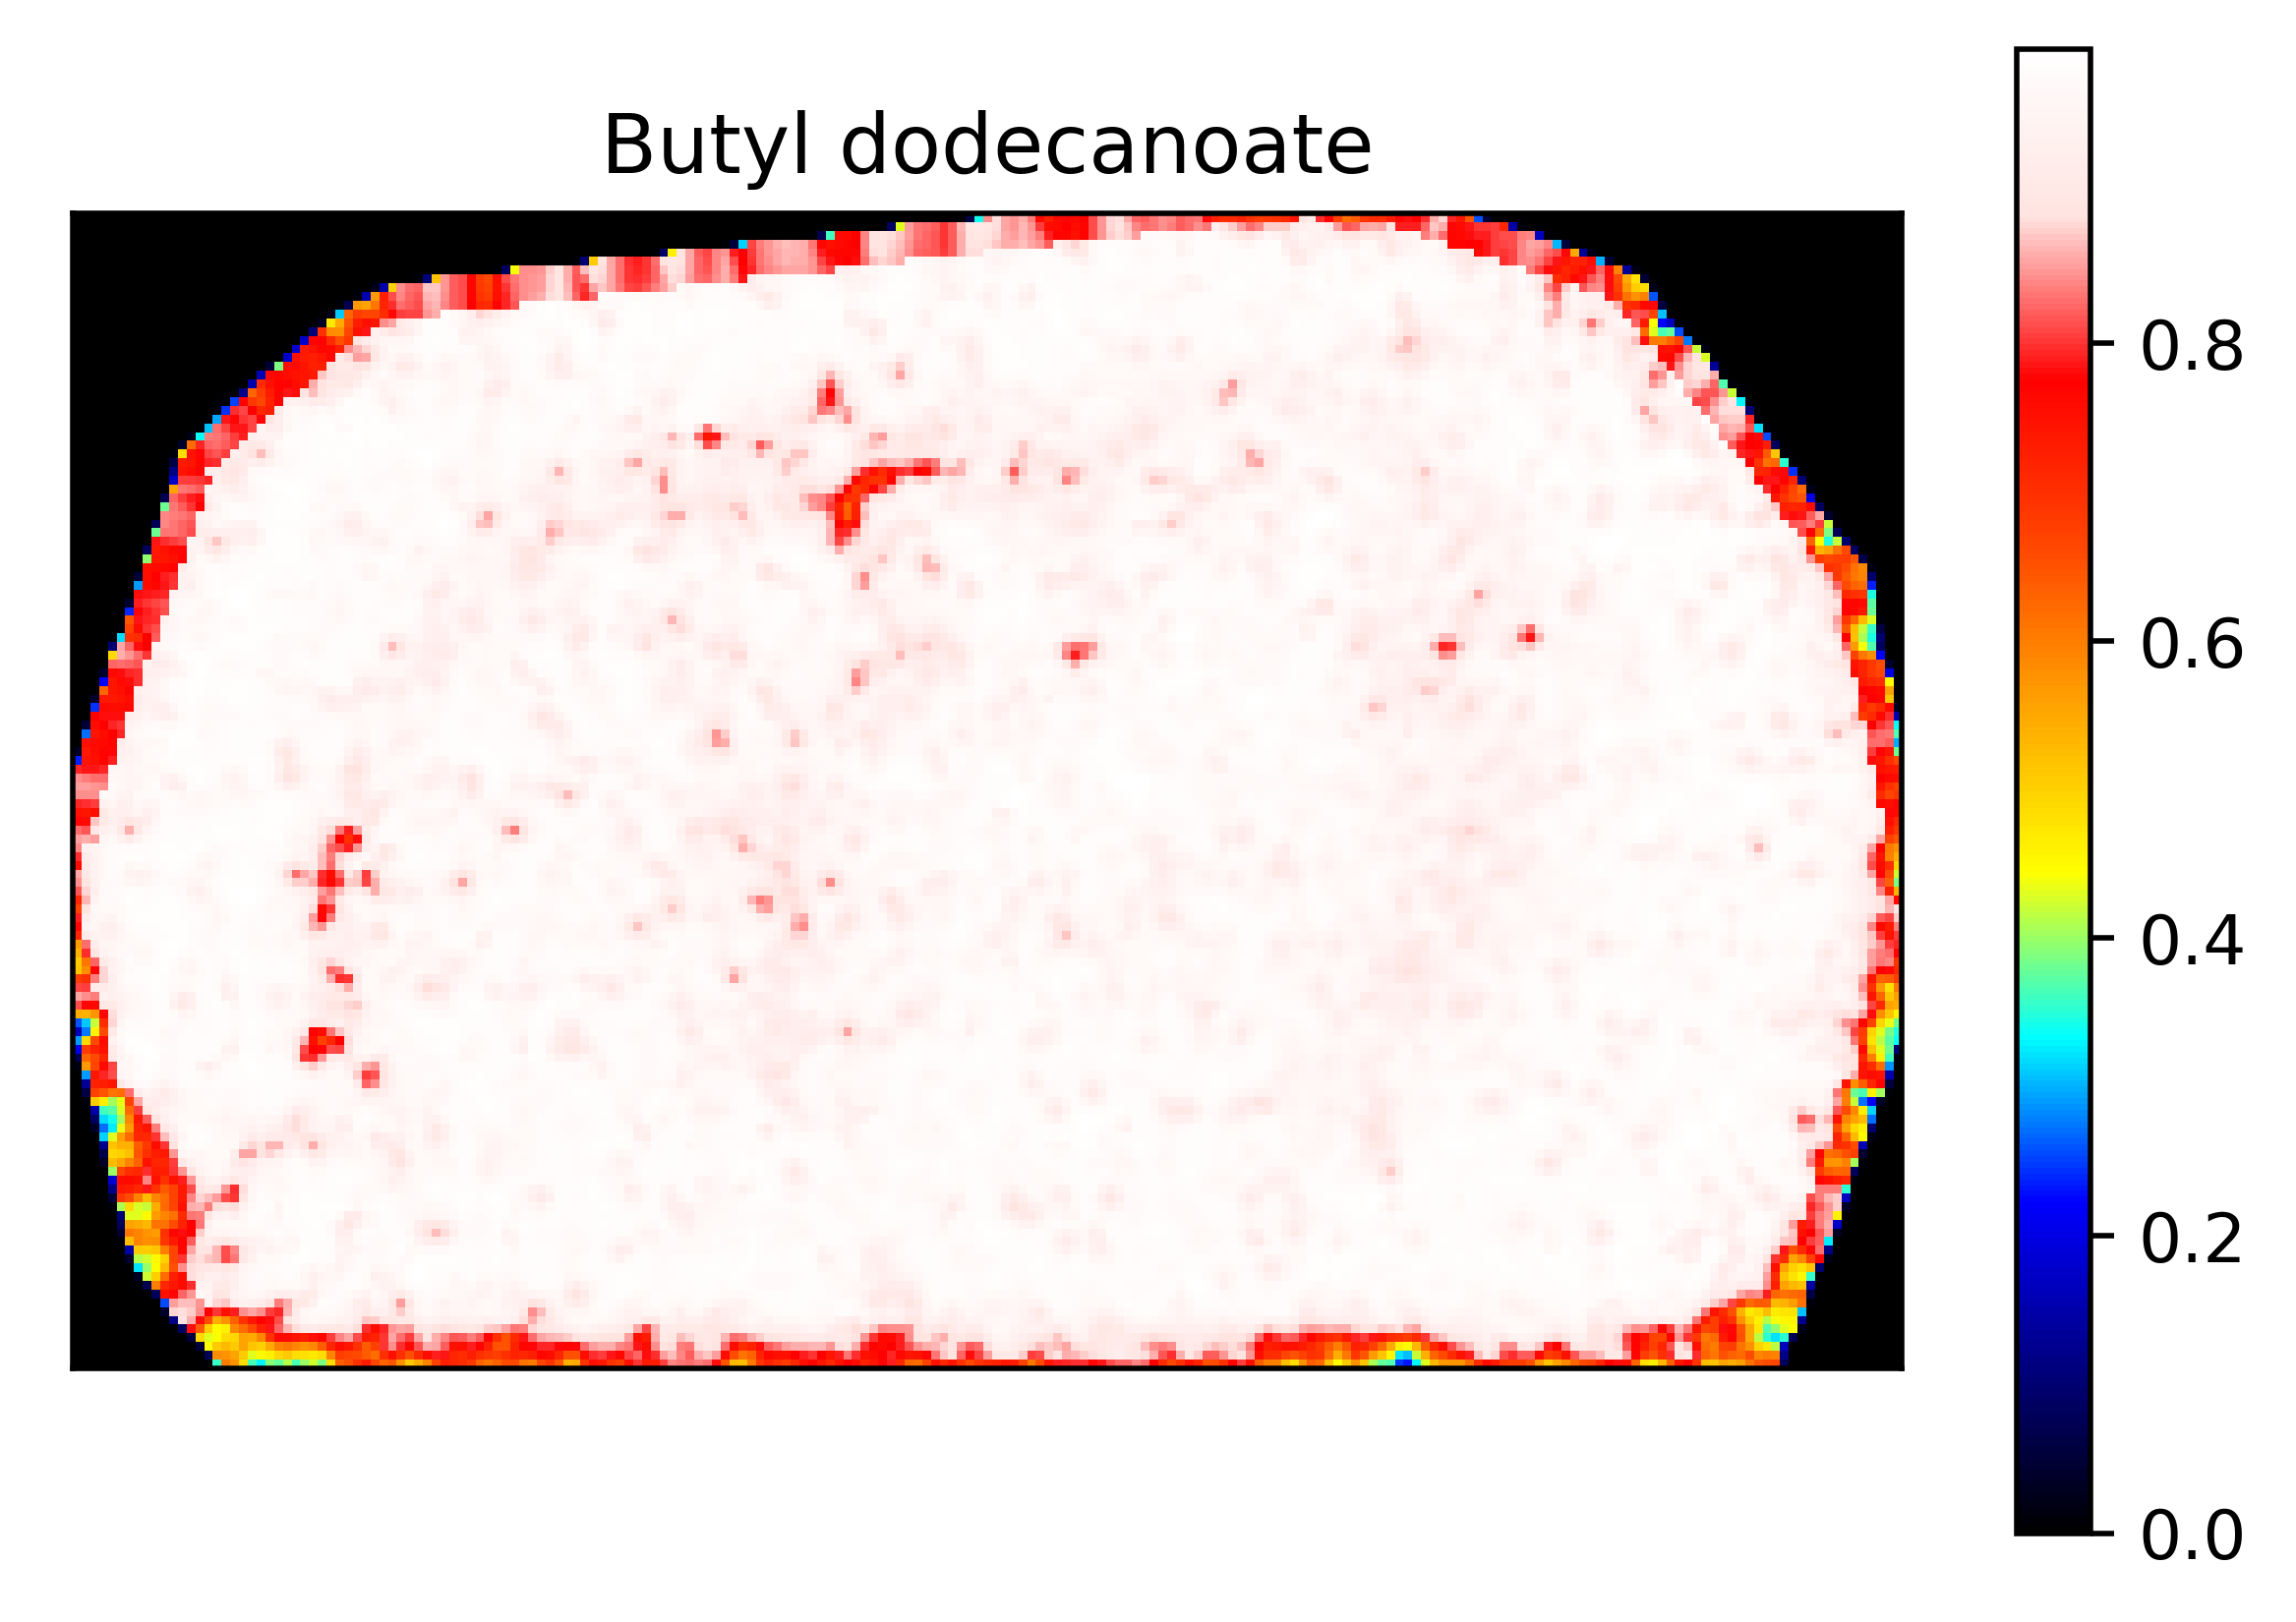

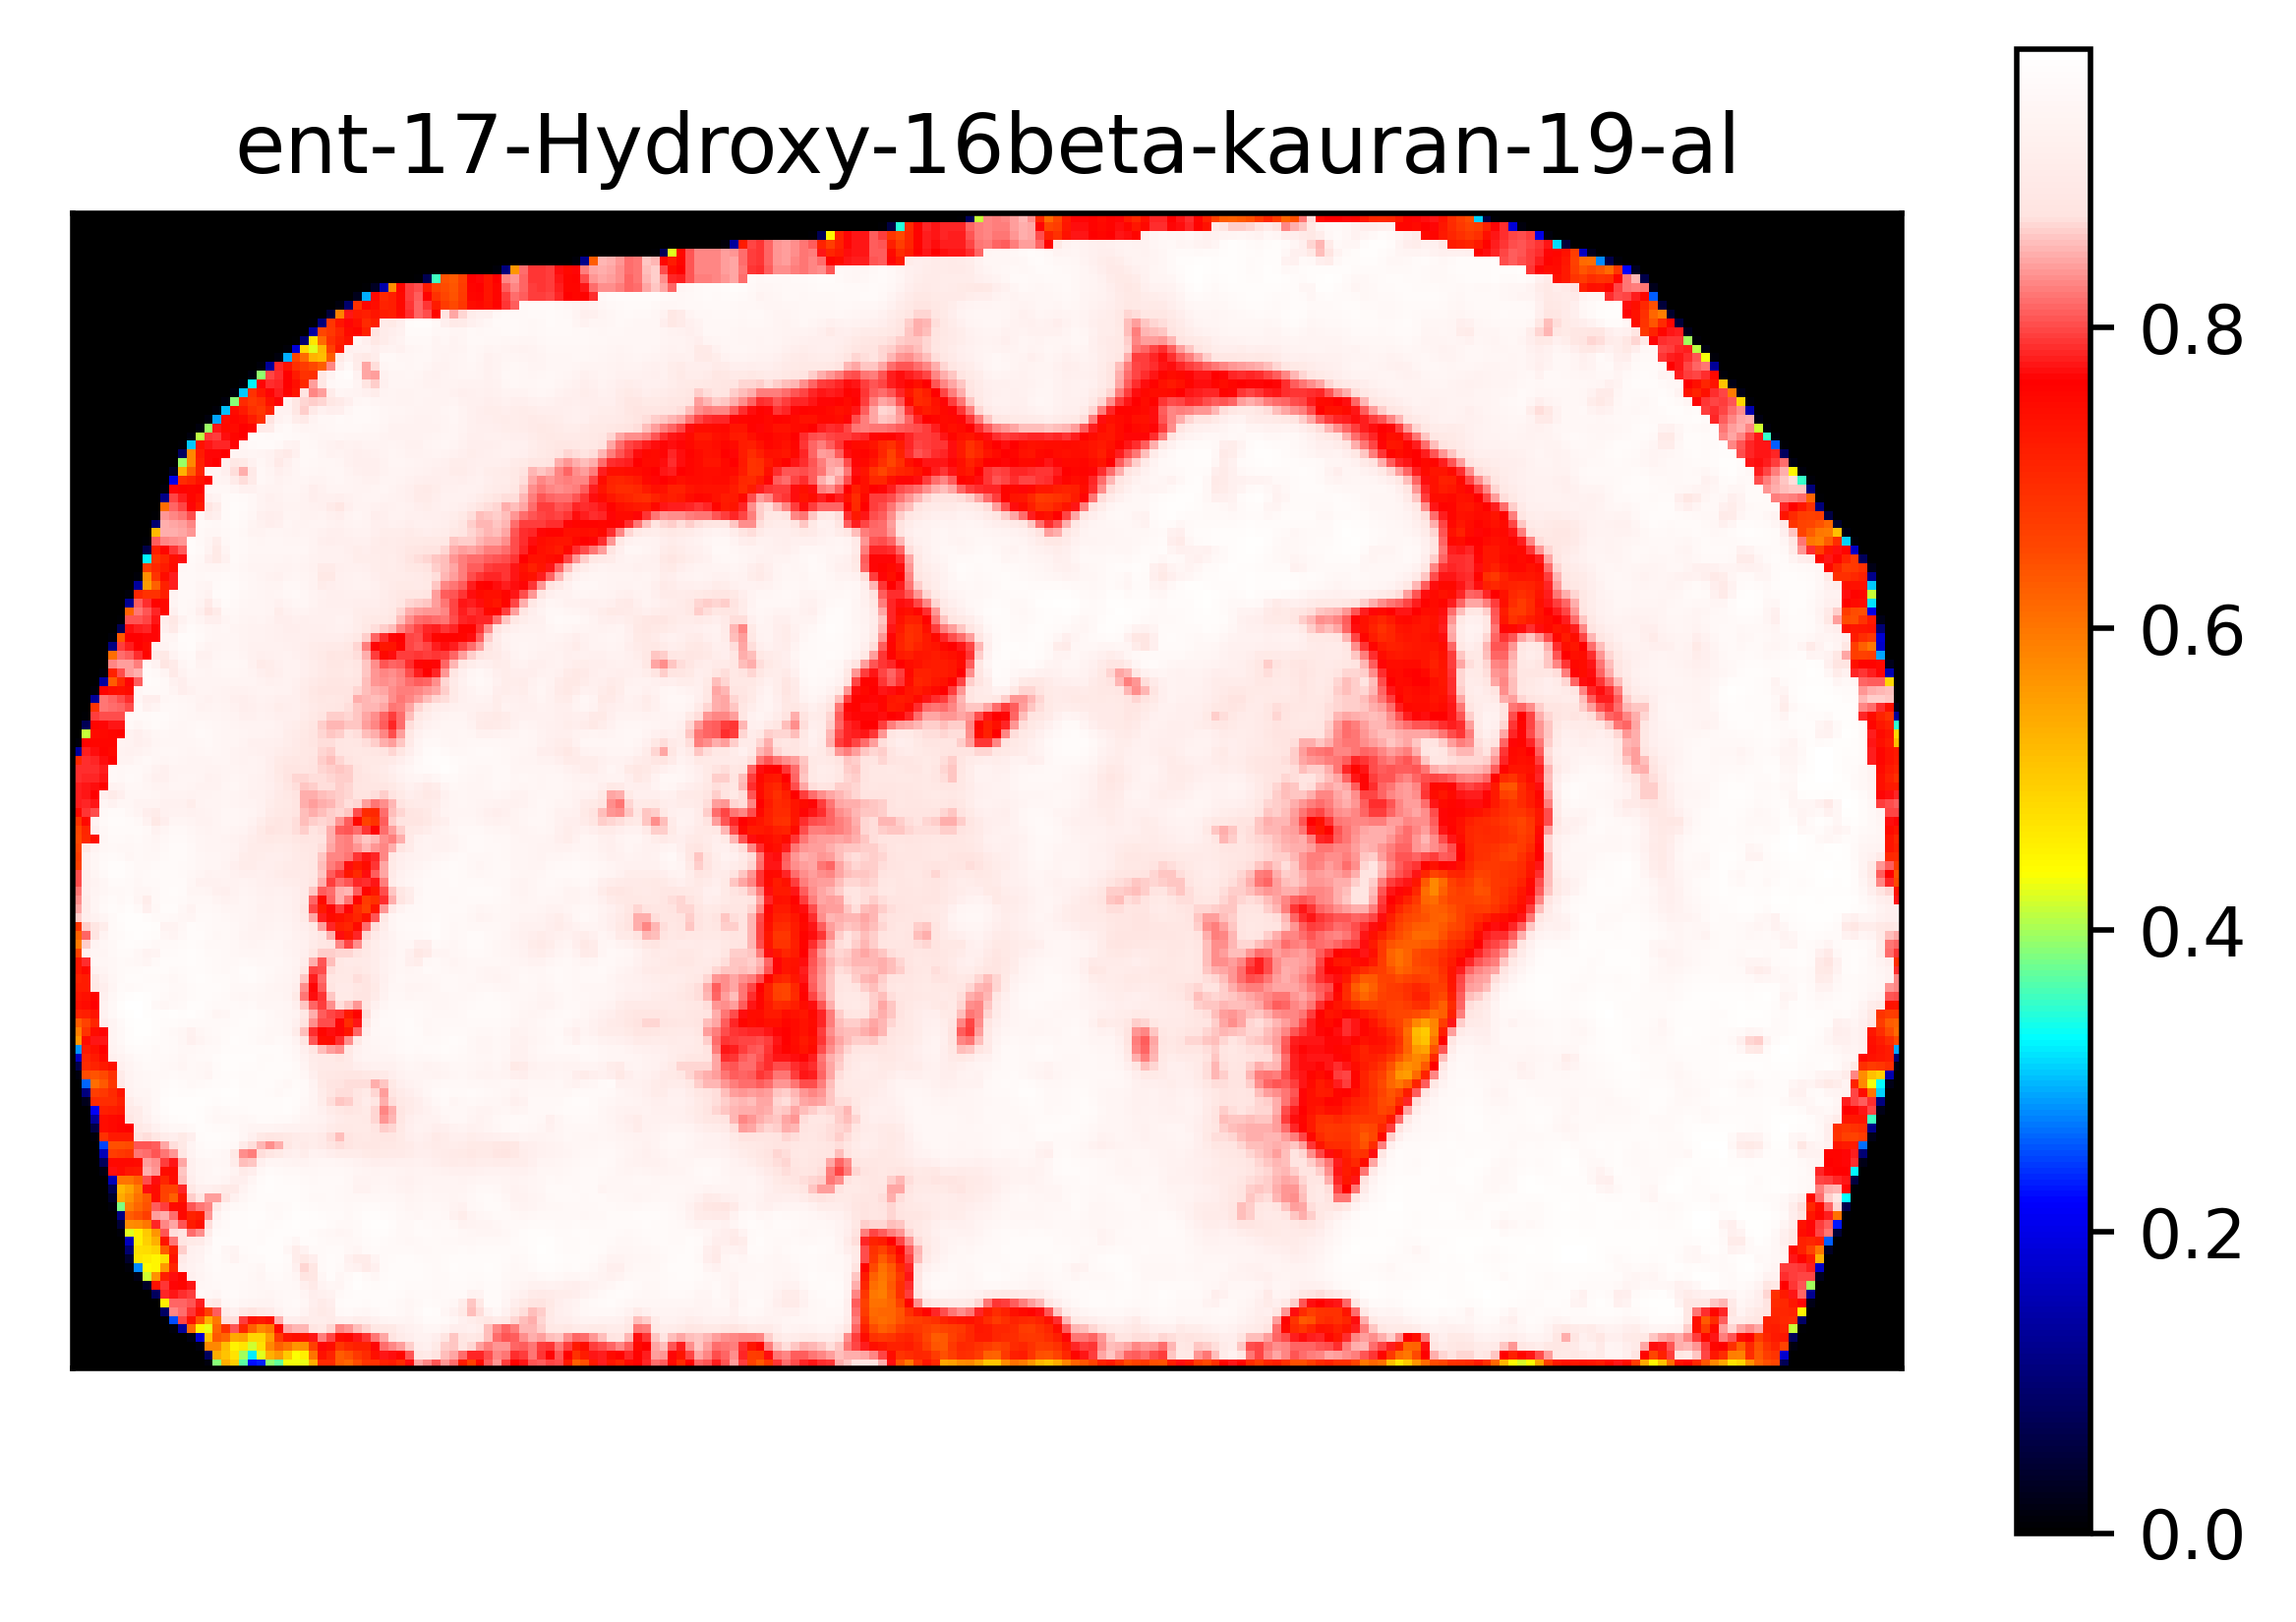

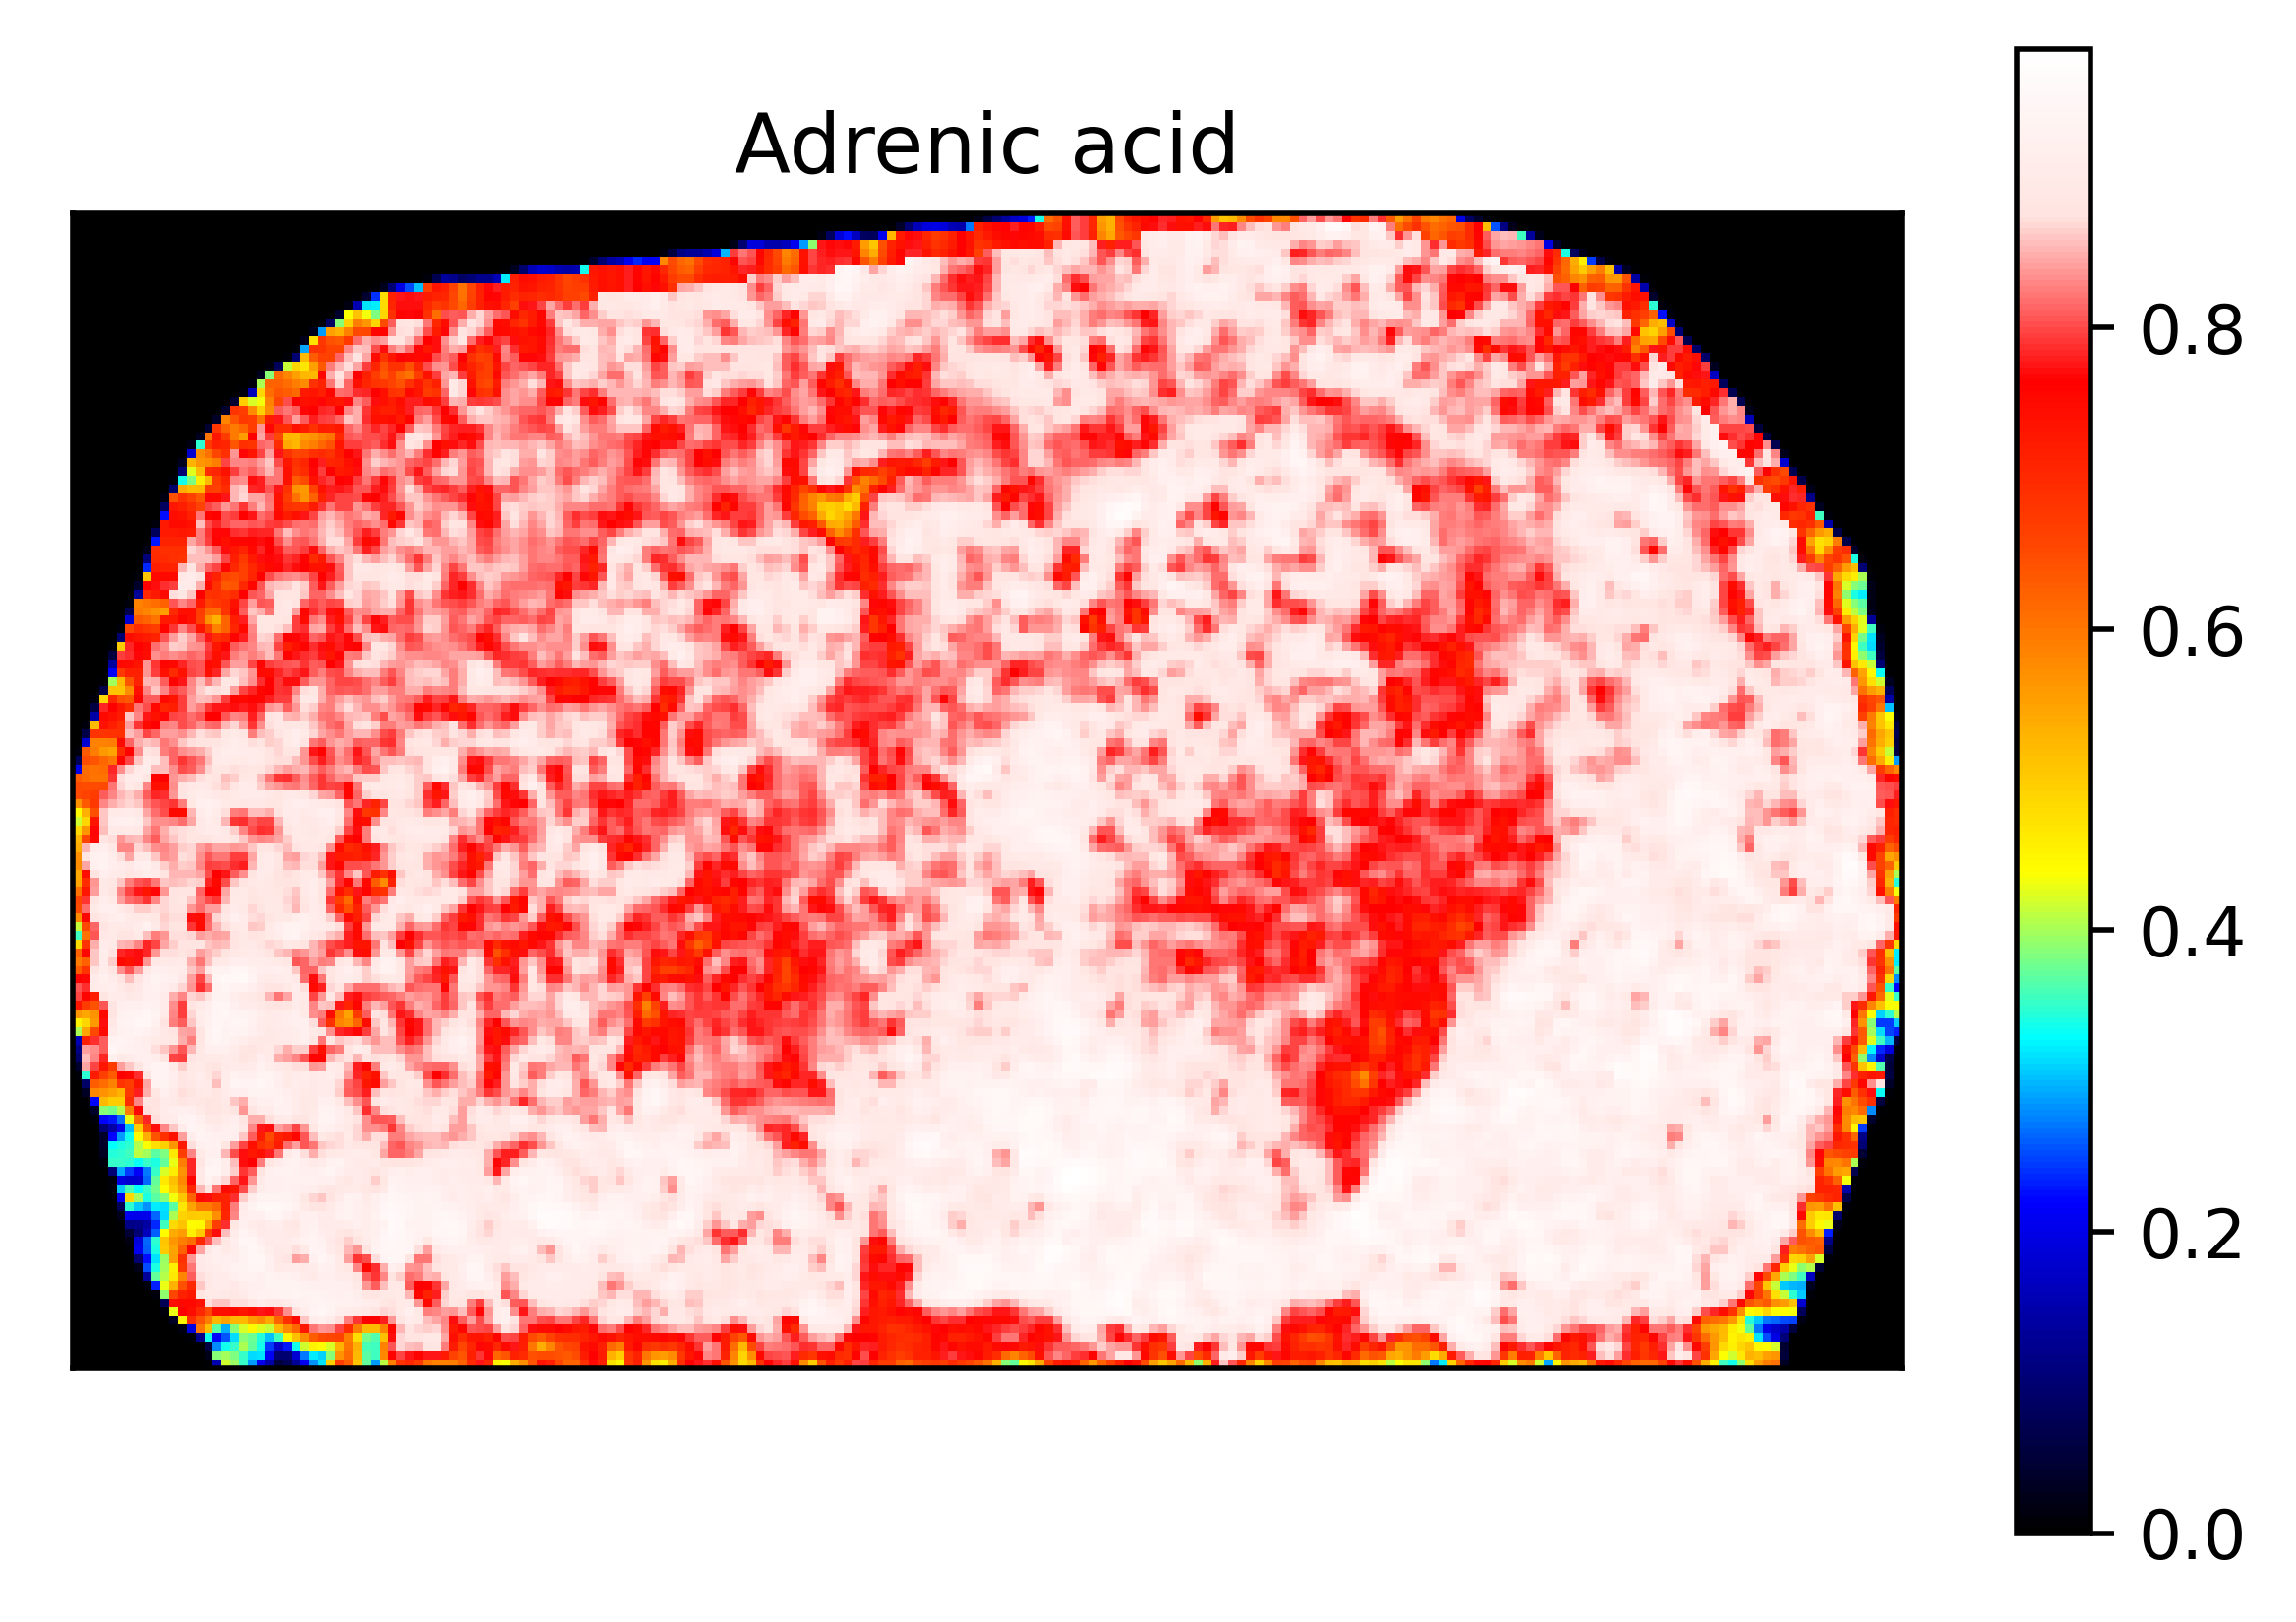

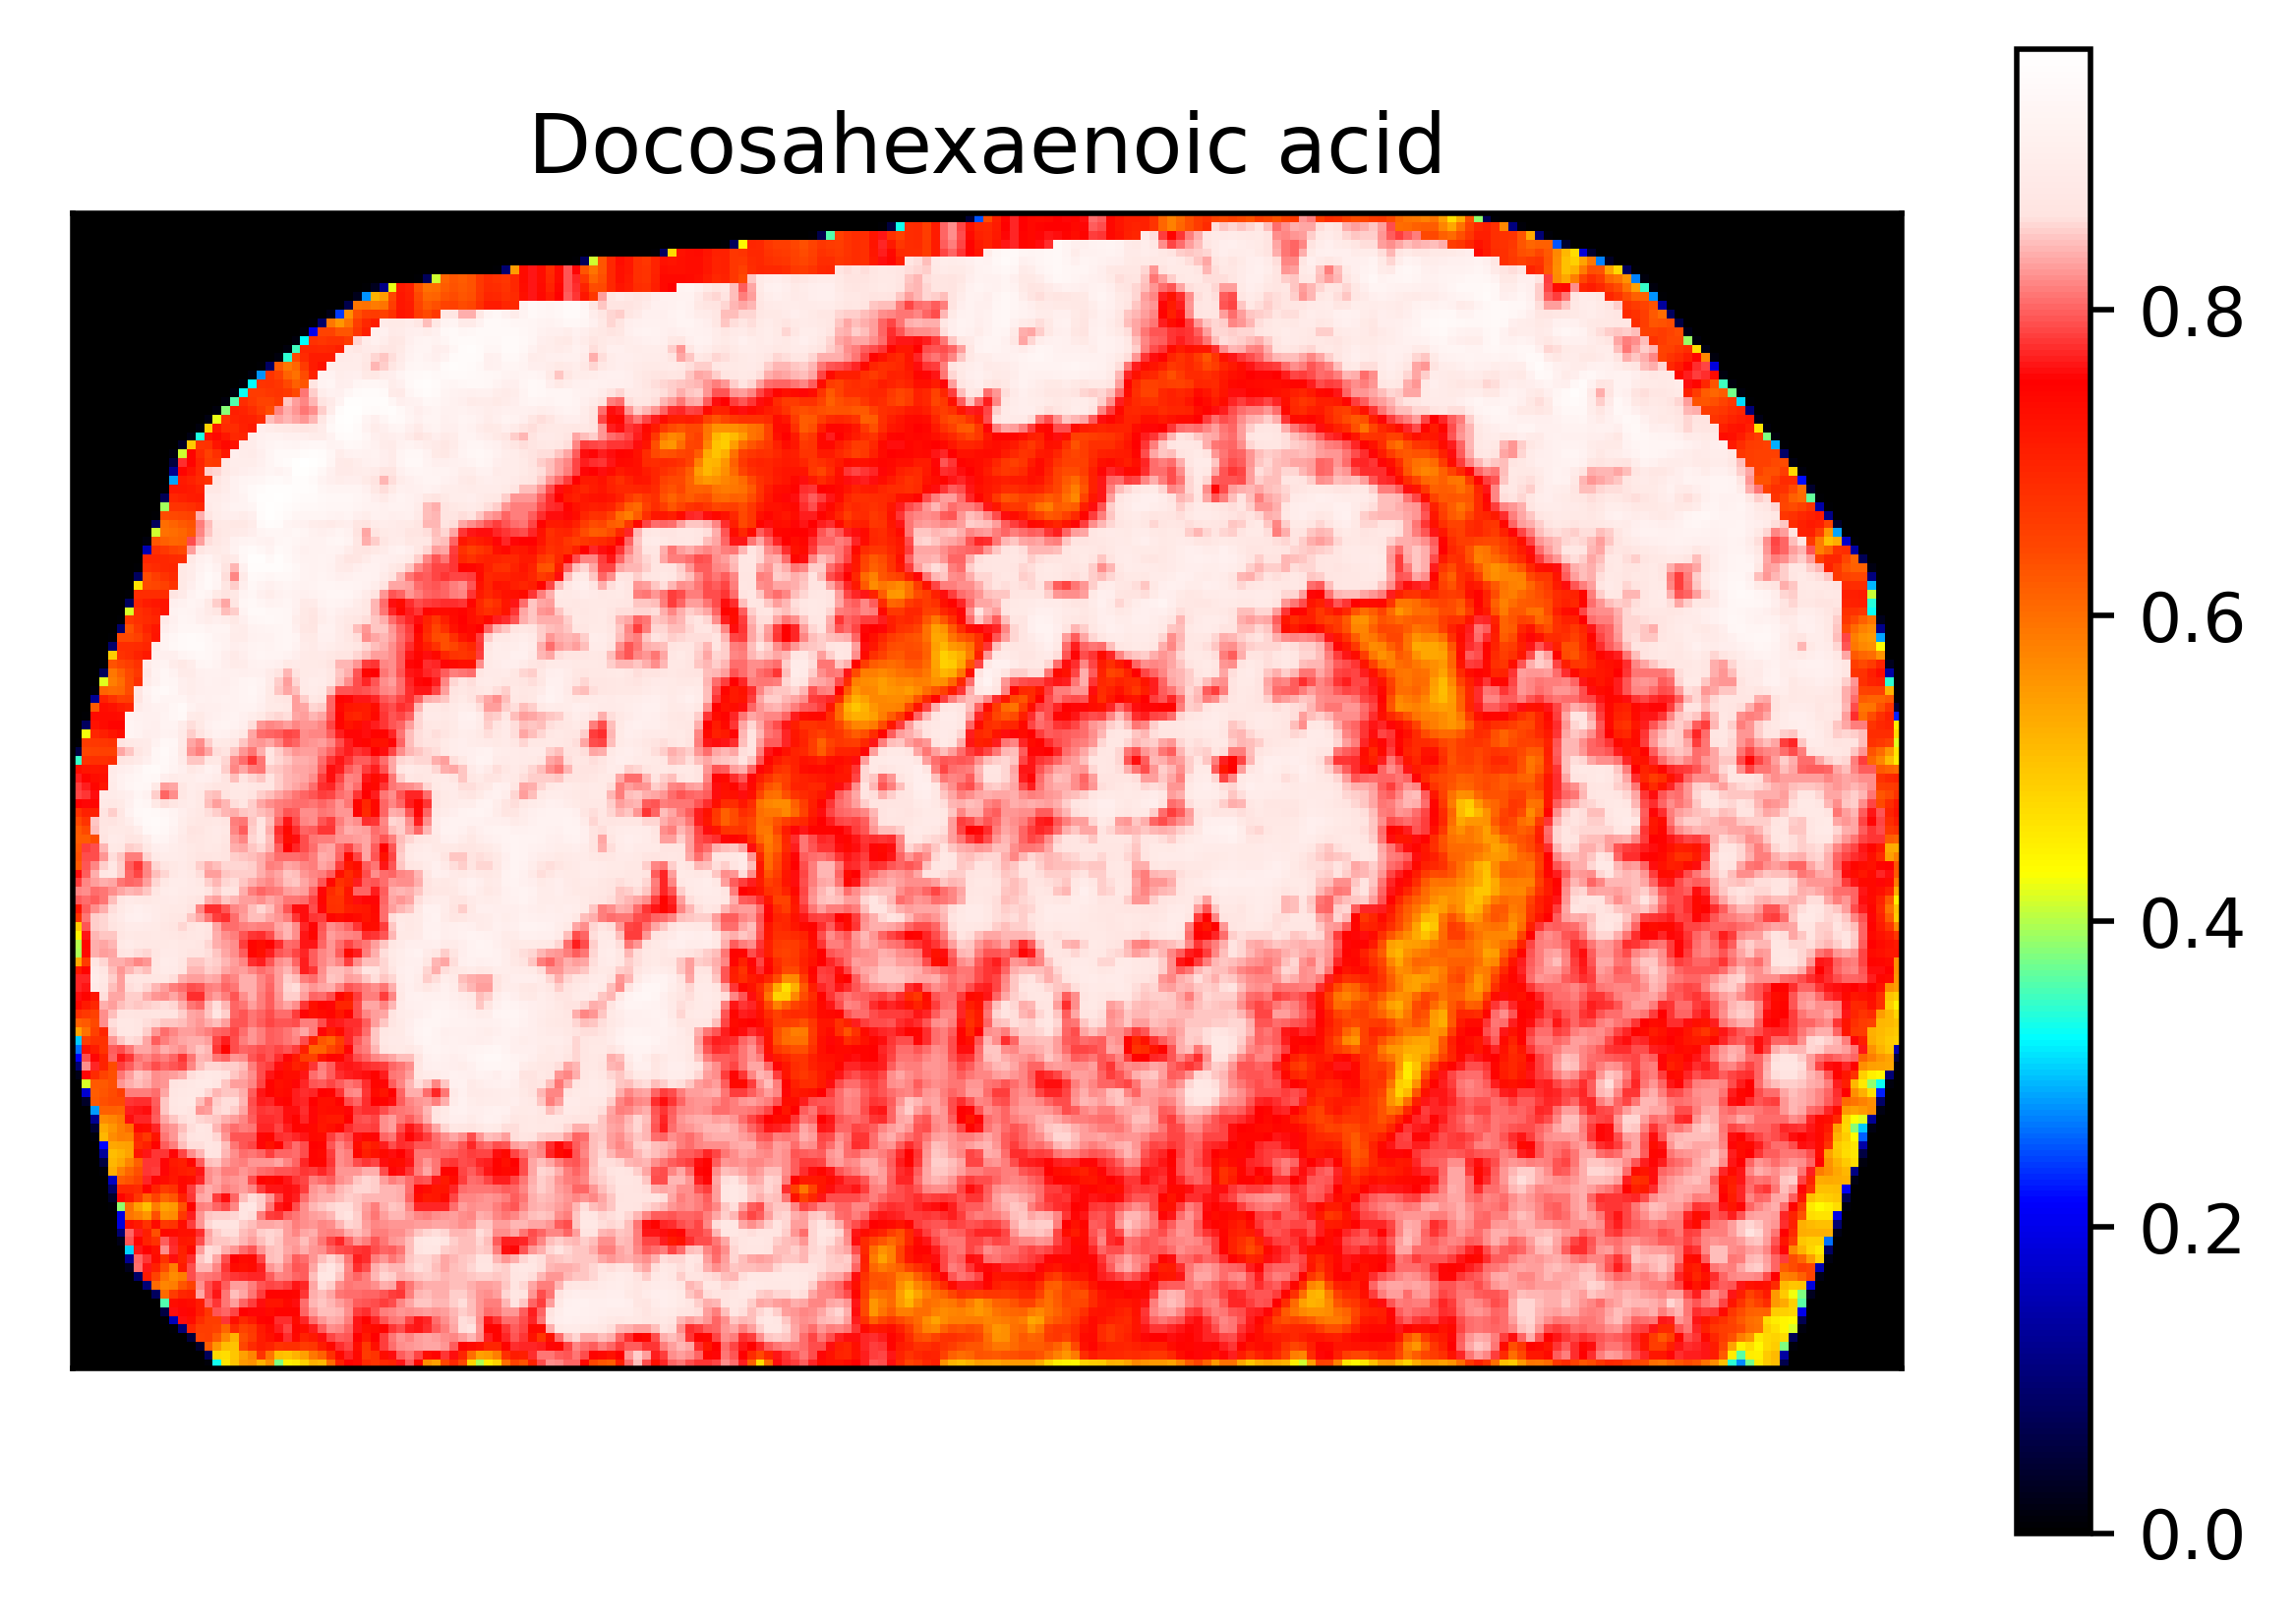

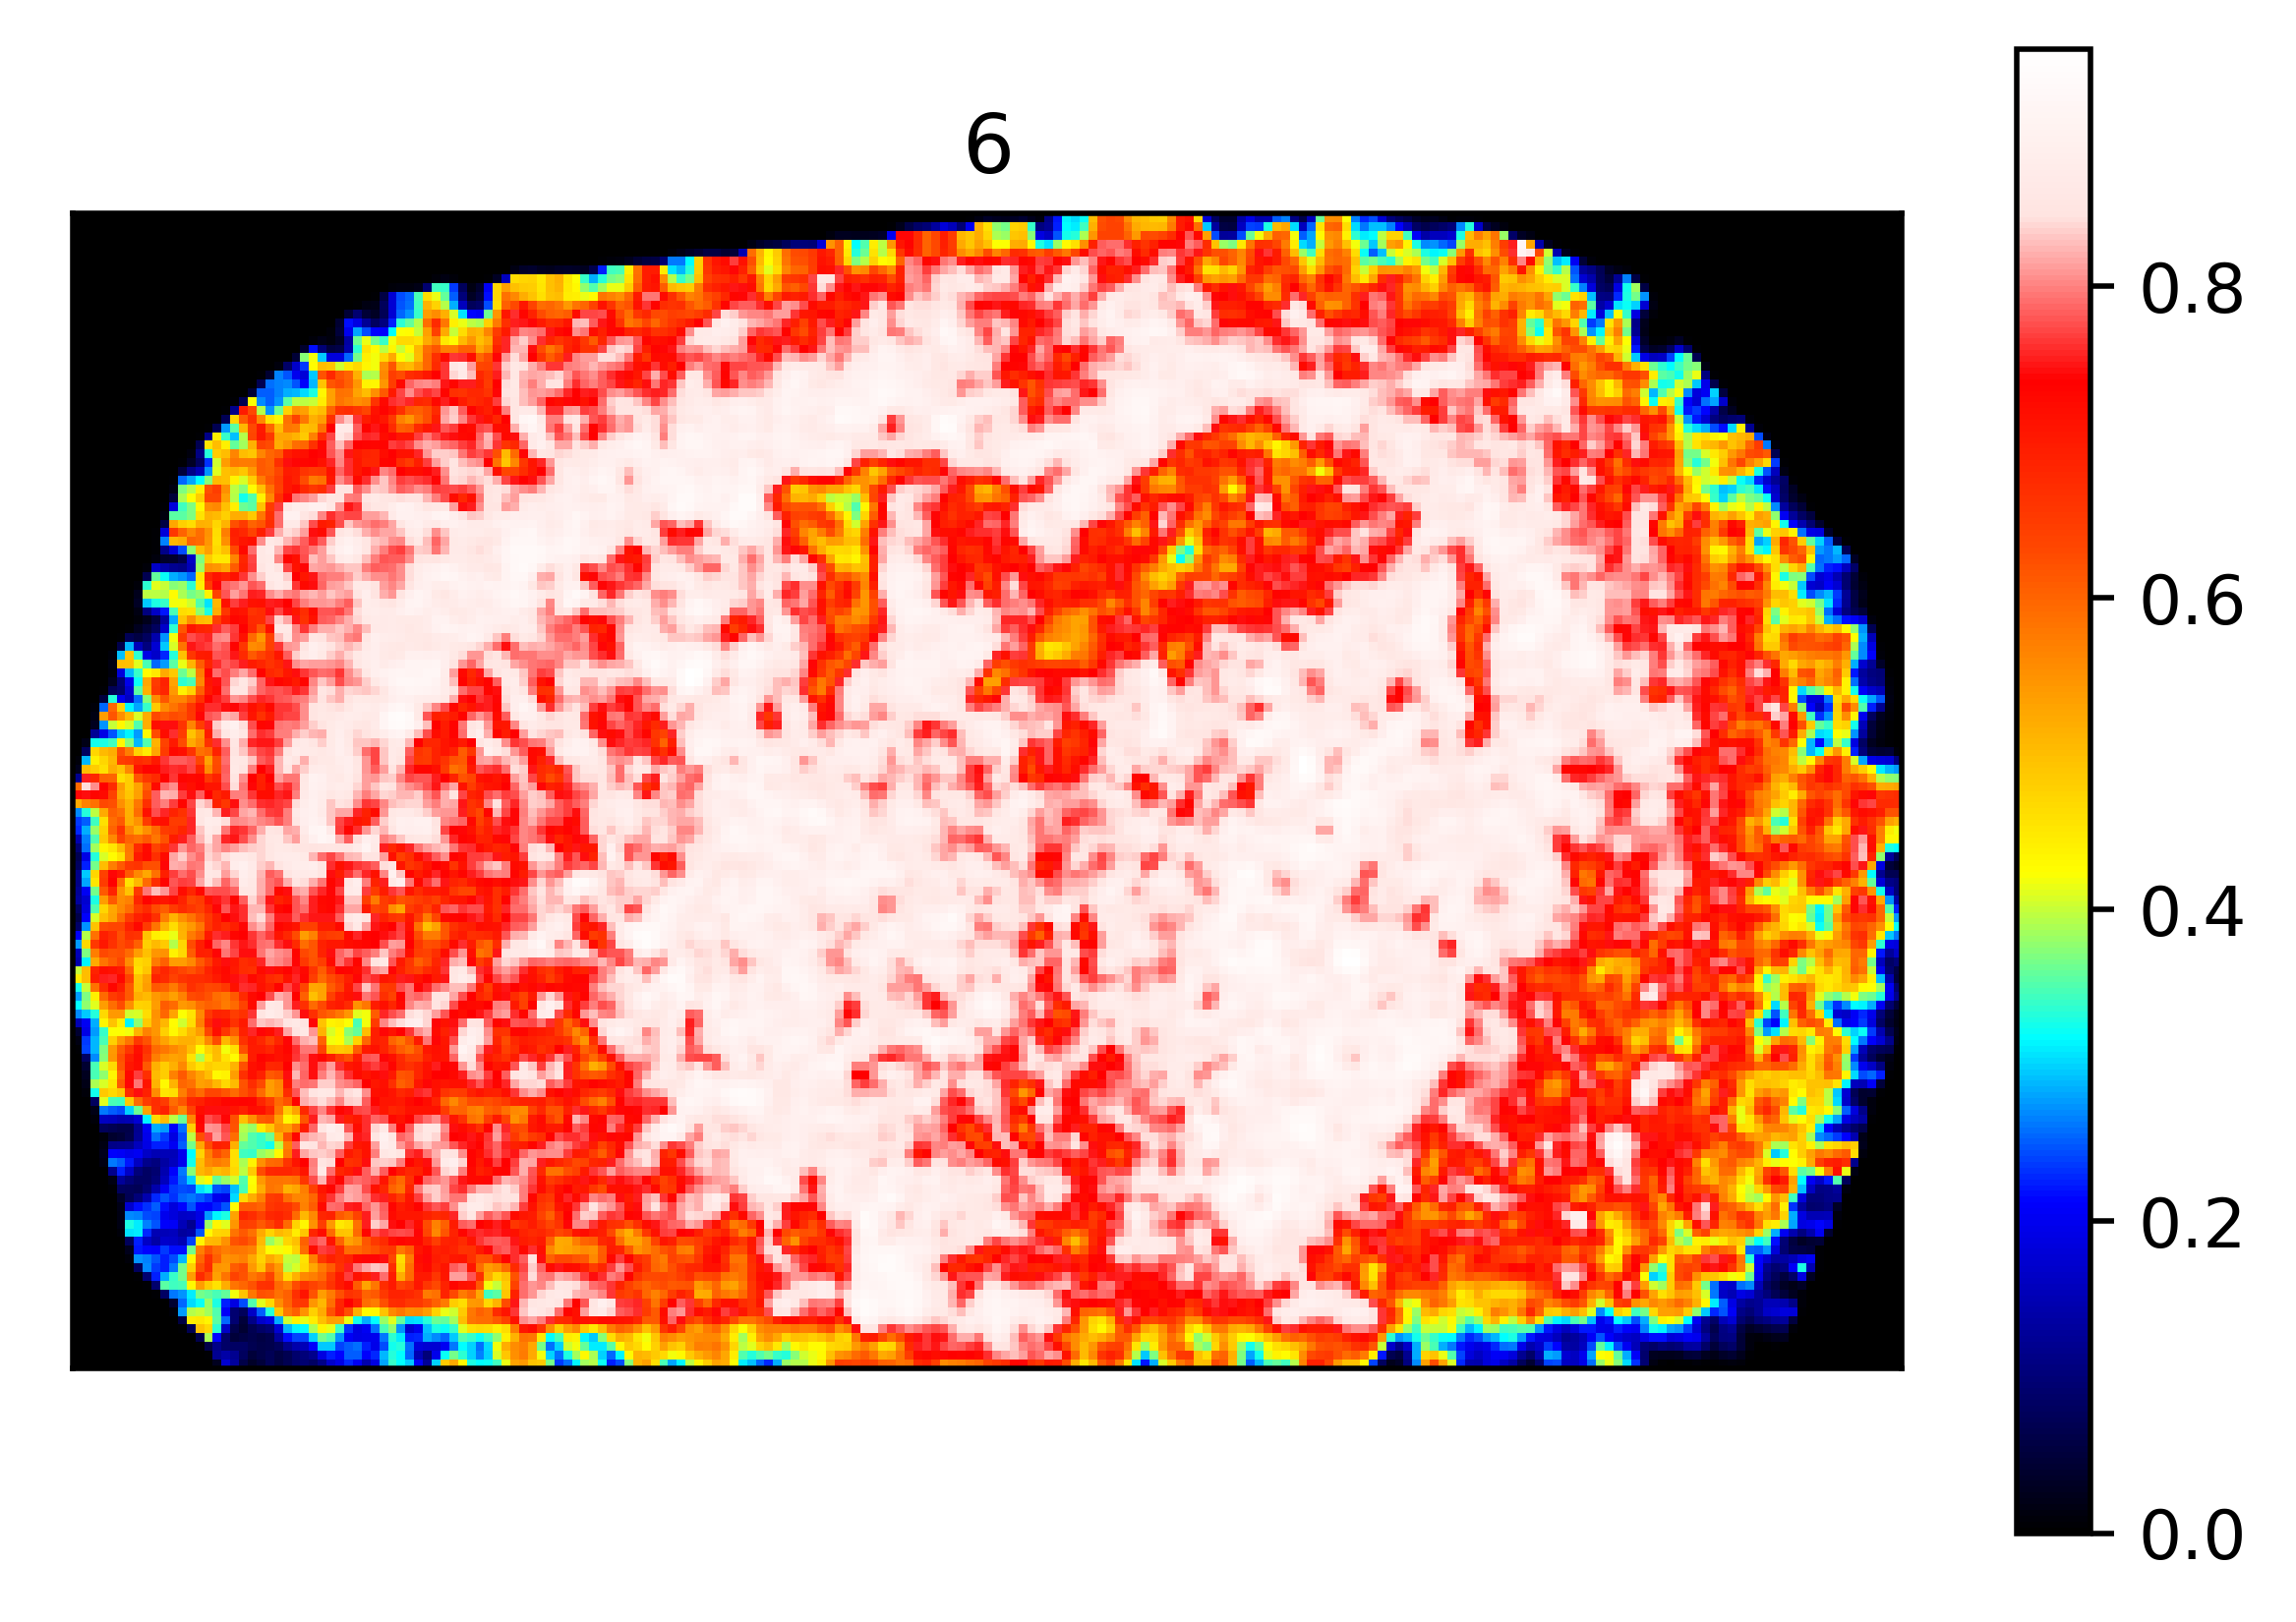

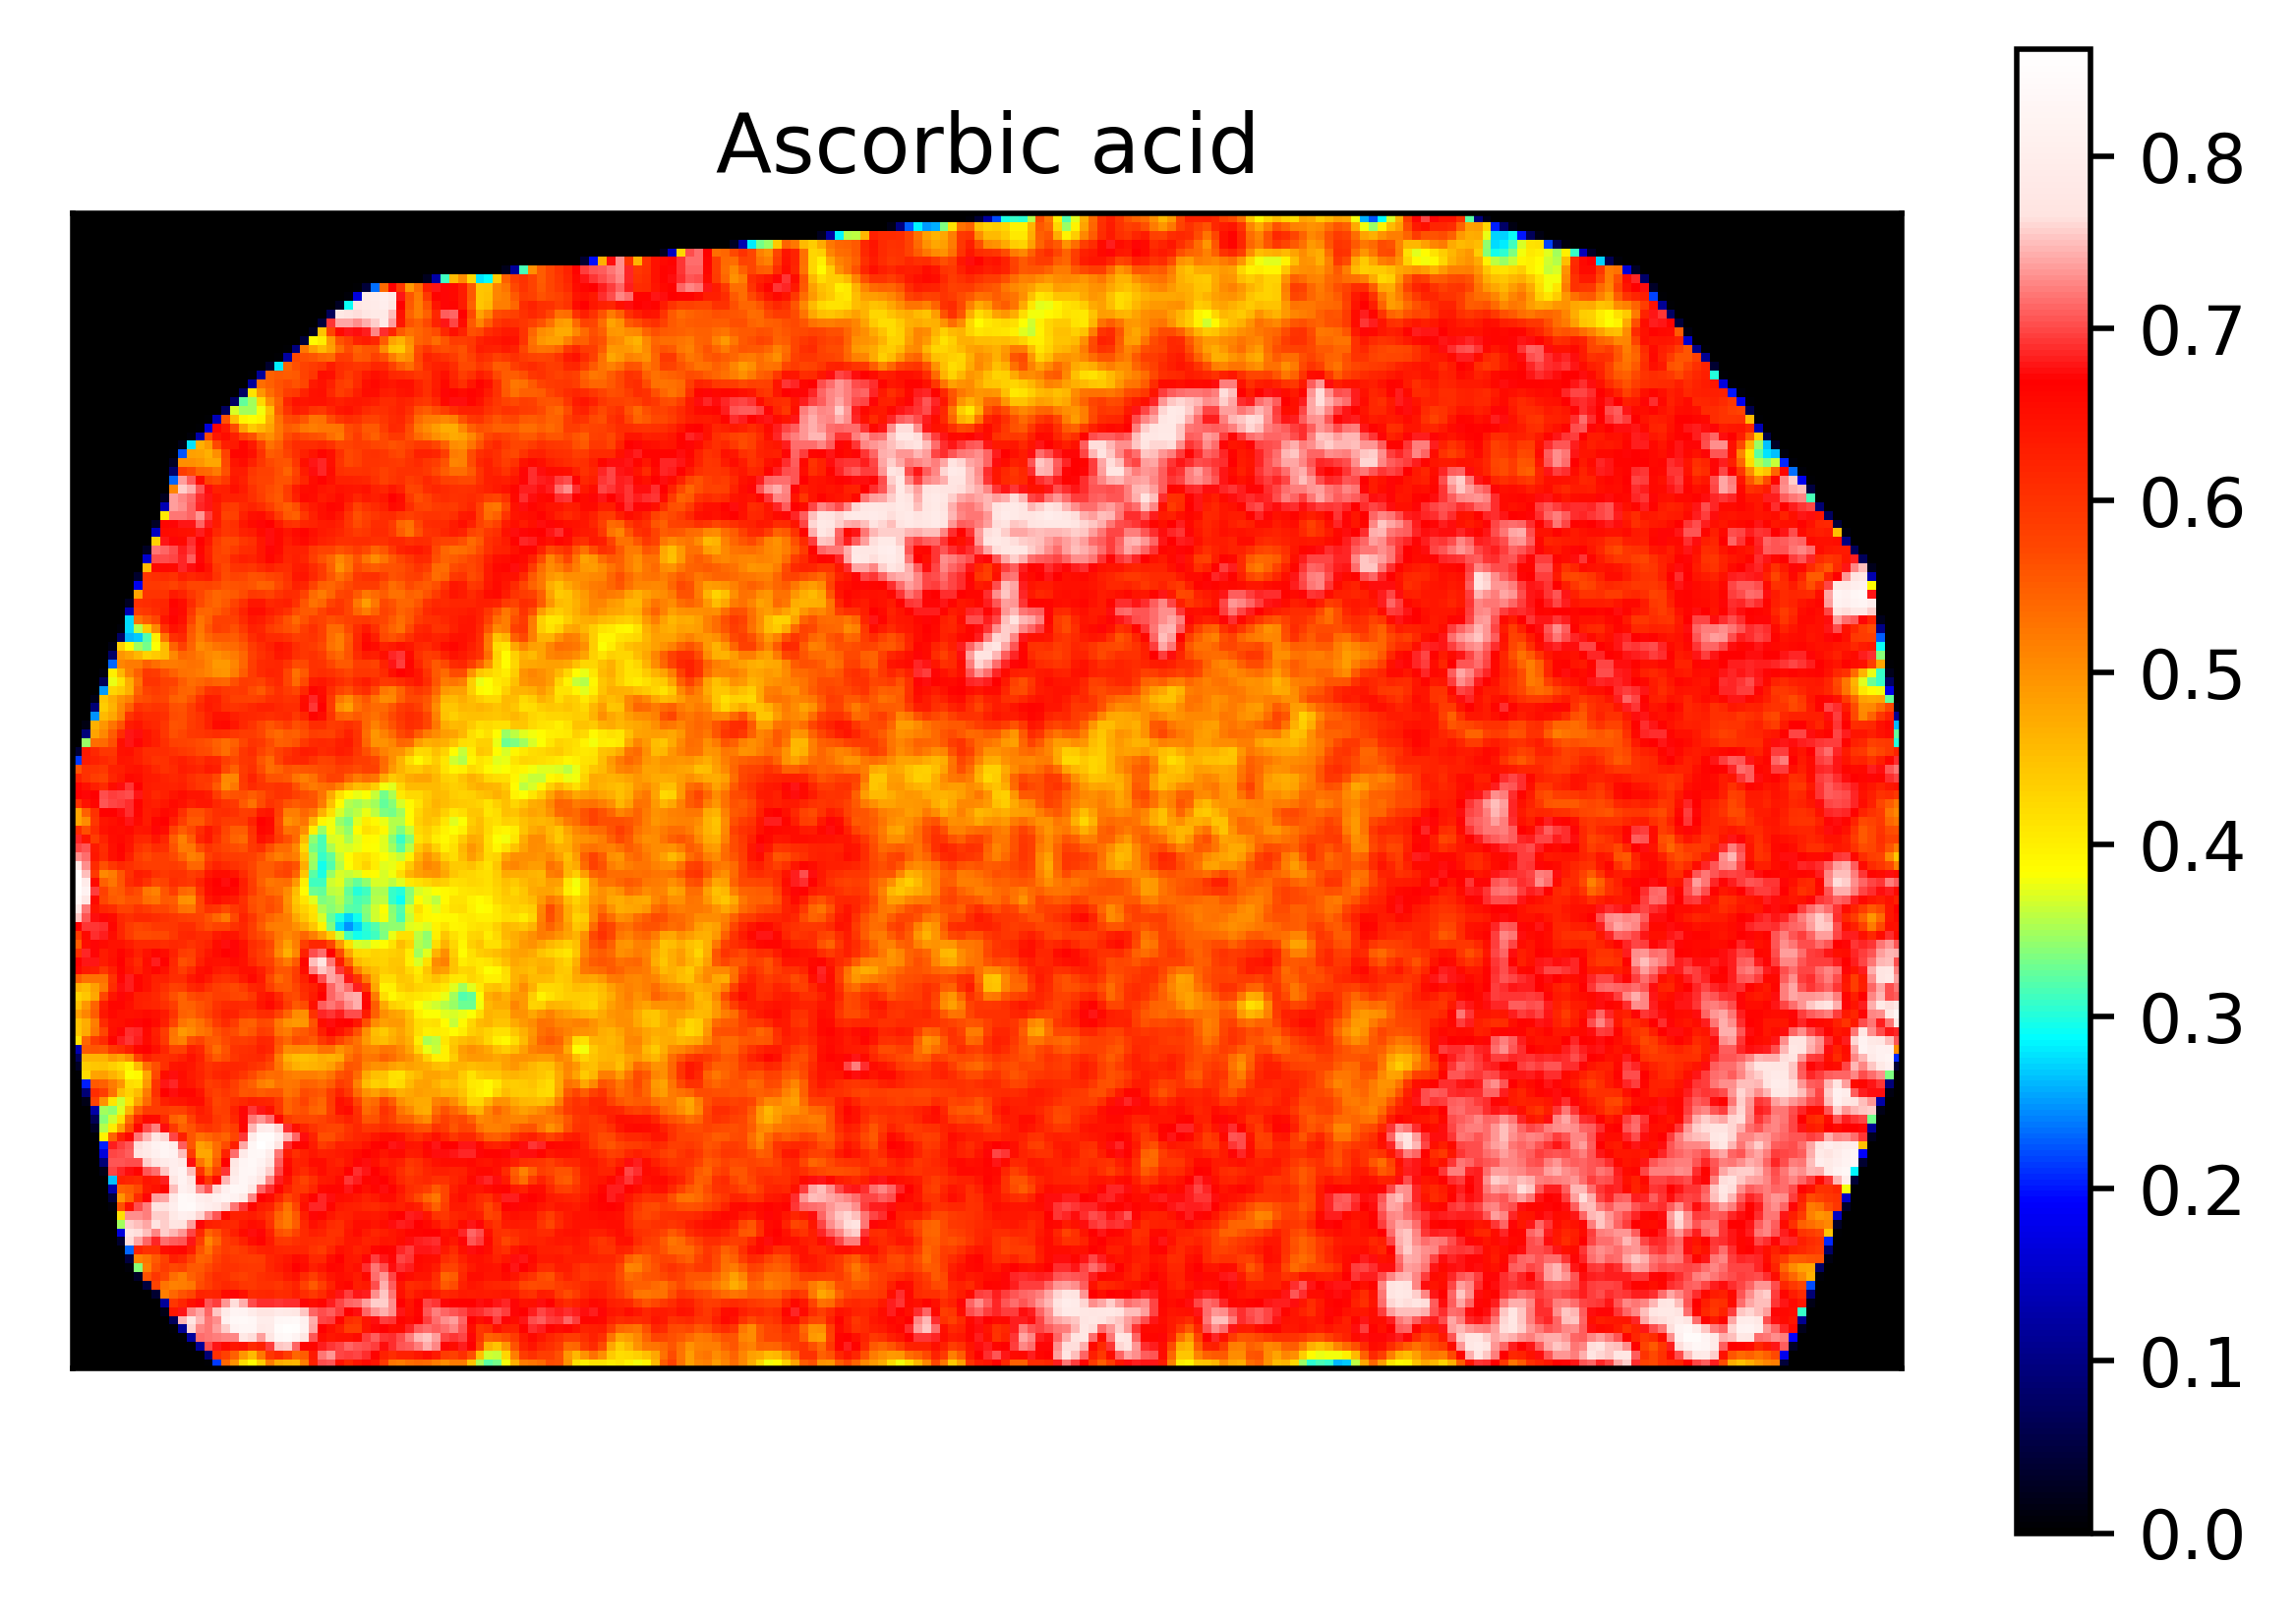

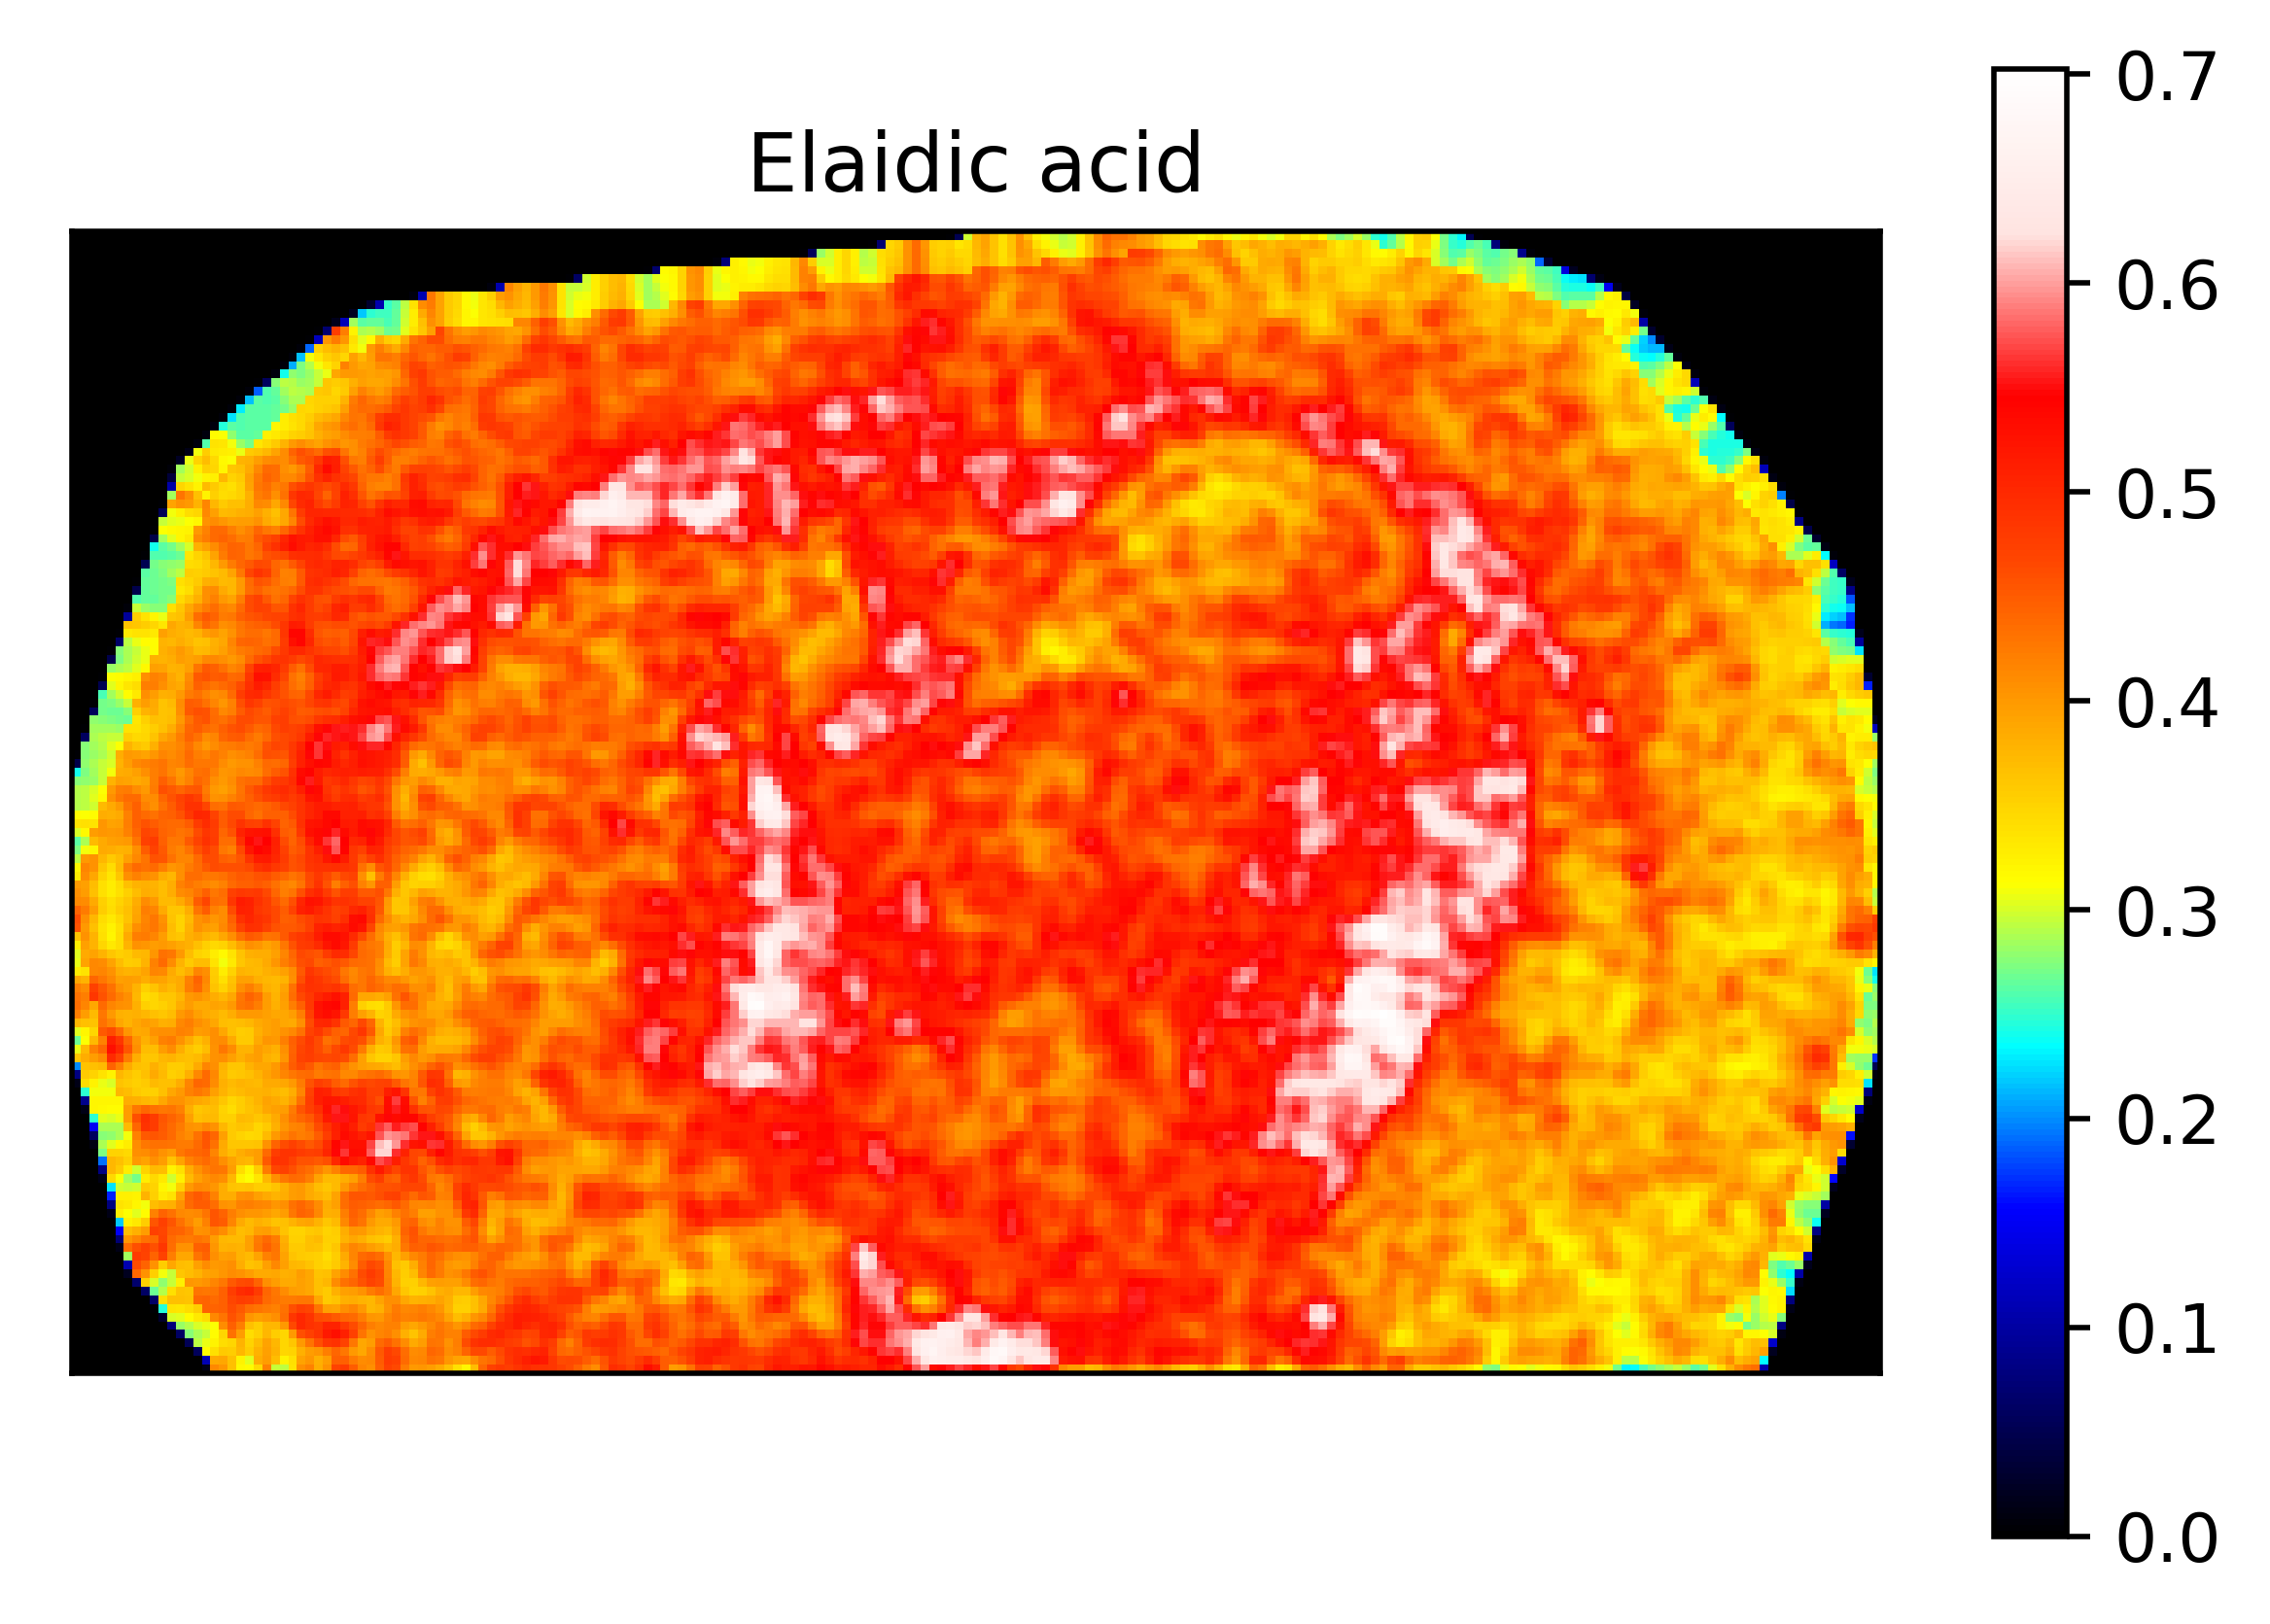

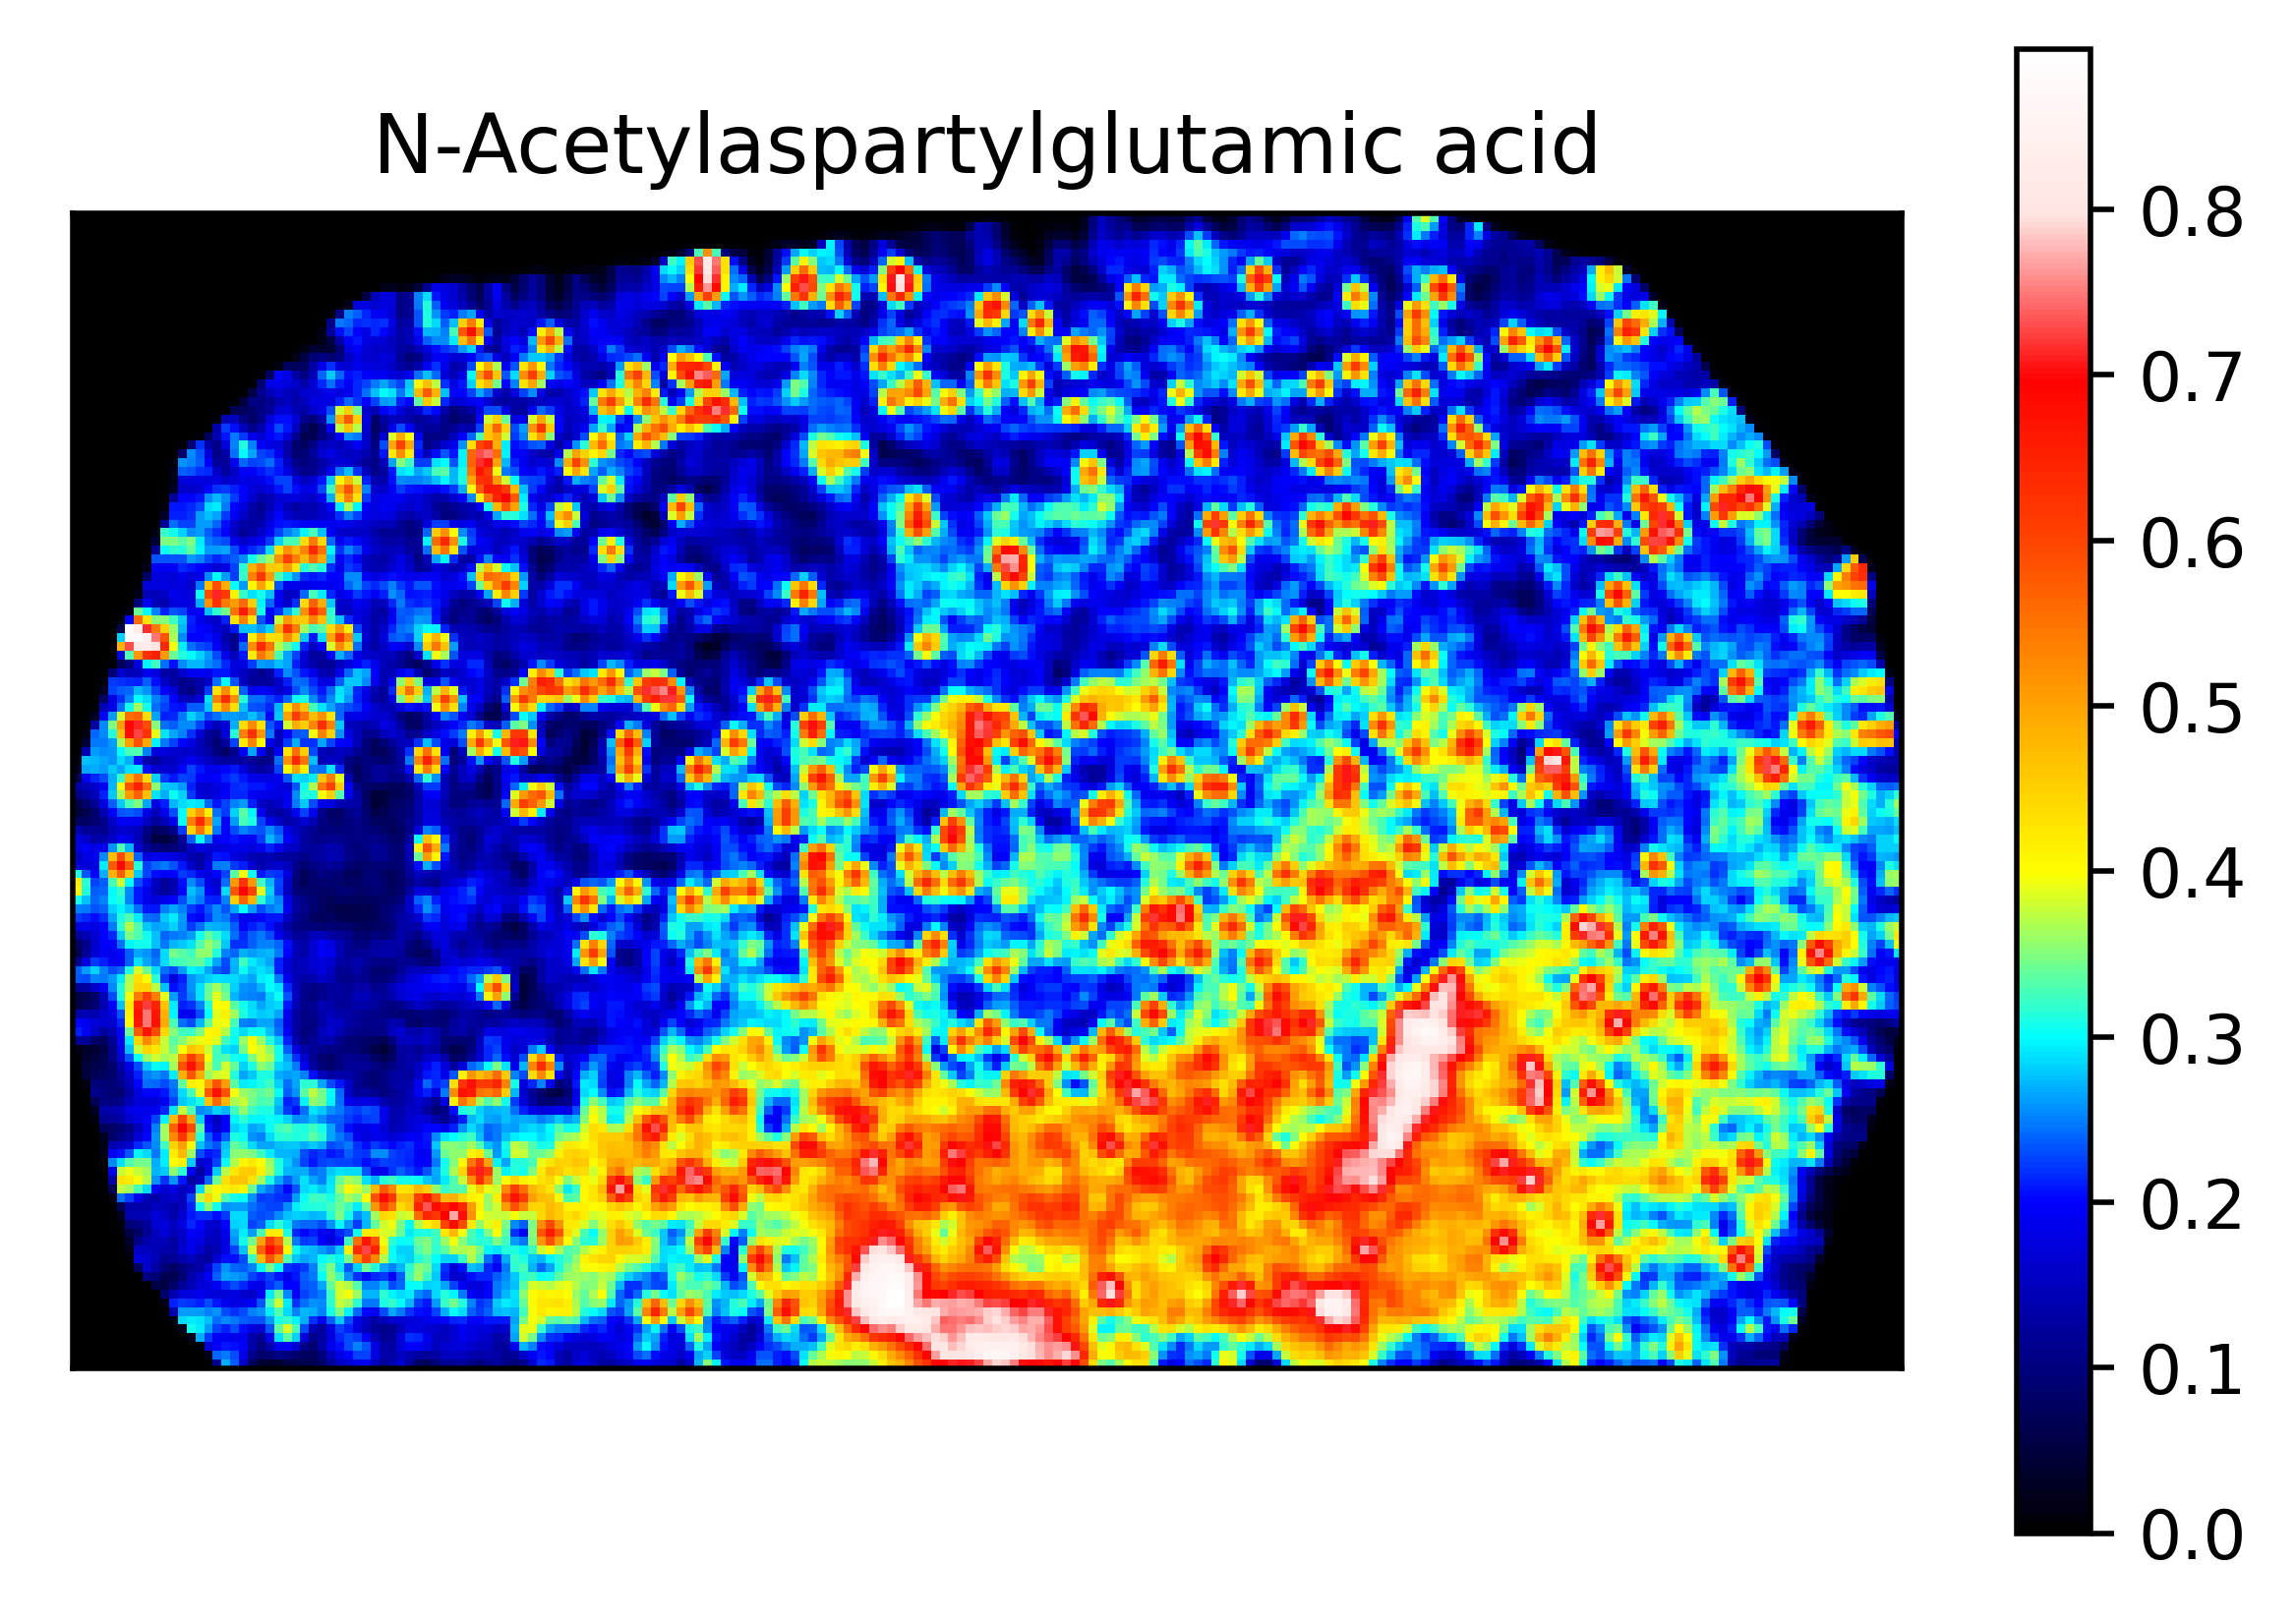

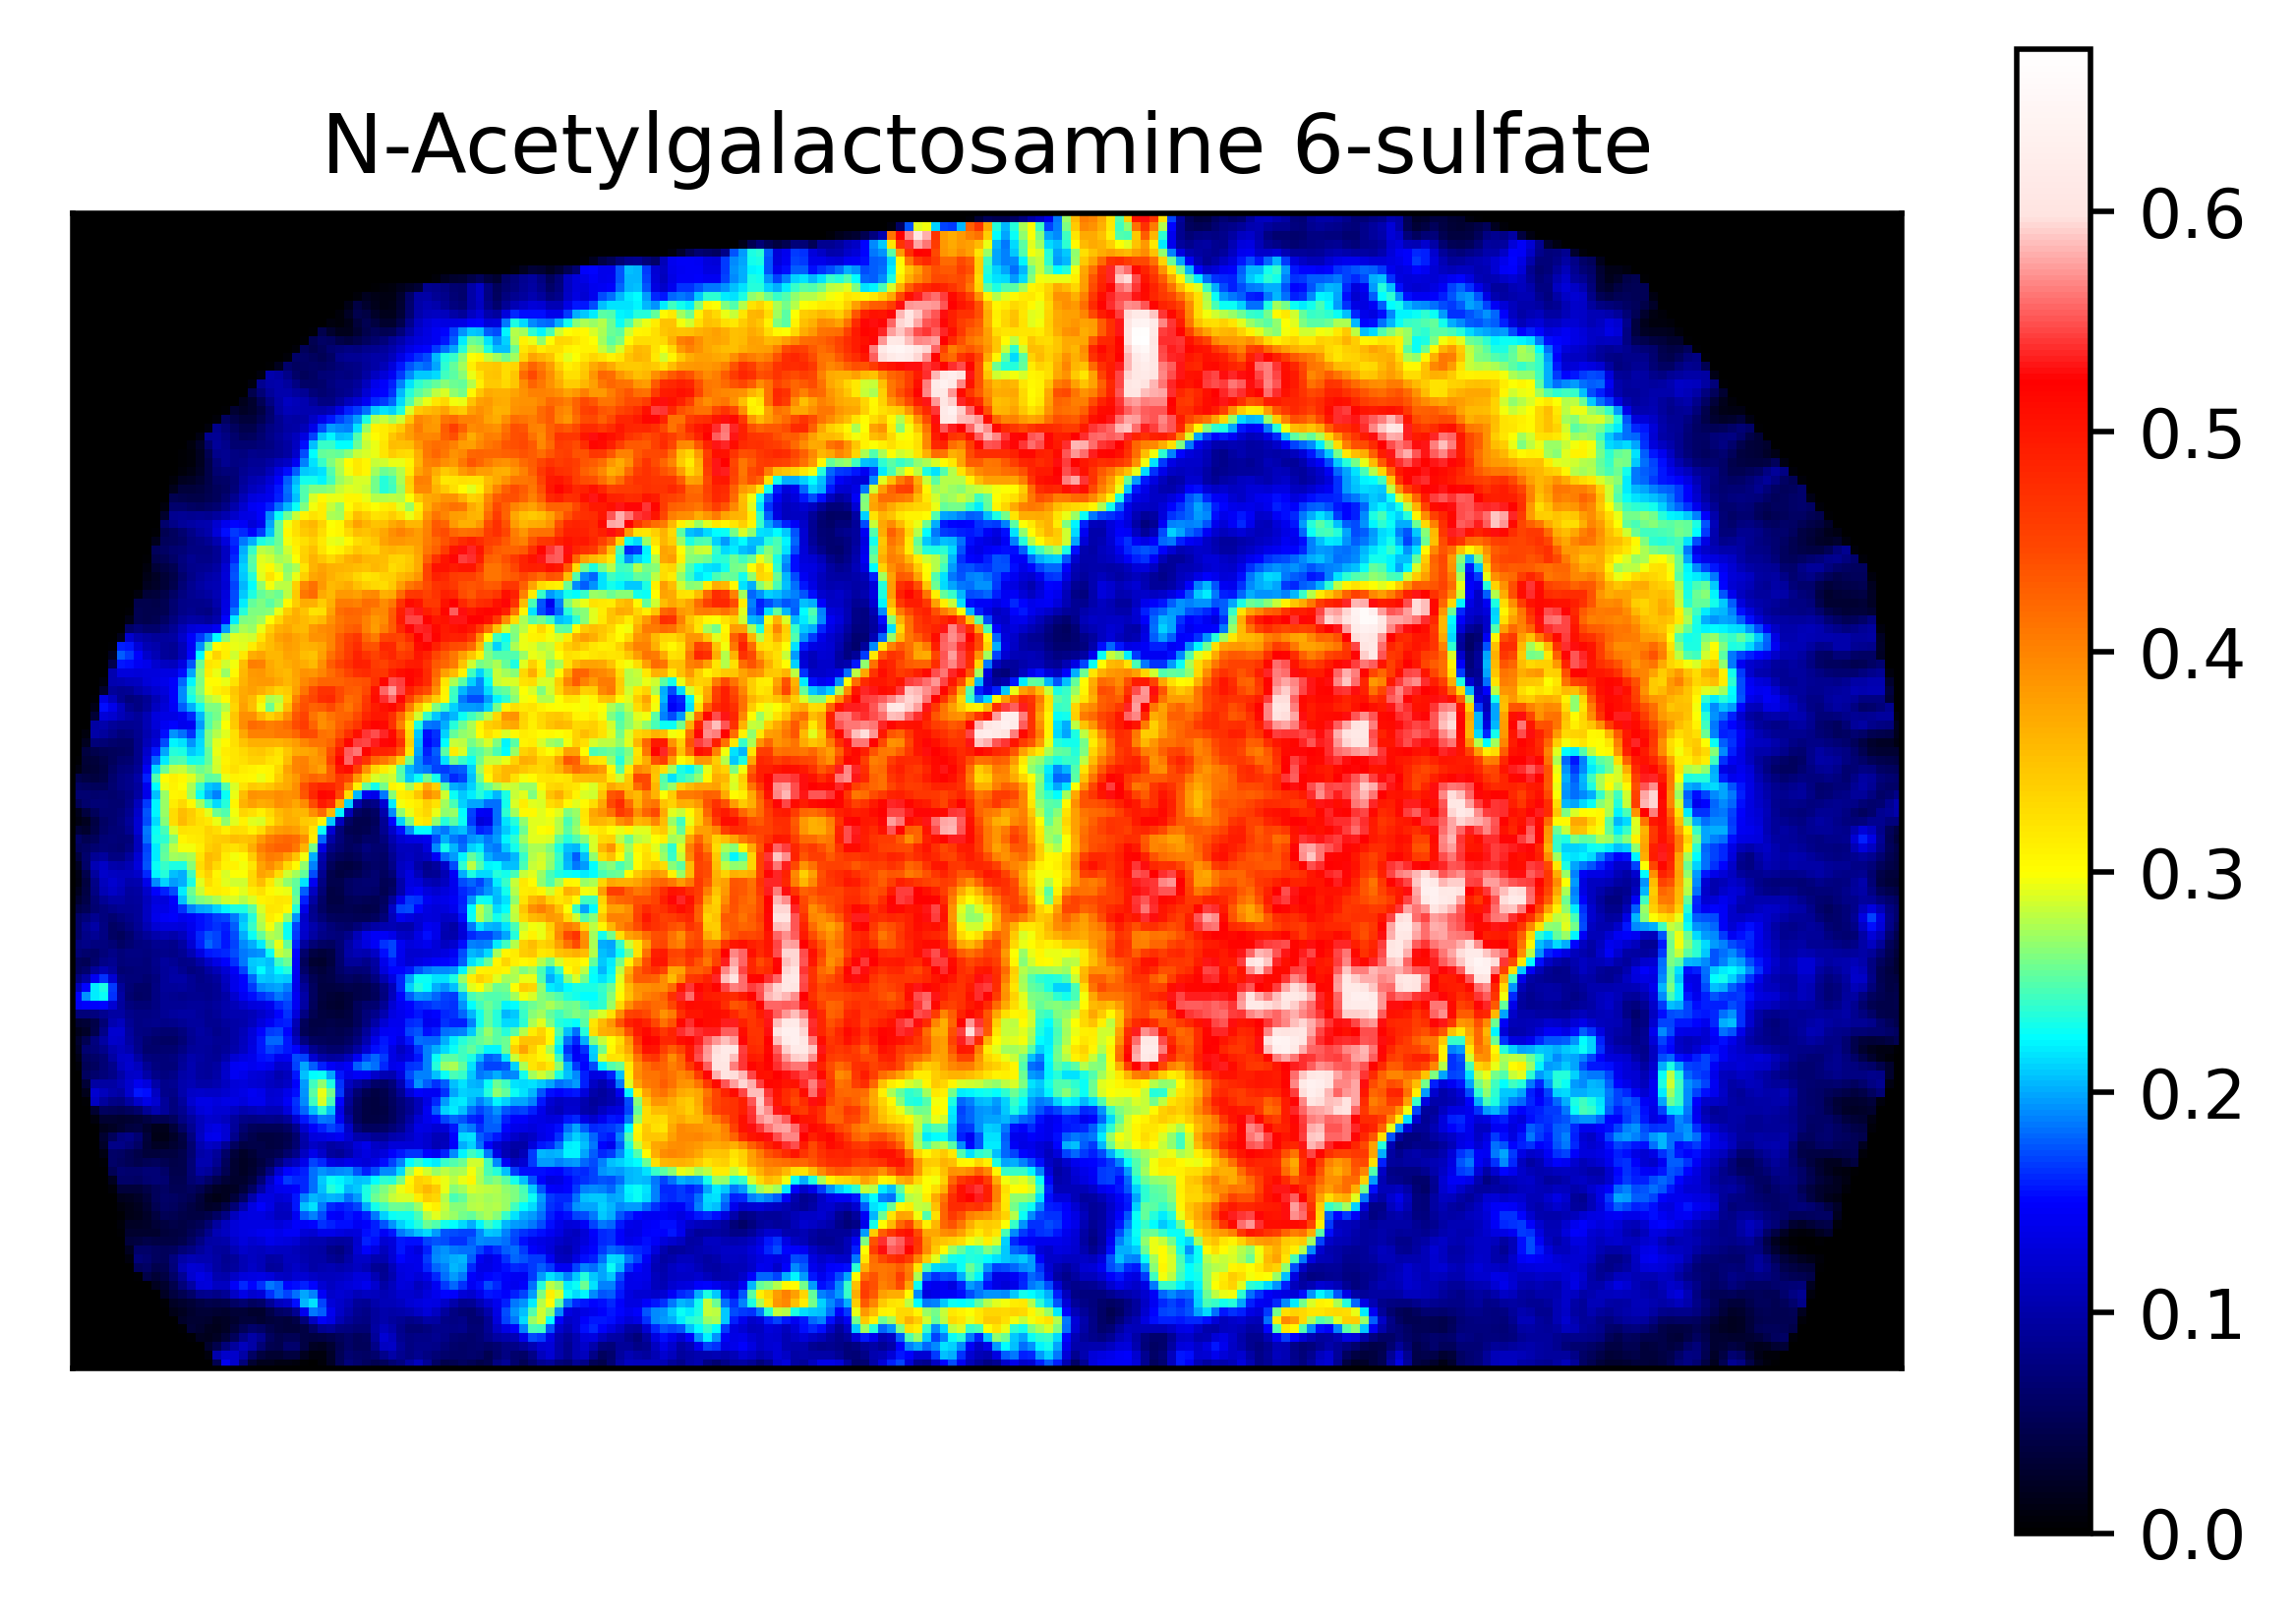

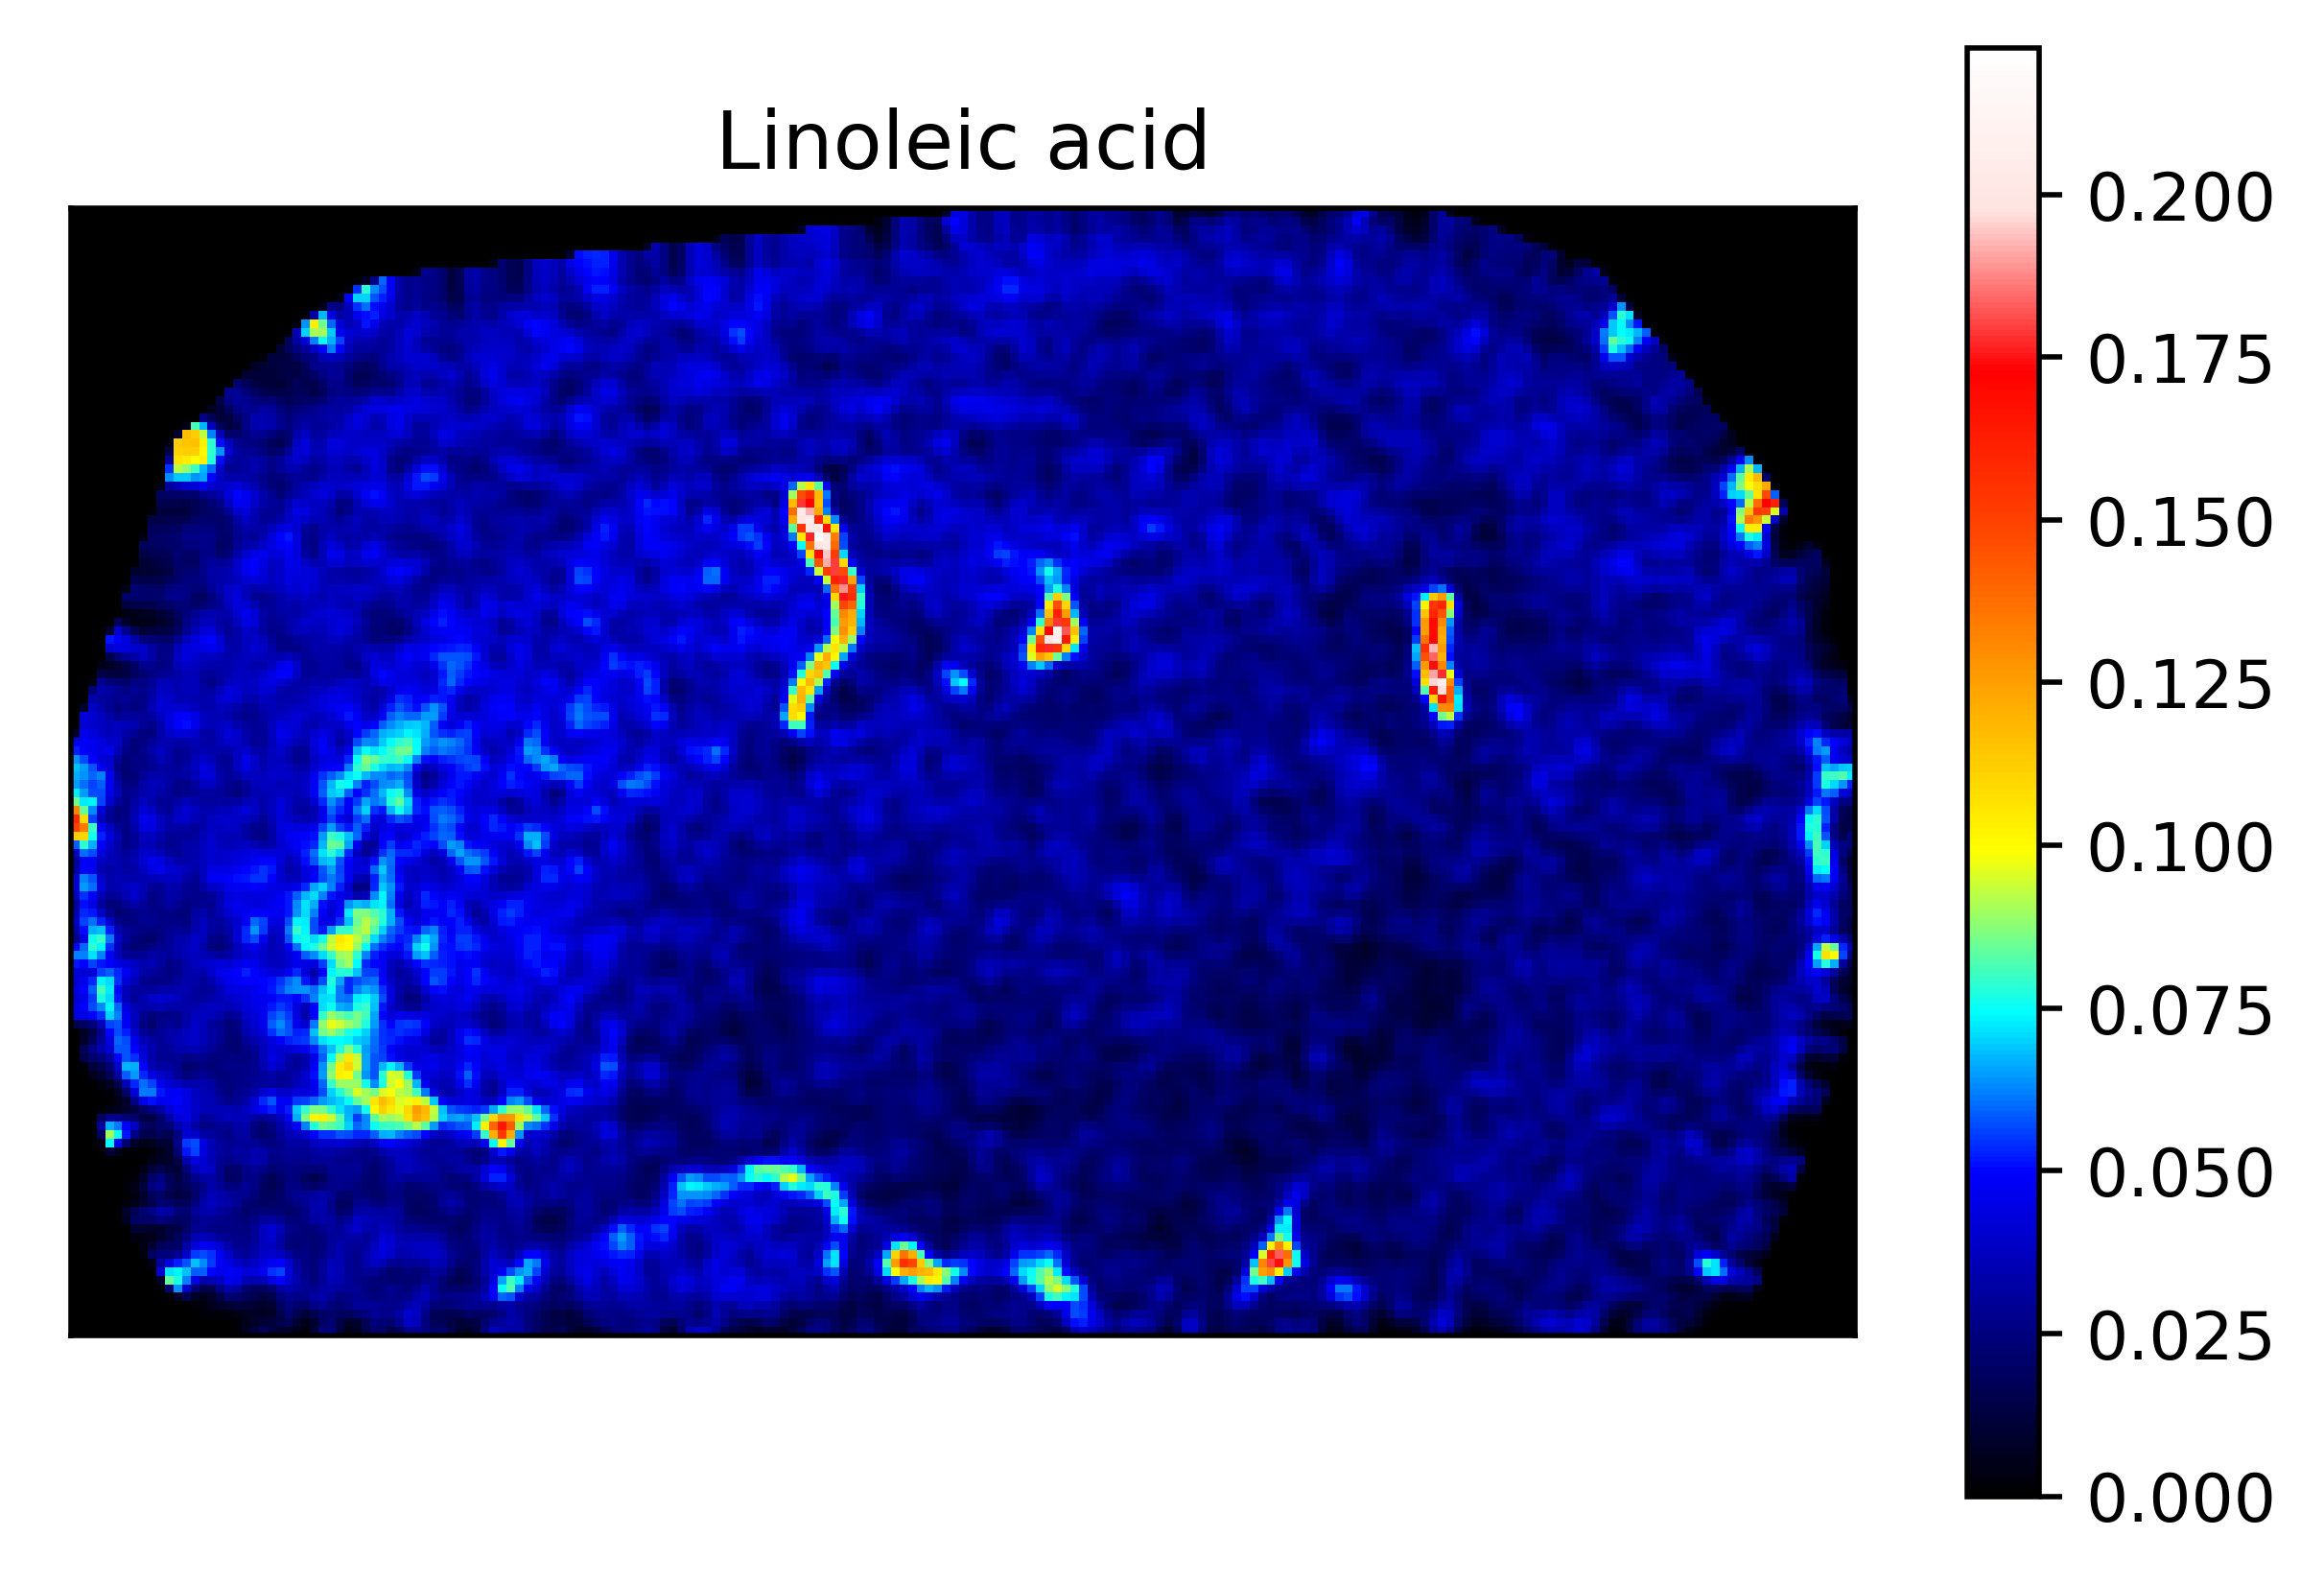

In [96]:
for index,row in peaklist.iterrows():
    tmp = msi_corrected.data_tensor[row["inds"]]
    isoTensor = SIMSIToolBox.normalizeTensor(tmp)
    plt.figure()
    SIMSIToolBox.showImage(isoTensor[0], cmap=colormap)
    plt.title(row["moleculeNames"].split(",")[0])

In [97]:
if __name__ == "__main__":
    df = msi.to_pandas()
    pkl.dump([peaklist,df],open(datadir + fn.replace(".imzML","_corrected.pkl"),"wb"))

forming matrix |██████████████████████████████████████████████████| 100.0% 


In [ ]:
            tmp = msi.data_tensor[inds]
        poolSize = np.sum(tmp[:1] / msi.tic_image, axis=0)    
    metaboliteData[row["moleculeNames"]] = {}
        metaboliteData[row["moleculeNames"]]["pool size image"] = poolSize
        msi_corrected.correctNaturalAbundance(row["formula"],inds)
        tmp = msi_corrected.data_tensor[inds]
        isoTensor = SIMSIToolBox.normalizeTensor(tmp)
        metaboliteData[row["moleculeNames"]]["corected isotope images"] = isoTensor
        metaboliteData[row["moleculeNames"]]["mean M0 corrected"] = np.mean(isoTensor[0][msi.imageBoundary > 0.5])


In [ ]:

        plt.figure()
        SIMSIToolBox.showImage(poolSize, cmap=colormap)
        plt.title(row["moleculeNames"])
        plt.figure()
        SIMSIToolBox.showImage(isoTensor[0], cmap=colormap)
        plt.title(row["moleculeNames"])

In [52]:
poolsizeTensor = []
targs = []
for index,row in peaklist.iterrows():
    inds = [x for x in range(len(keys)) if keys[x][0] == index]
    inds.sort(key=lambda x: keys[x][1])
    poolsizeTensor.append(msi.data_tensor[inds[0]])
    targs.append(msi.targets[inds[0]])

In [53]:
msi_pool = deepcopy(msi)

In [54]:
msi_pool.data_tensor = np.array(poolsizeTensor)
msi_pool.targets = targs

In [55]:
format_data = msi_pool.to_pandas()
xs = format_data["x"].values
ys = format_data["y"].values
format_data = format_data[msi_pool.targets].to_numpy()

In [56]:
format_data.shape

(50034, 291)

In [57]:
fit = umap.UMAP()
u = fit.fit_transform(format_data)

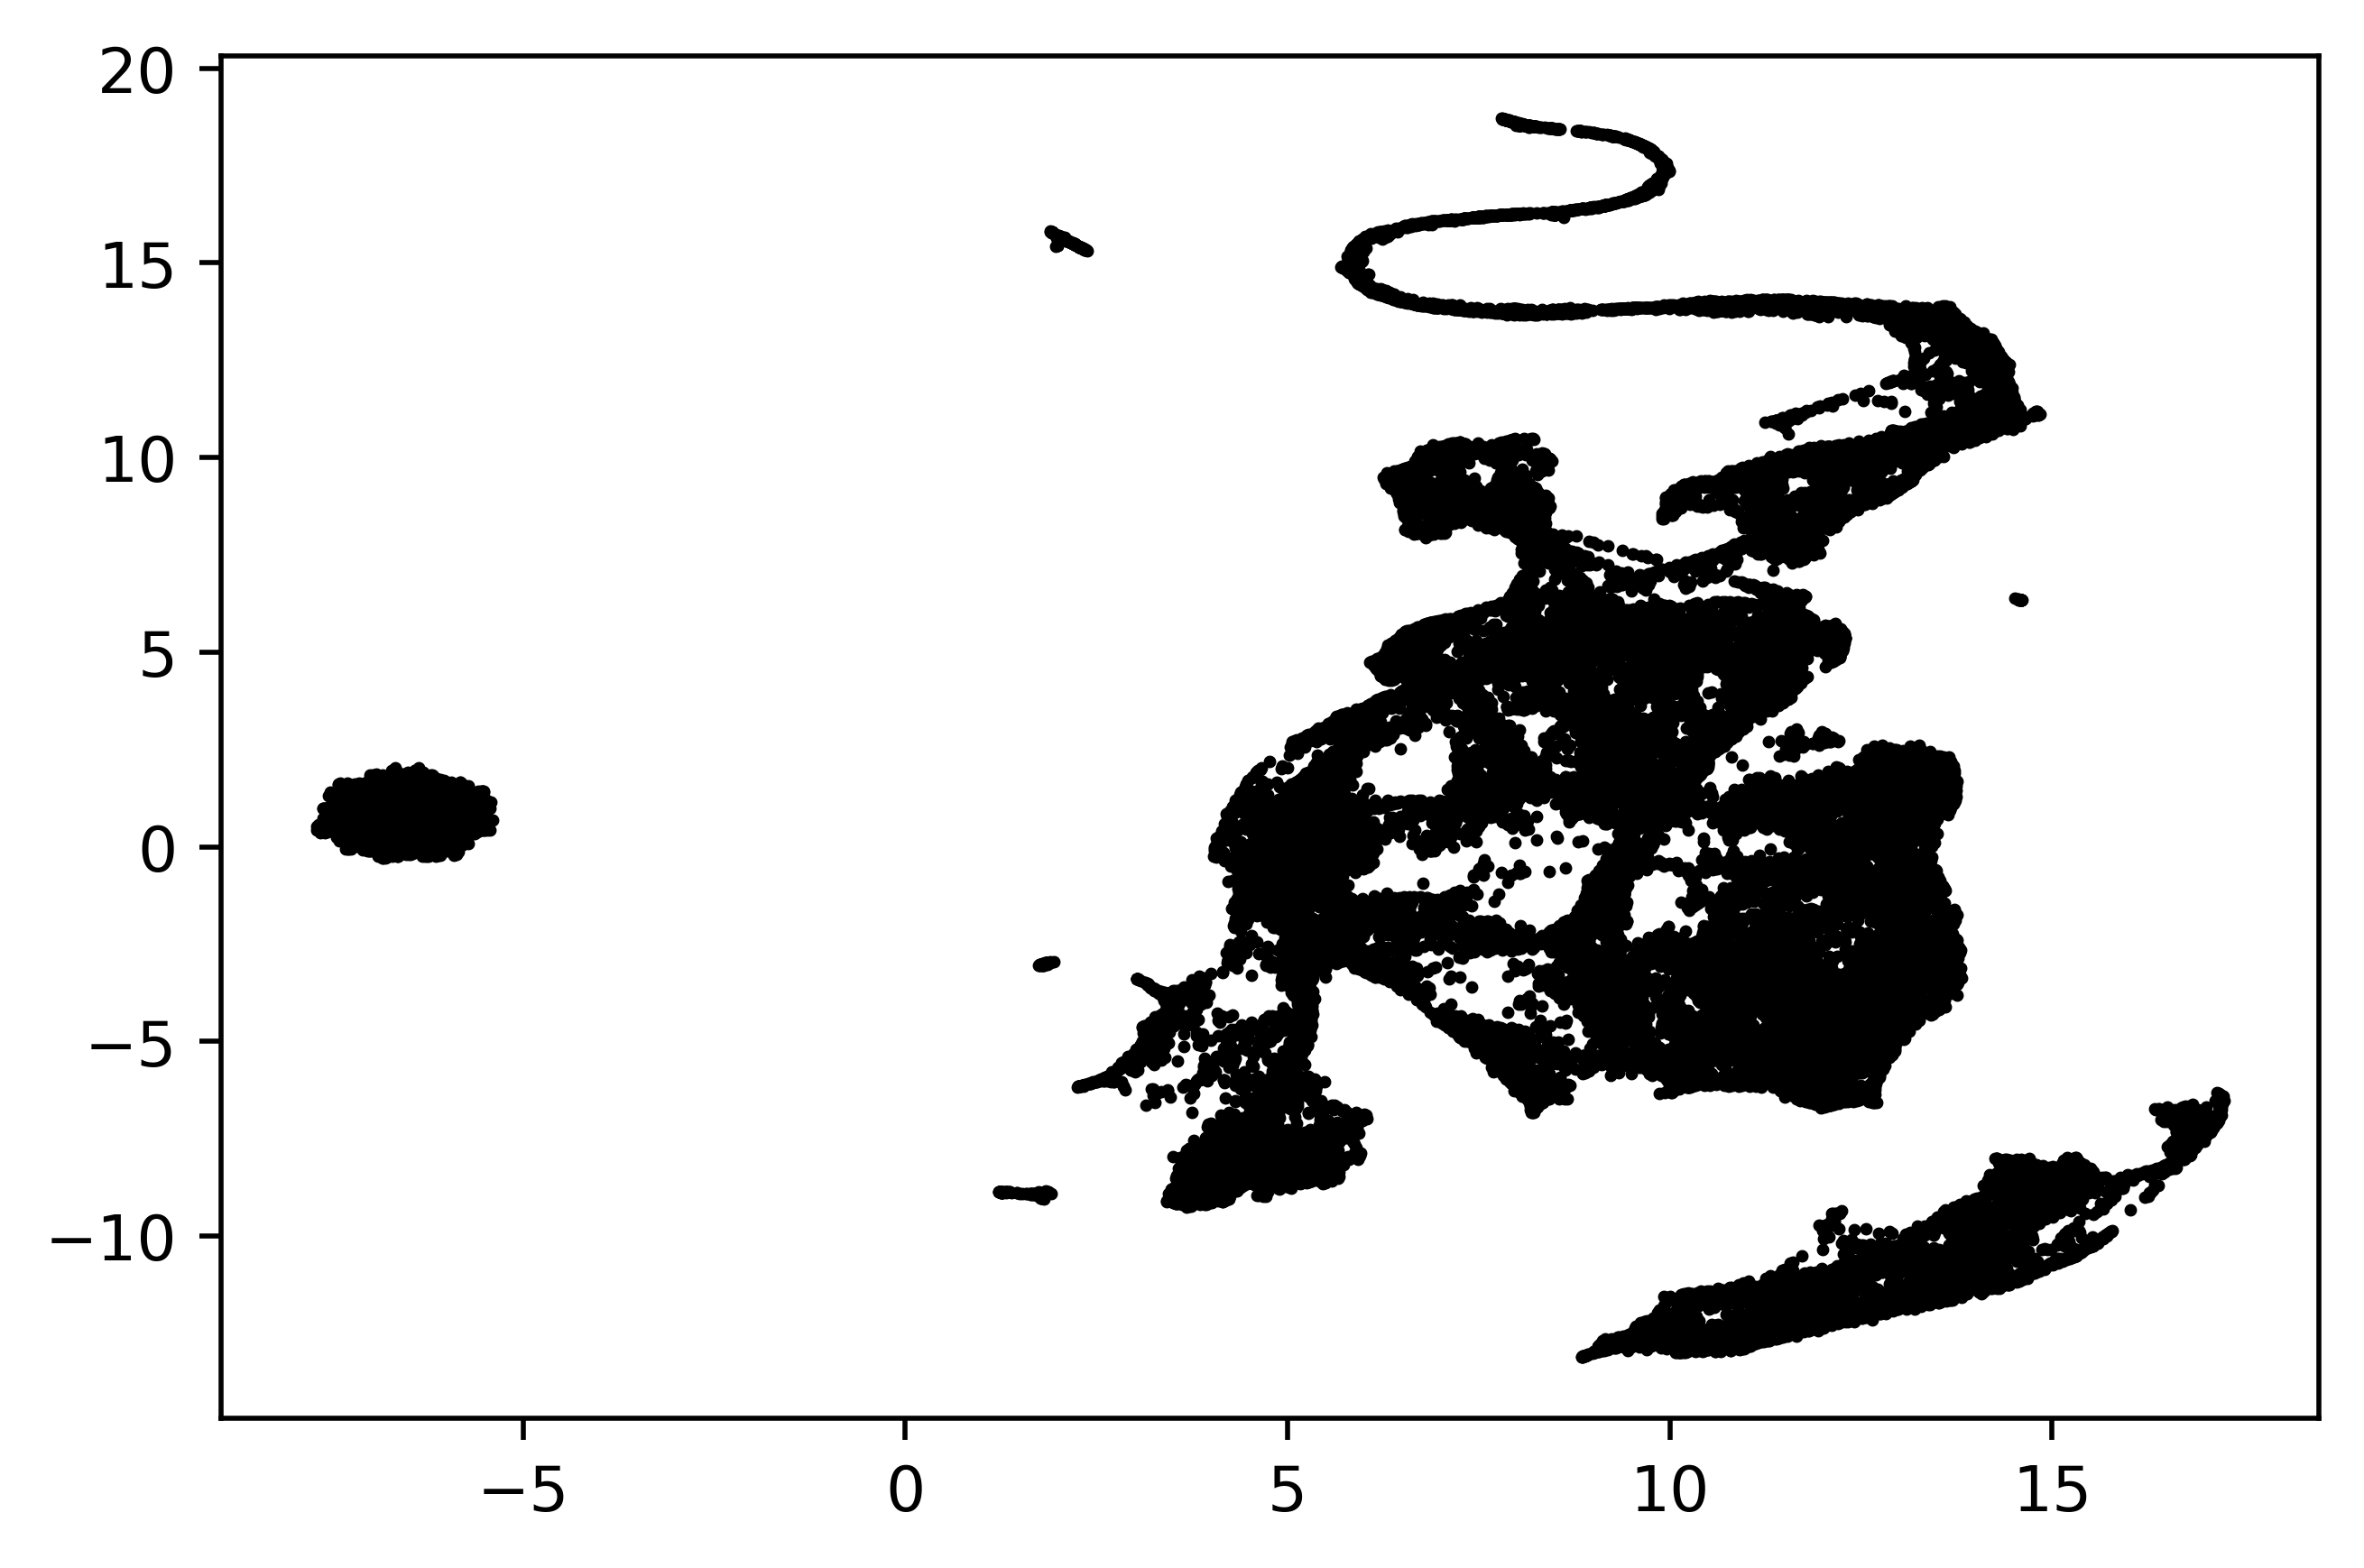

In [58]:
plt.scatter(u[:,0], u[:,1],c="black",s=1)


In [59]:
kmeans_labels = KMeans(n_clusters=8).fit_predict(u)

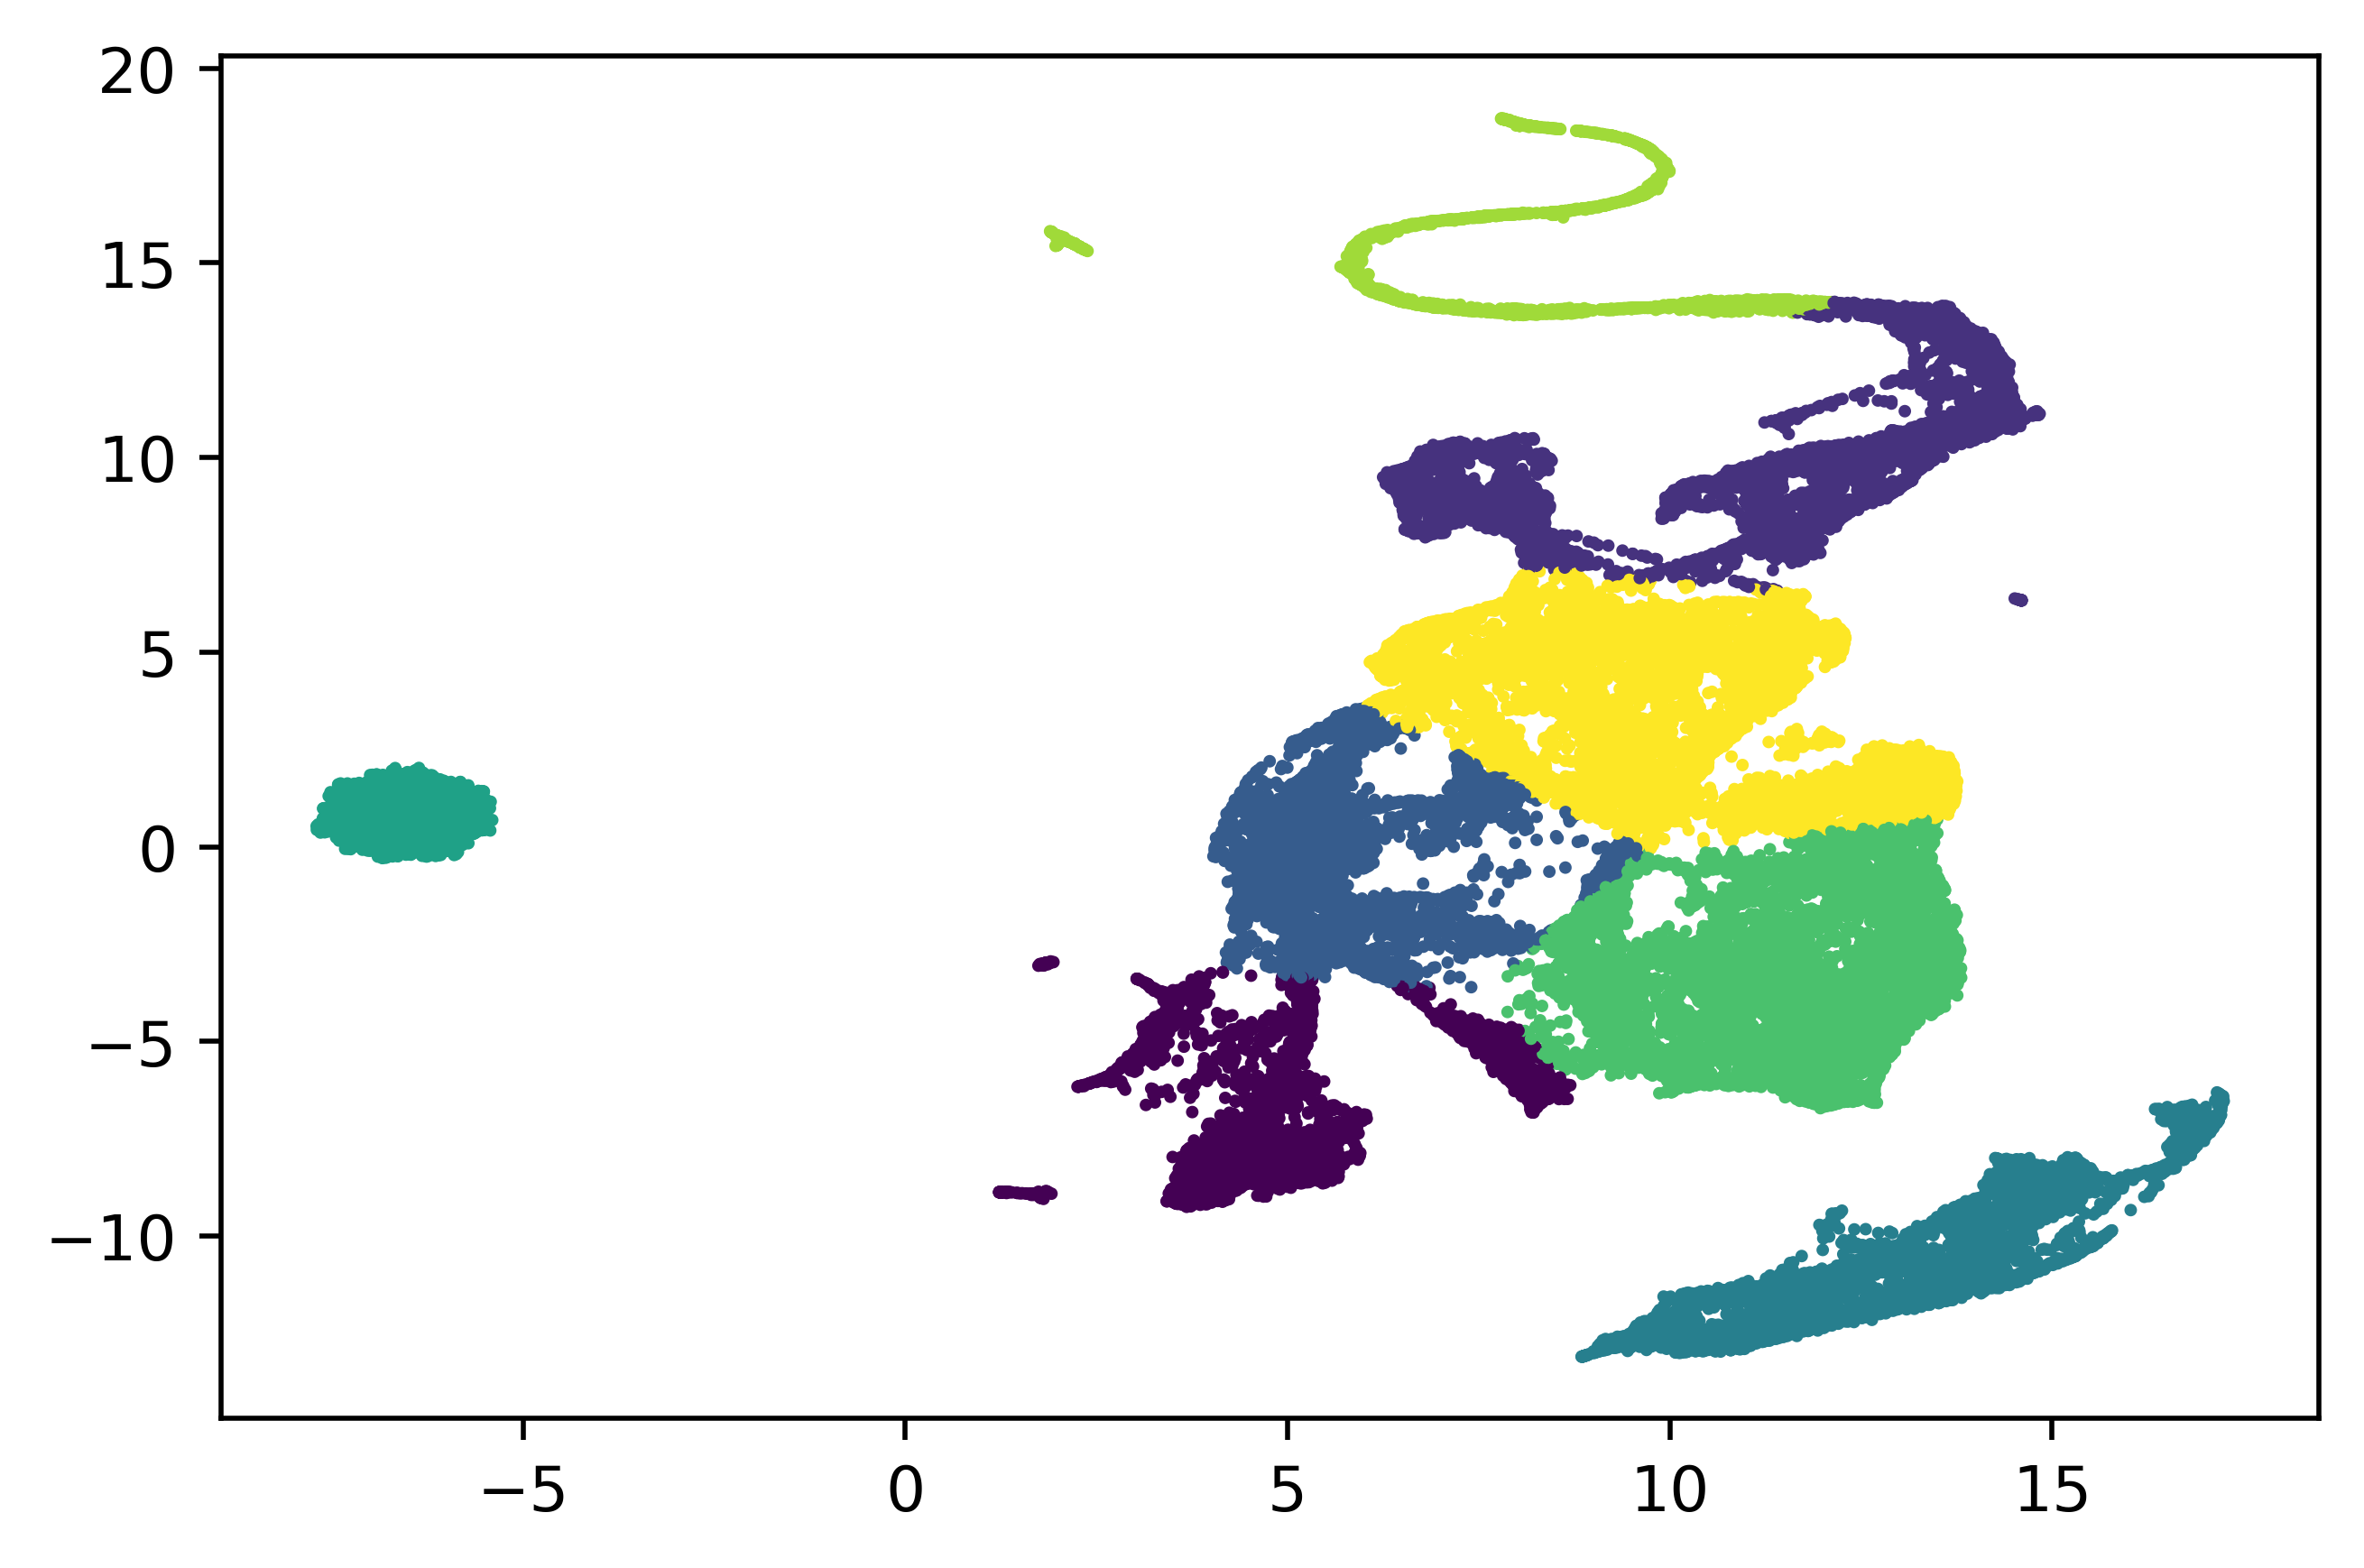

In [60]:
plt.scatter(u[:,0], u[:,1],c=kmeans_labels,s=1)

In [61]:
df = pd.DataFrame()
df["x"] = xs
df["y"] = ys
df["cluster"] = kmeans_labels
df["comp1"] = u[:,0]
df["comp2"] = u[:,1]
df

,x,y,cluster,comp1,comp2
0,0,0,4,-6.570827,0.646470
1,1,0,4,-6.261268,1.589771
2,2,0,4,-6.005578,0.645706
3,3,0,4,-6.023043,1.544511
4,4,0,4,-6.579461,1.184941
...,...,...,...,...,...
50029,264,185,4,-6.201488,0.246018
50030,265,185,4,-6.489655,-0.081019
50031,266,185,4,-6.684782,1.169815
50032,267,185,4,-5.520367,0.579039


In [63]:
umapImg = SIMSIToolBox.MSIData.parse_df_to_matrix(df,["cluster"],-1,(msi_pool.data_tensor[0].shape[0],msi_pool.data_tensor[0].shape[1]))

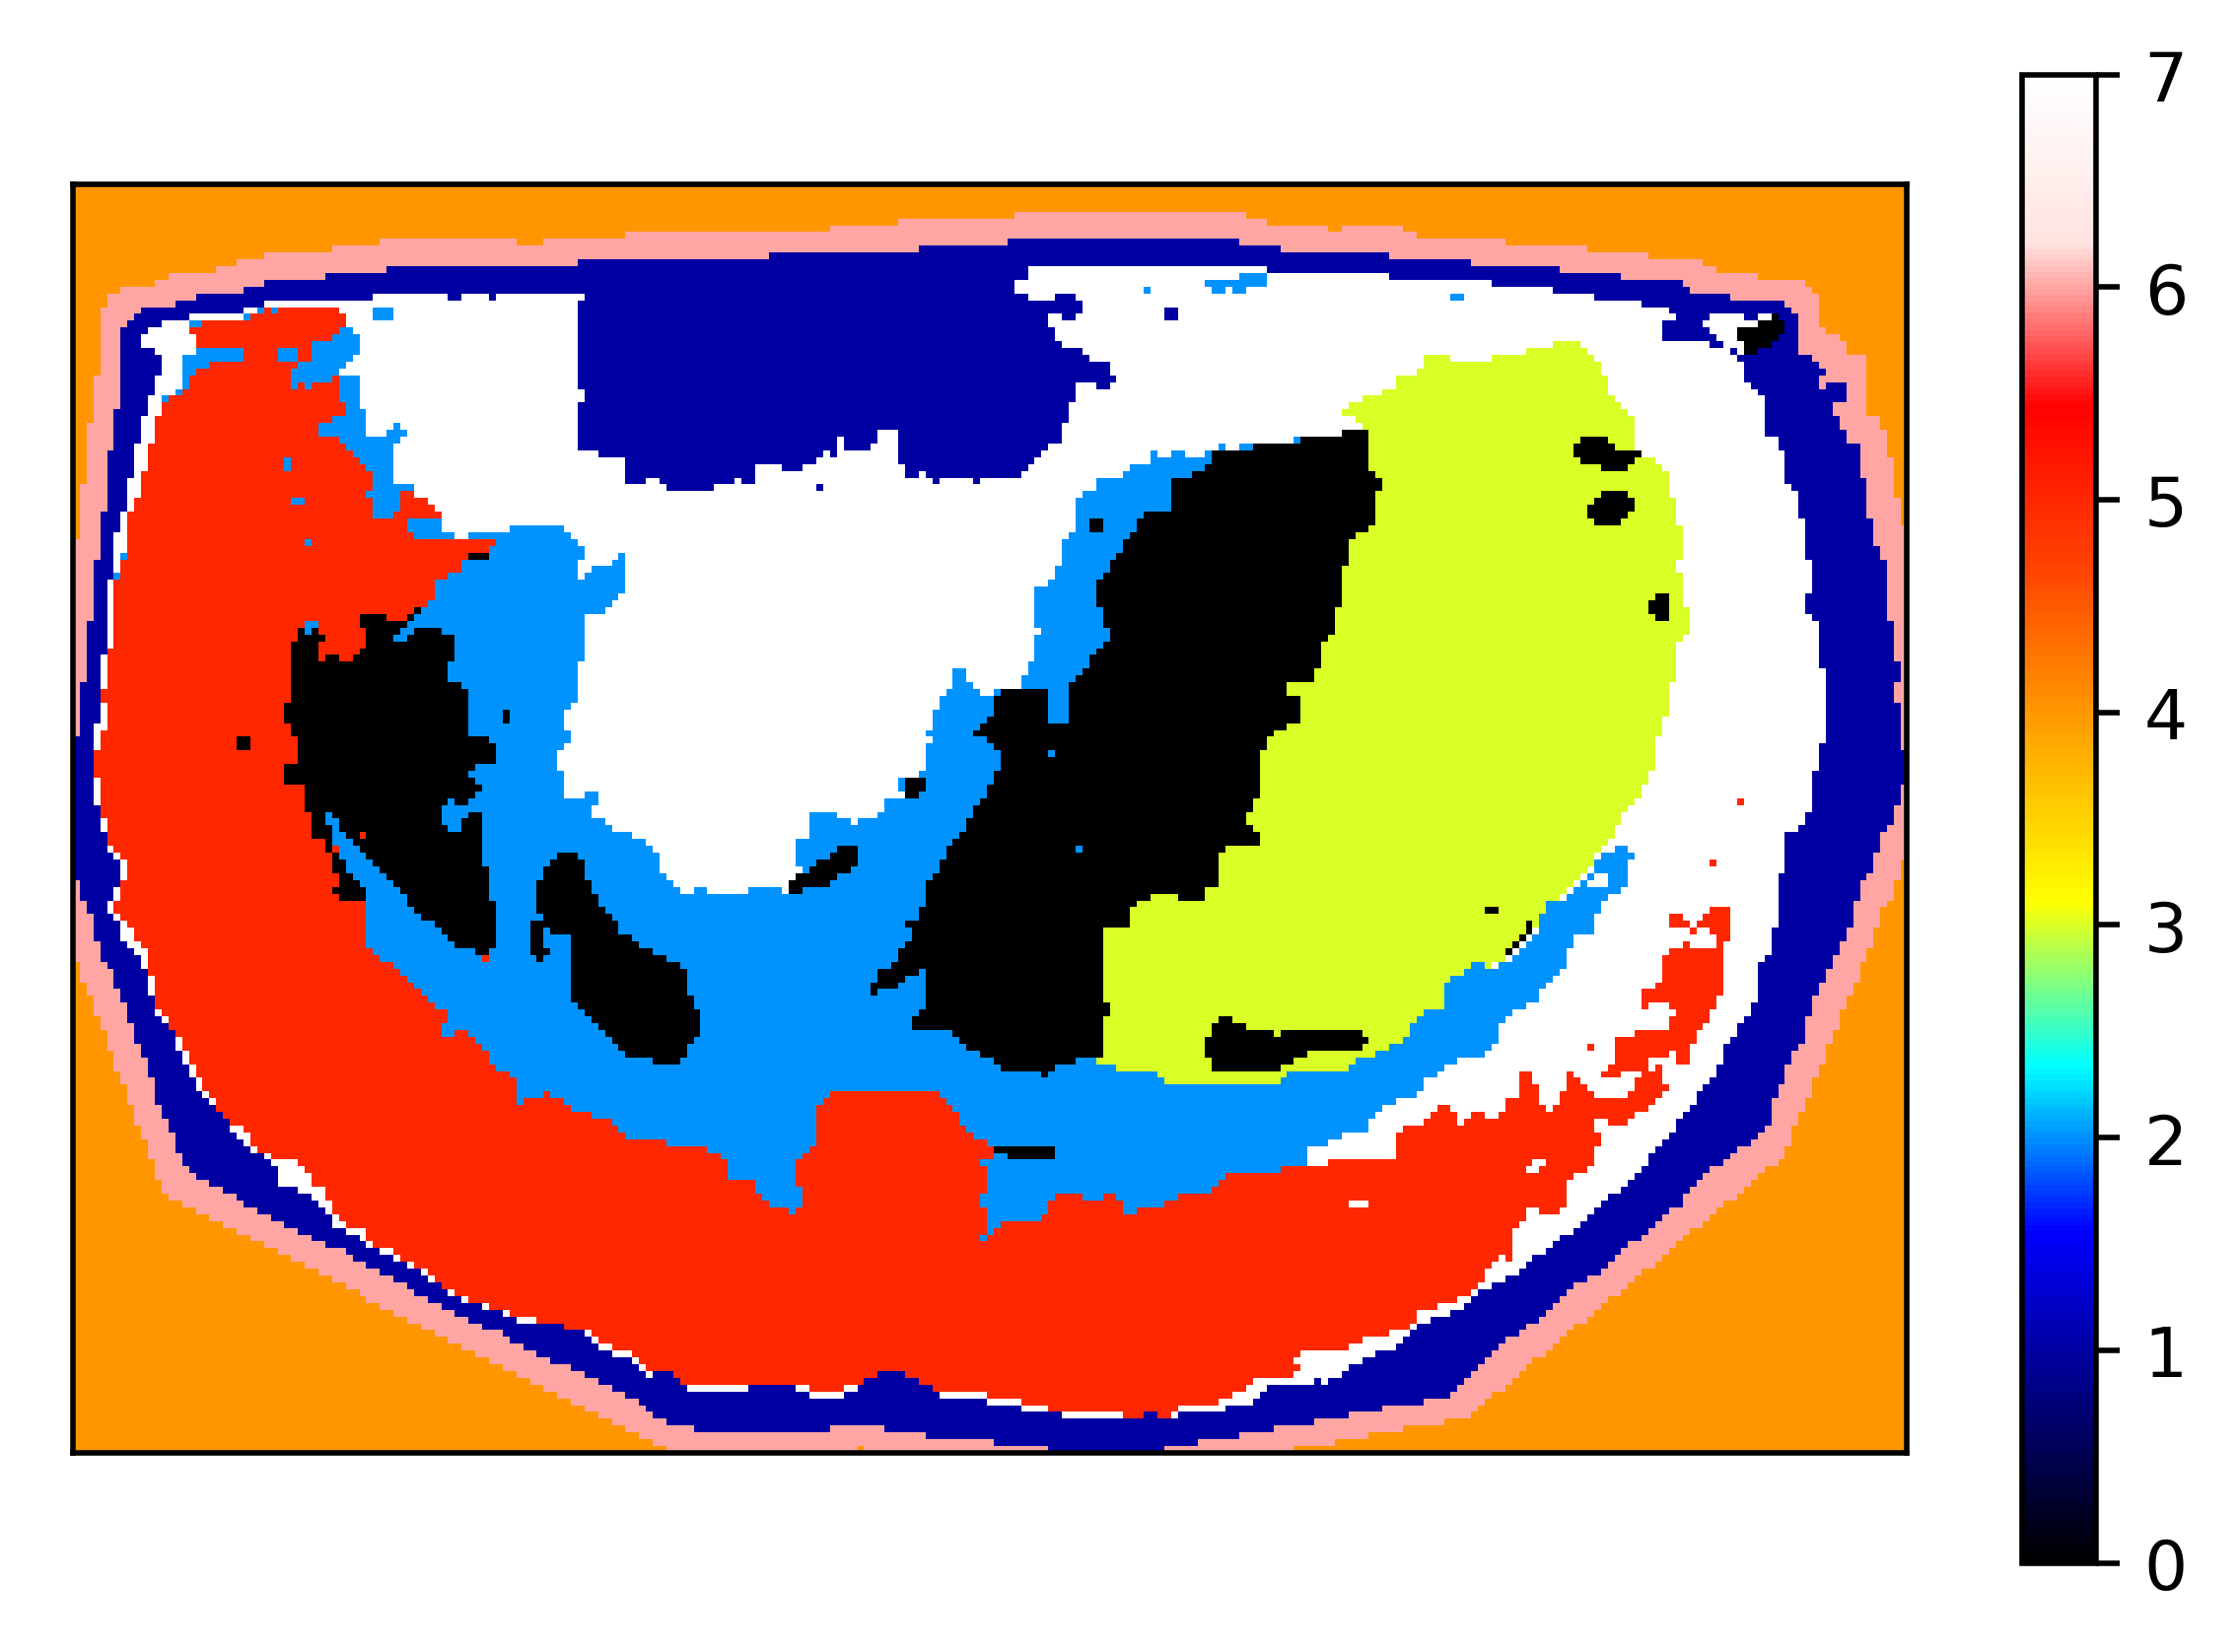

In [65]:
SIMSIToolBox.showImage(umapImg, cmap=colormap)